In [1]:
!pip install -U scikit-learn

In [2]:
import backproject
import id_generation
import numpy as np
import glob
import cv2
import torch
import matplotlib.pyplot as plt

### K-Means Learning library XD

In [3]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("Labels",kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print("Cluster Centers",kmeans.cluster_centers_)

Labels [1 1 1 0 0 0]
[1 0]
Cluster Centers [[10.  2.]
 [ 1.  2.]]


In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    np.random.seed(123)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [1]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
path_to_traj = "/home/koerner/Project/nice-slam/Datasets/generated/room0/traj.txt"
T_wc = np.loadtxt(path_to_traj).reshape(-1, 4, 4)

In [6]:
directory = "/home/koerner/Project/nice-slam/Datasets/generated/room0/results"
every_frame= 5

In [7]:
def readDepth(filepath):
    depth=cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [8]:

# color_paths = sorted(glob.glob('/home/julius/Project/nice-slam/Datasets/Replica/room0/results/frame*.jpg'))
depth_paths = sorted(
    glob.glob(
        "/home/koerner/Project/nice-slam/Datasets/generated/room0/results/depth*.png"
    )
)
frame_paths=sorted(glob.glob("/home/koerner/Project/nice-slam/Datasets/generated/room0/results/frame*.jpg"))

seg_paths = sorted(
    glob.glob(
        "/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic*.npy"
    )
)
print(len(seg_paths))

41


In [9]:
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])

In [10]:
first = np.load(
    "/home/koerner/Project/nice-slam/Datasets/generated/room0/results/semantic000000.npy"
)
segmentations = []
segmentations.append(first)
np.unique(first)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85], dtype=int32)

In [11]:
id_counter = len(np.unique(first))
id_counter

86

In [12]:
#sam Predict
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from id_generation import createReverseMapping
from backproject import generateIds,sample_from_instances_with_ids, sample_from_instances



In [13]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [14]:

sam_checkpoint = "/home/koerner/Project/nice-slam/sam/sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

image=cv2.imread(frame_paths[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(680*1280)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from vis import visualizerForIds


870400


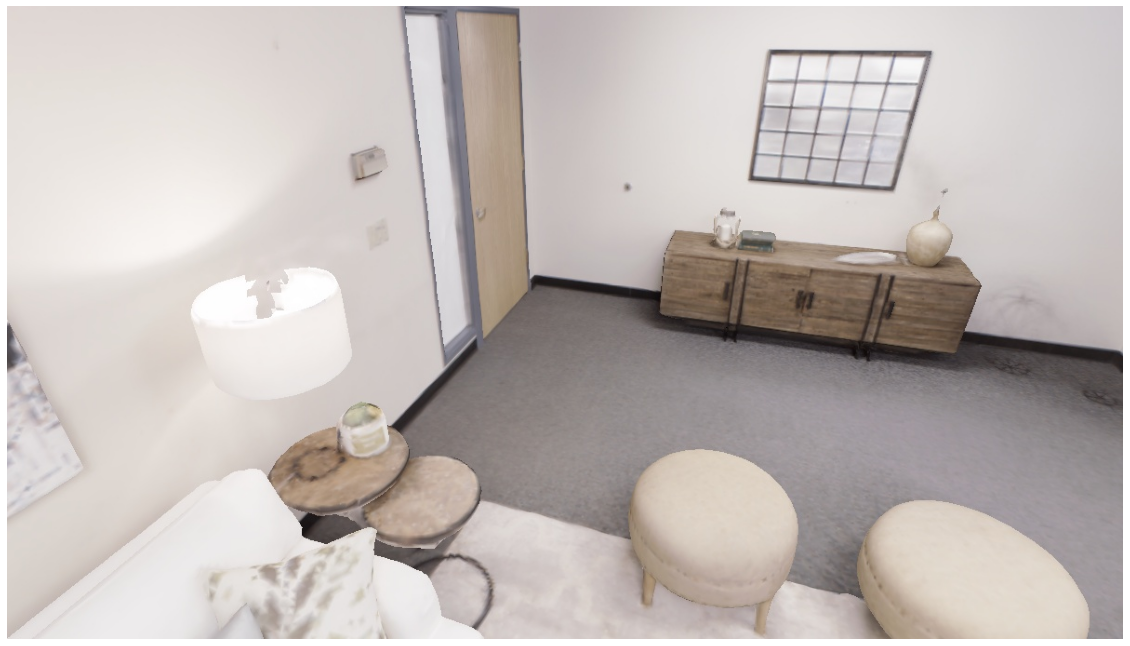

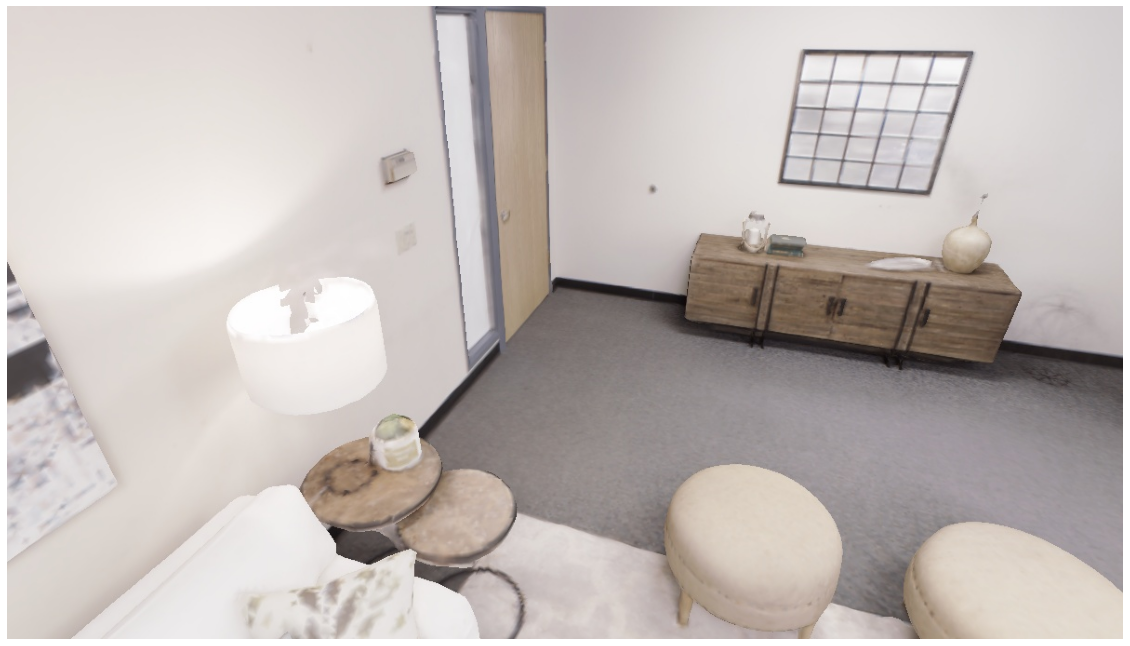

In [15]:
image2=cv2.imread(frame_paths[10])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image=cv2.imread(frame_paths[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.imshow(image2)
#show_anns(presentation)
plt.axis("off")
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis("off")
plt.show()

mask_generator = SamAutomaticMaskGenerator(
    model=sam
)

presentation = mask_generator.generate(image)
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(presentation)
plt.axis("off")
plt.show()
presentation = mask_generator.generate(image2)
plt.figure(figsize=(20, 20))
plt.imshow(image2)
show_anns(presentation)
plt.axis("off")
plt.show()

predictor.set_image(image)

mask, _, _ = predictor.predict(
    point_coords=np.array([790,600]).reshape(1, -1),
    point_labels=np.array([1]),
    multimask_output=False,
)

plt.figure(figsize=(20,20))
plt.imshow(image)
#print(instanceId[0,i],instanceId[1,i])
plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()


# Here prompt from one of the images and project it to the next image
plt.figure(figsize=(20,20))
plt.imshow(image)
show_mask(mask, plt.gca())
plt.scatter(790,600,c="yellow",s=500,marker='o')
plt.axis('off')
plt.show()
import backproject
#backproject.frontProject(np.array([790,600]))
plt.figure(figsize=(20,20))
plt.imshow(image)
show_mask(mask, plt.gca())
plt.scatter(790,600,c="yellow",s=500,marker='o')
plt.axis('off')
plt.show()

In [16]:
kernel_size=40
smallesMaskSize=kernel_size*kernel_size
mask_generator = SamAutomaticMaskGenerator(
    model=sam
)
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=16,
    pred_iou_thresh=0.90,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=1000,
)

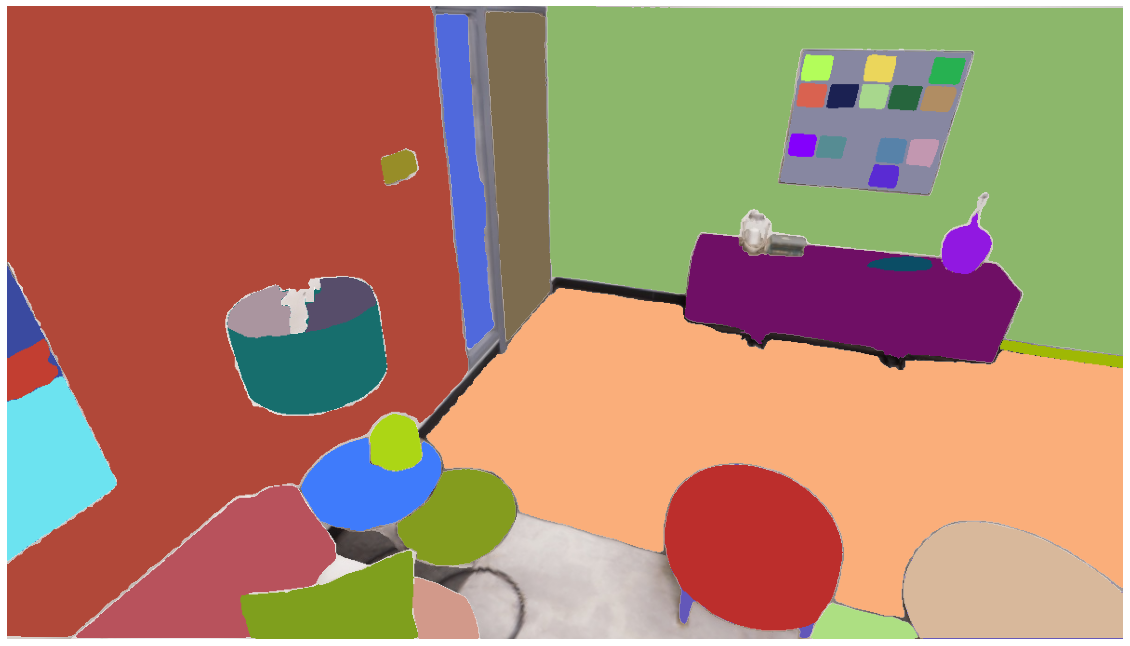

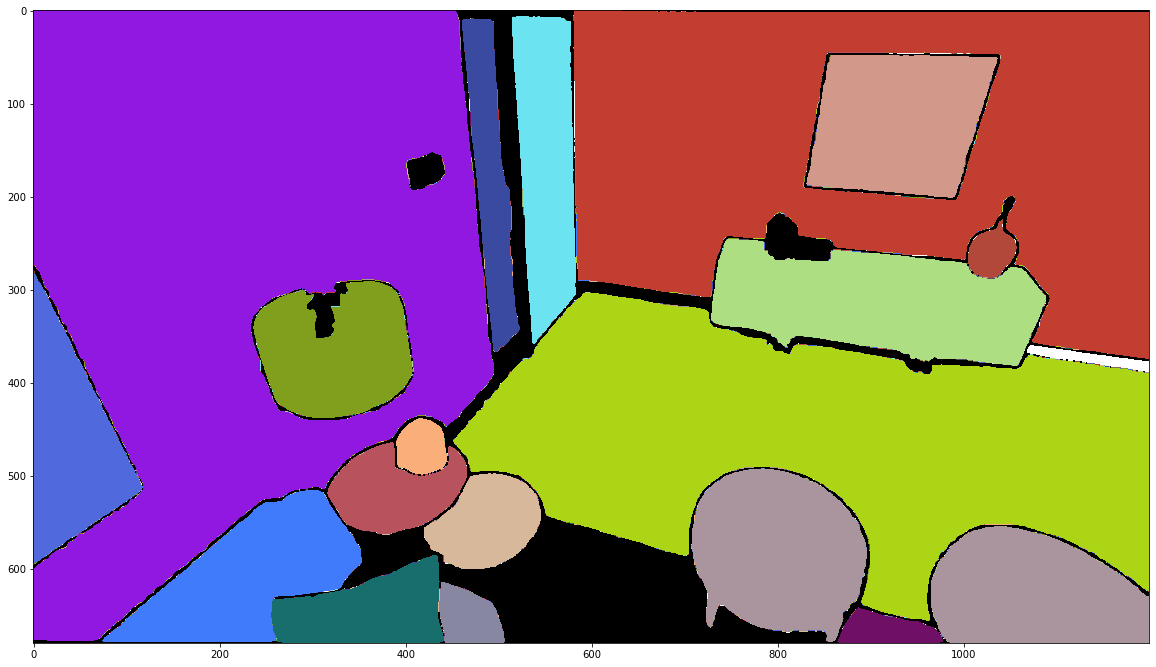

ith Frame 0
ith Frame 10
ith Frame 20
ith Frame 30
ith Frame 40
ith Frame 50
ith Frame 60
ith Frame 70
ith Frame 80
ith Frame 90
ith Frame 100
ith Frame 110
ith Frame 120
ith Frame 130
ith Frame 140
ith Frame 150
ith Frame 160
ith Frame 170


/home/koerner/Project_Dogu/nice-slam/segmentation/id_generation.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=num_of_clusters, random_state=0).fit(theRelevant)


ith Frame 180
ith Frame 190
ith Frame 200
ith Frame 210
ith Frame 220
ith Frame 230
ith Frame 240
ith Frame 250
ith Frame 260
ith Frame 270
ith Frame 280
ith Frame 290
ith Frame 300
ith Frame 310
ith Frame 320
ith Frame 330
ith Frame 340
ith Frame 350
ith Frame 360
ith Frame 370
ith Frame 380
ith Frame 390
ith Frame 400
ith Frame 410
ith Frame 420
ith Frame 430
ith Frame 440
ith Frame 450
ith Frame 460
ith Frame 470
ith Frame 480
ith Frame 490
ith Frame 500
ith Frame 510
ith Frame 520
ith Frame 530
ith Frame 540
ith Frame 550
ith Frame 560
ith Frame 570
ith Frame 580
ith Frame 590
ith Frame 600
ith Frame 610
ith Frame 620
ith Frame 630
ith Frame 640
ith Frame 650
ith Frame 660
ith Frame 670
ith Frame 680
ith Frame 690
ith Frame 700
ith Frame 710
ith Frame 720
ith Frame 730
ith Frame 740
ith Frame 750
ith Frame 760
ith Frame 770
ith Frame 780
ith Frame 790
ith Frame 800
ith Frame 810
ith Frame 820
ith Frame 830
ith Frame 840
ith Frame 850
ith Frame 860
ith Frame 870
ith Frame 880
ith Fr

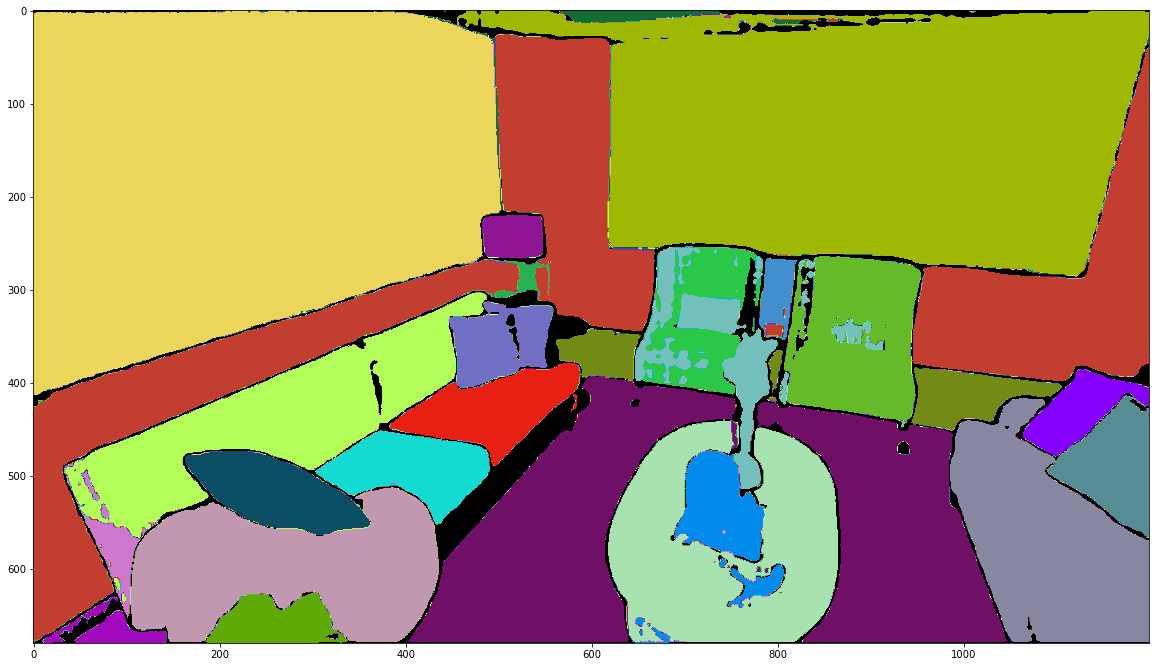

ith Frame 990


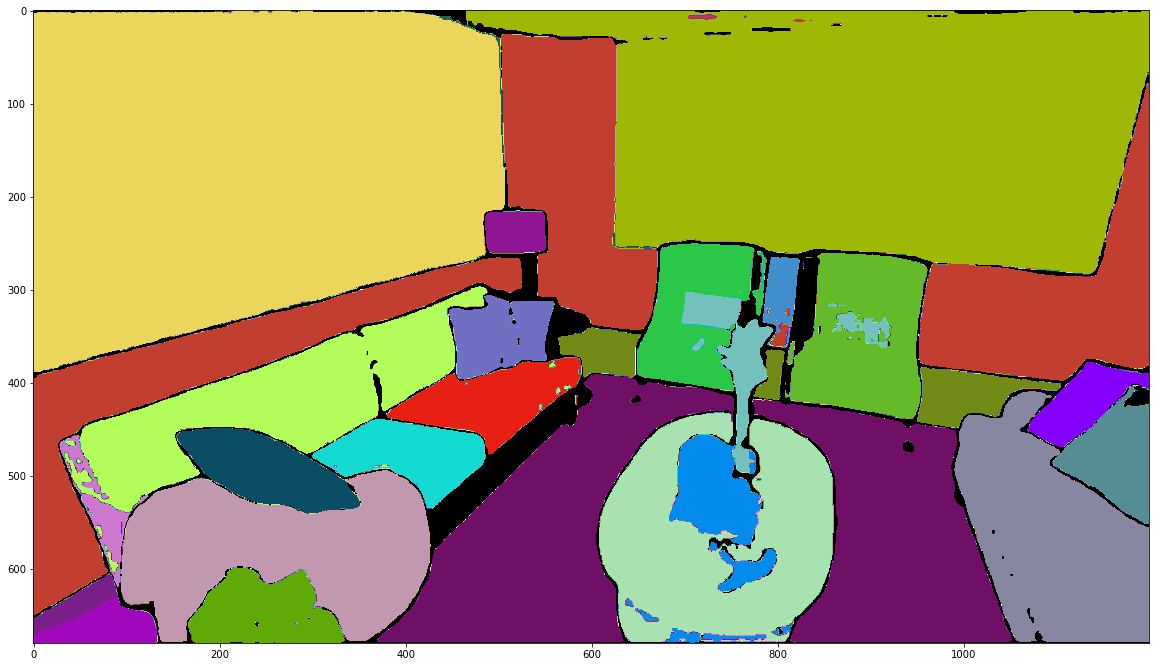

ith Frame 980


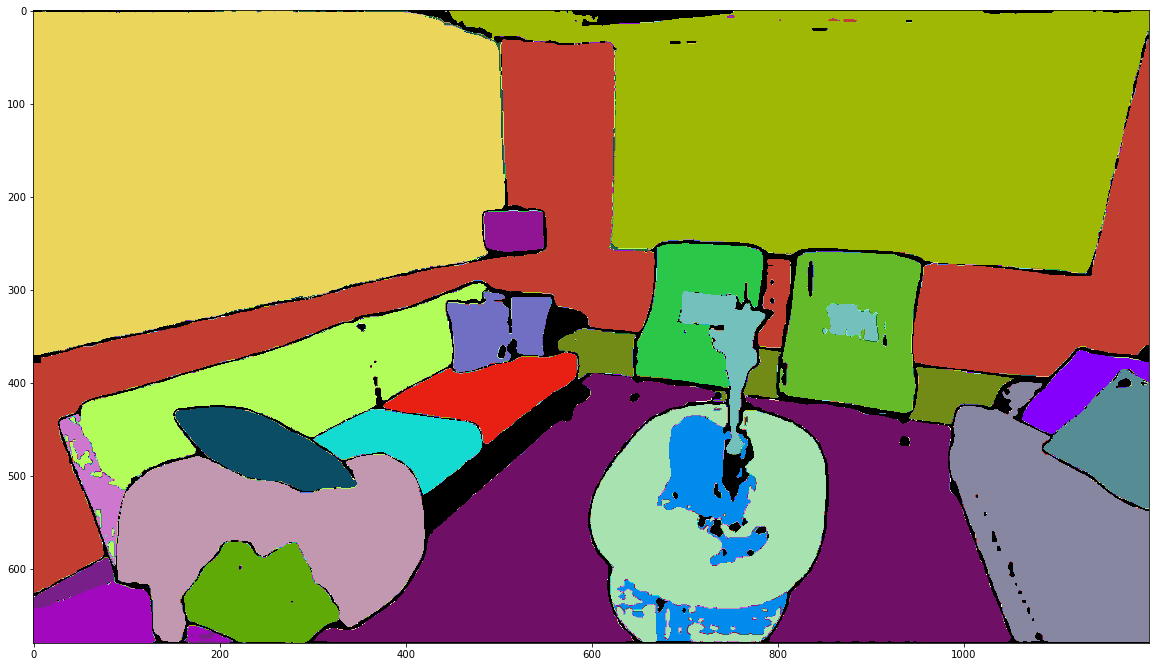

ith Frame 970


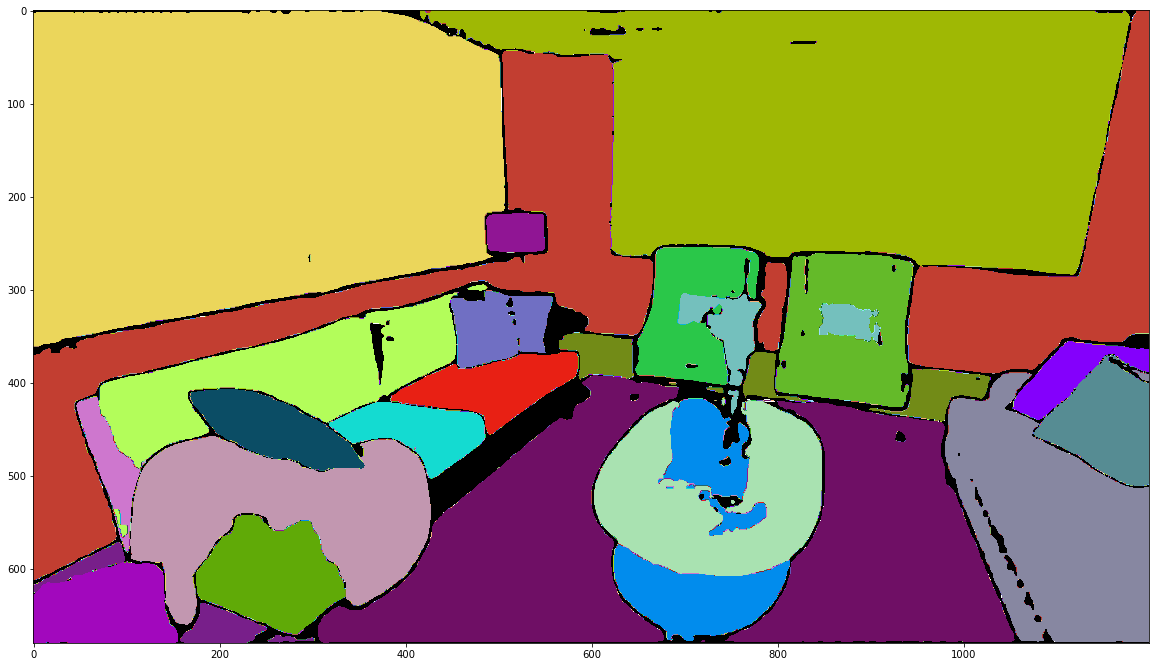

ith Frame 960


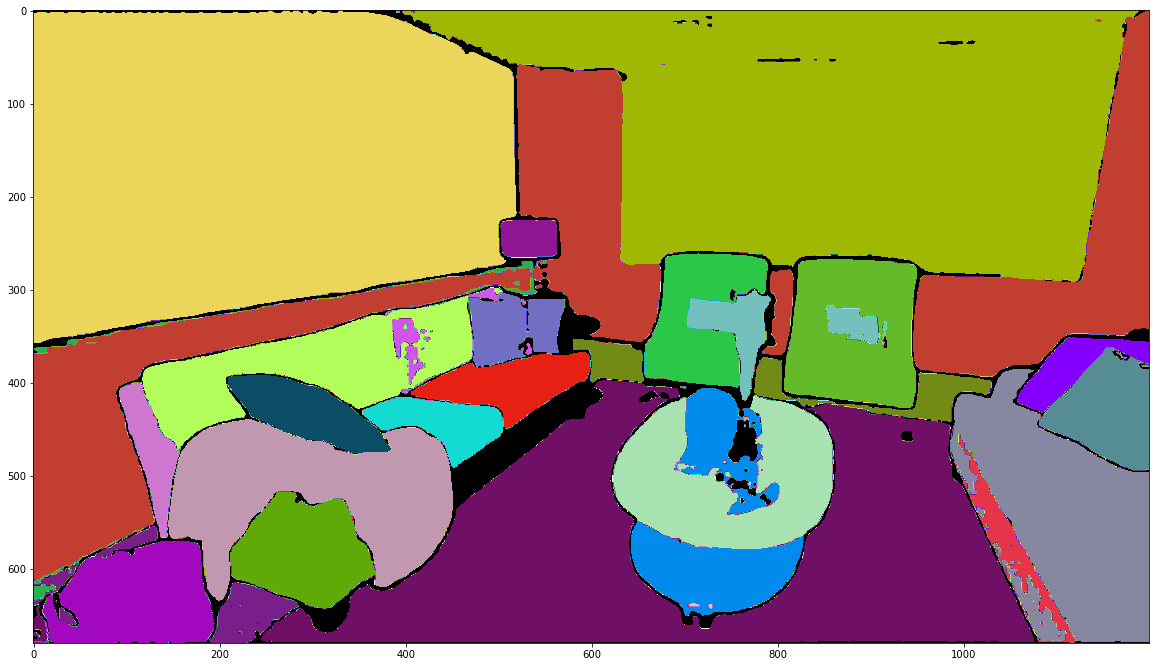

ith Frame 950


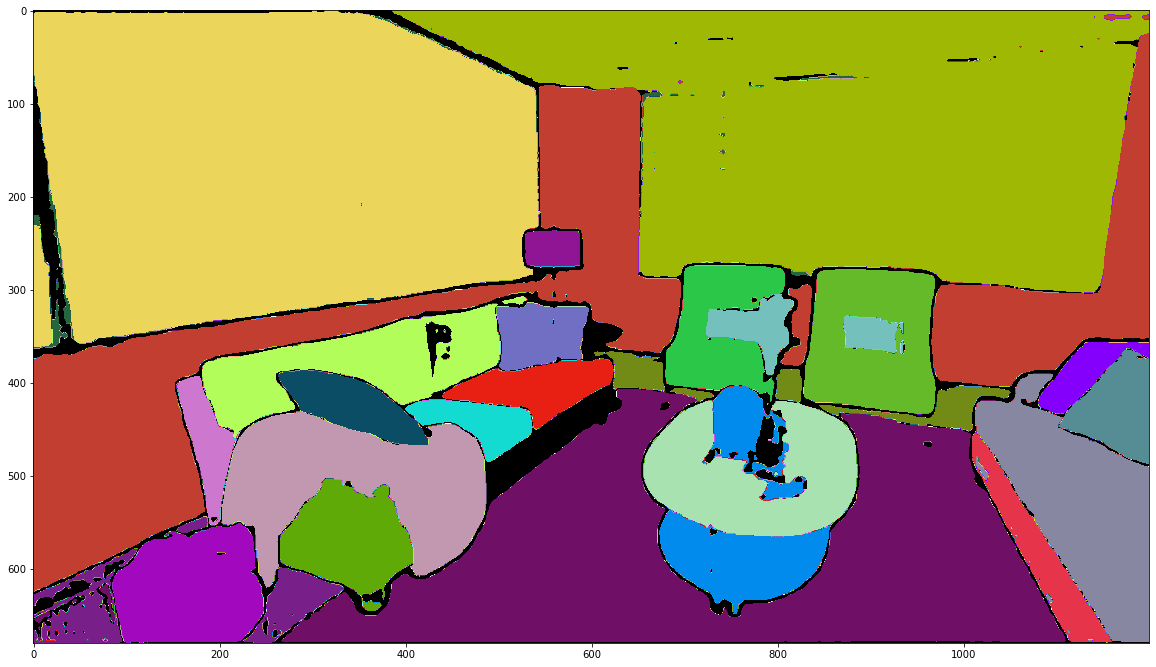

ith Frame 940


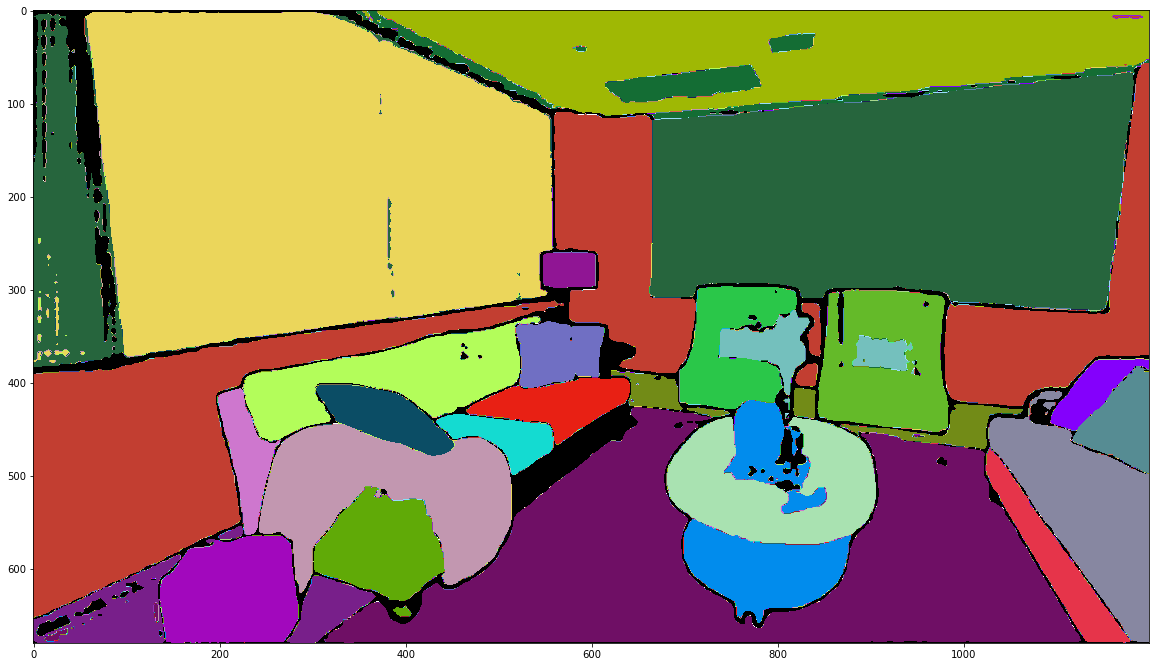

ith Frame 930


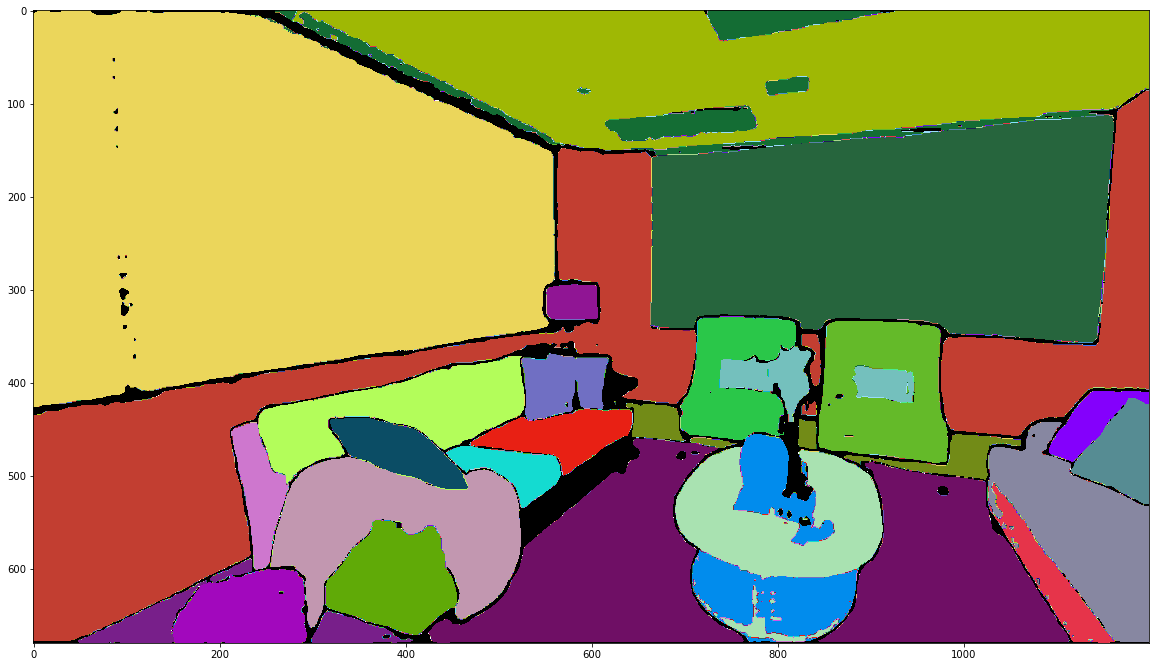

ith Frame 920


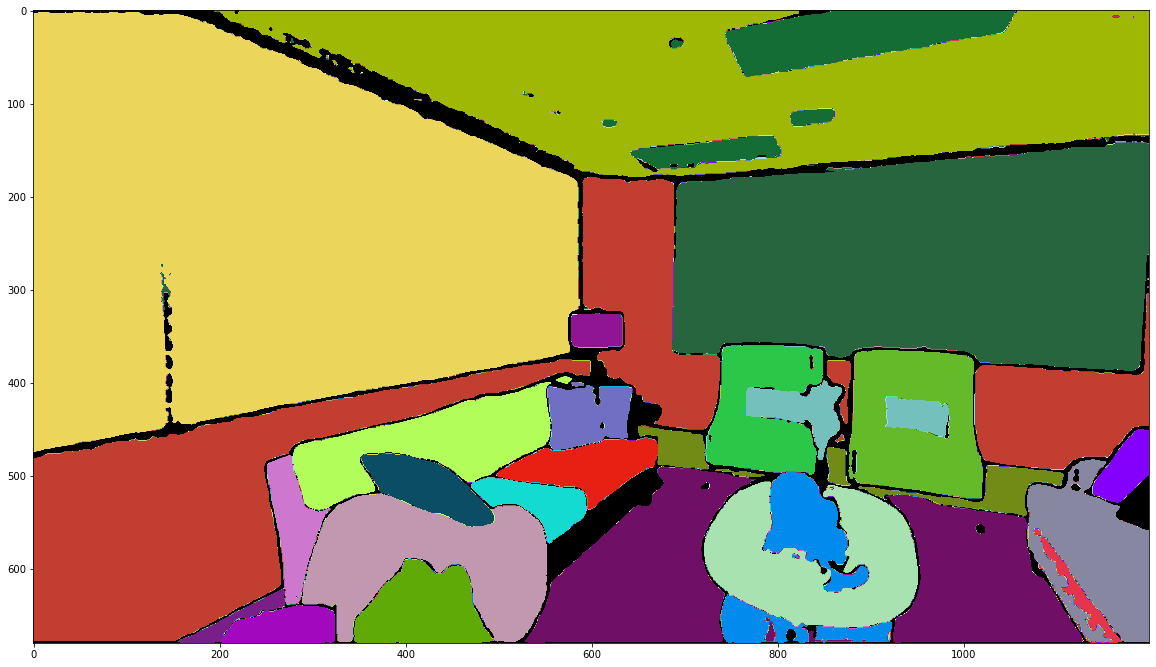

ith Frame 910


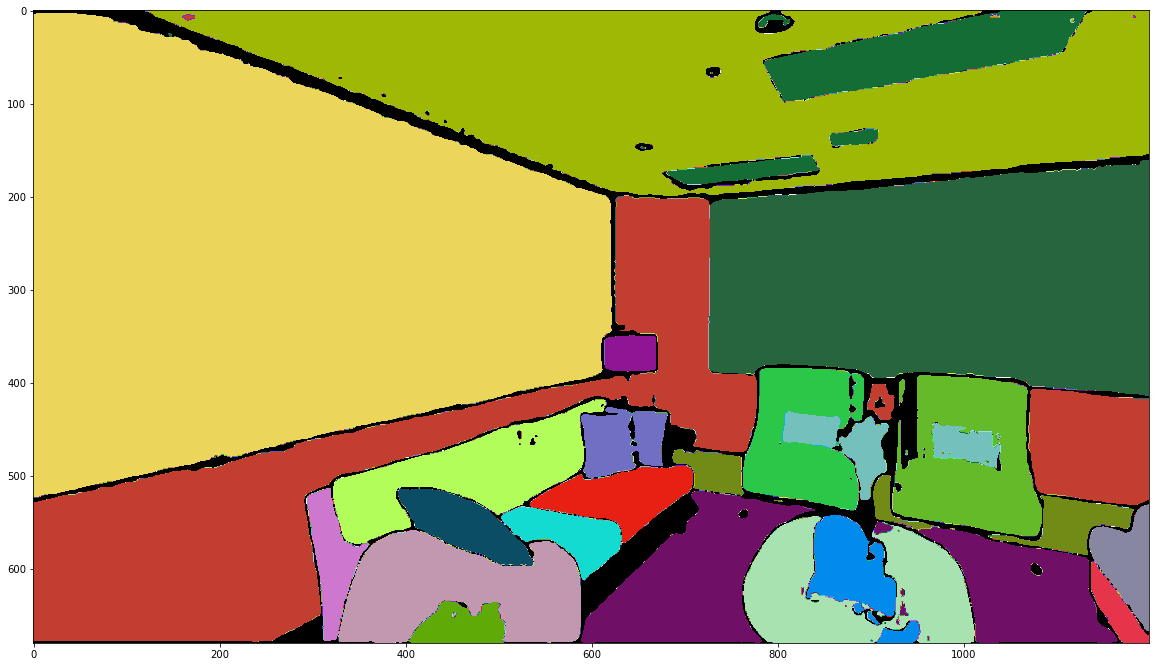

ith Frame 900


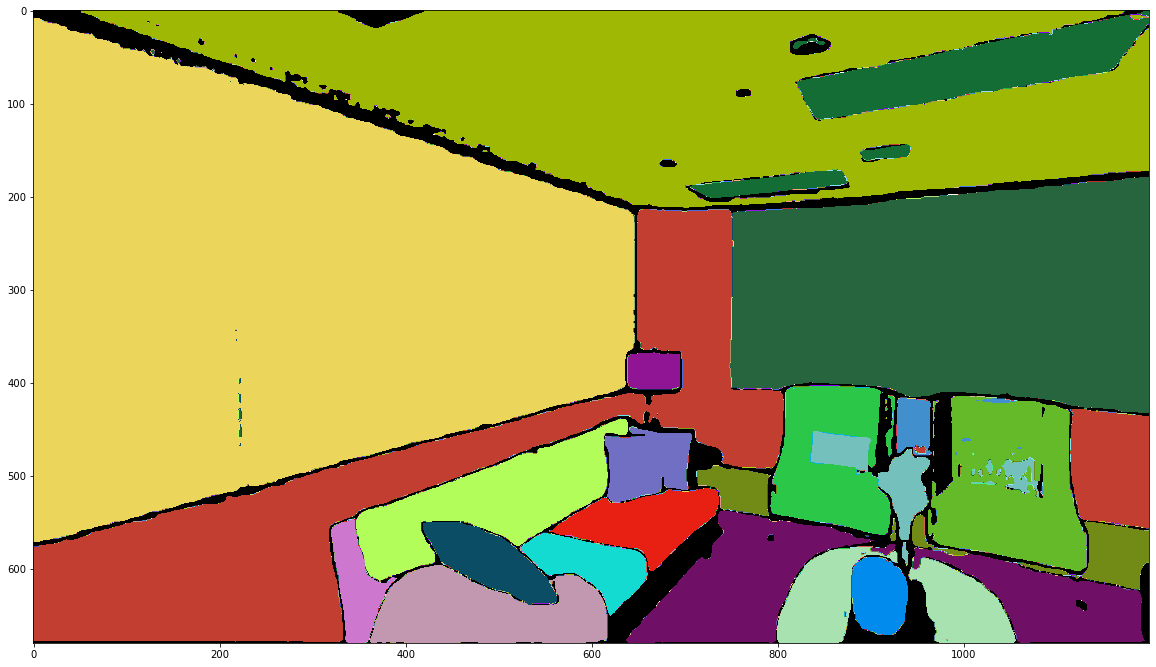

ith Frame 890


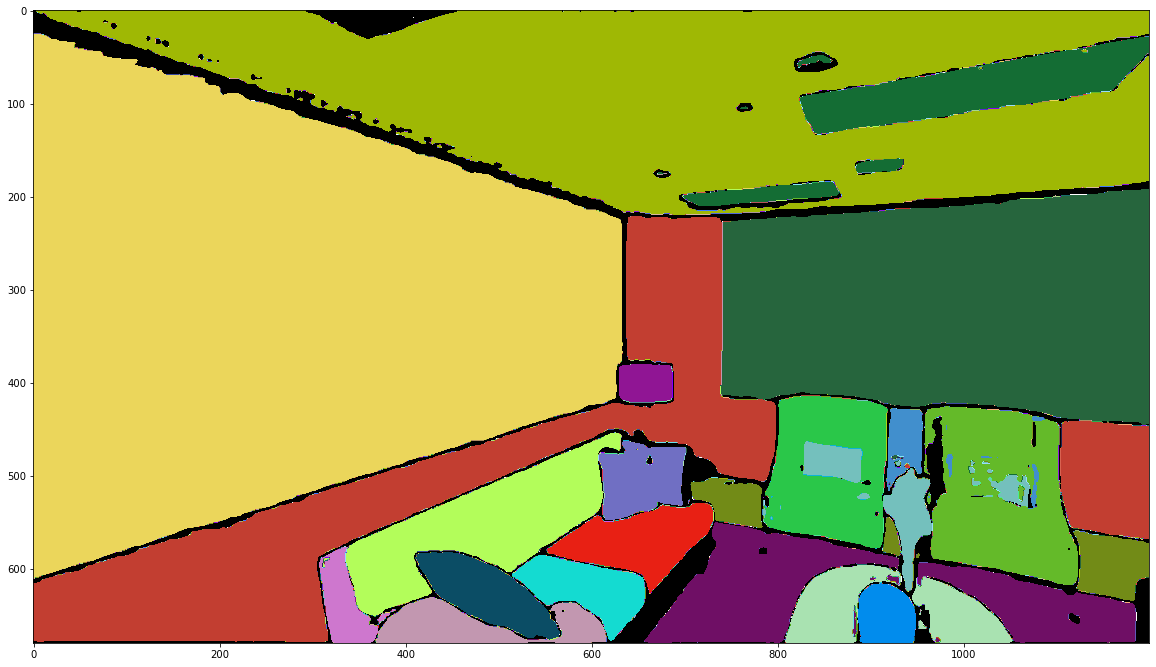

ith Frame 880


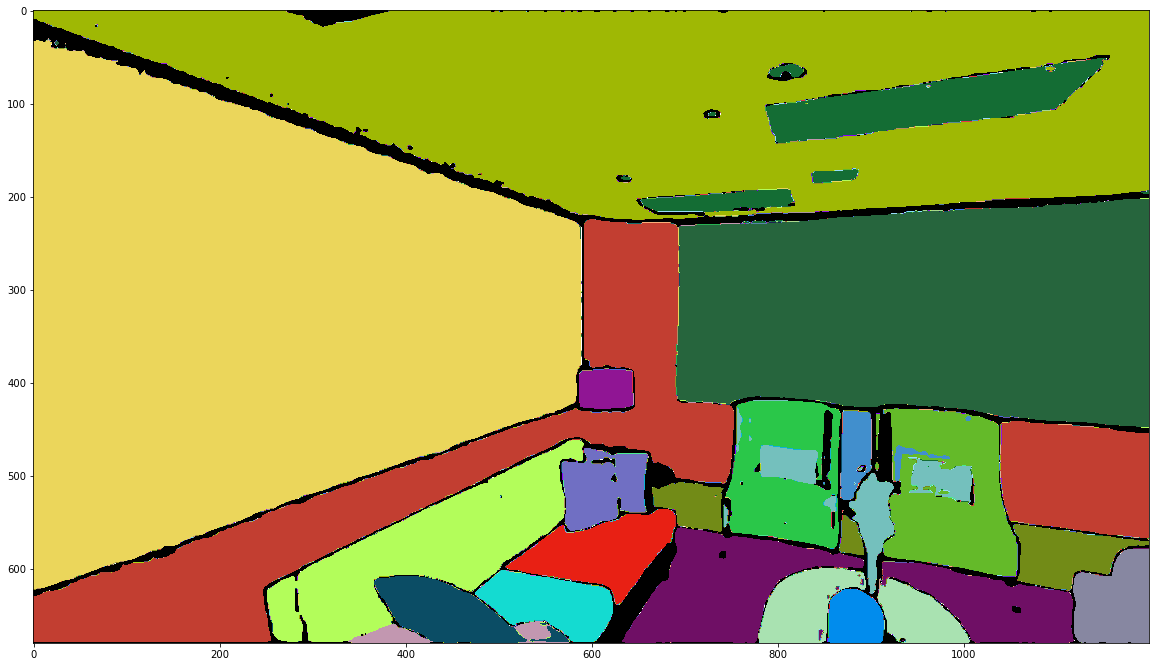

ith Frame 870


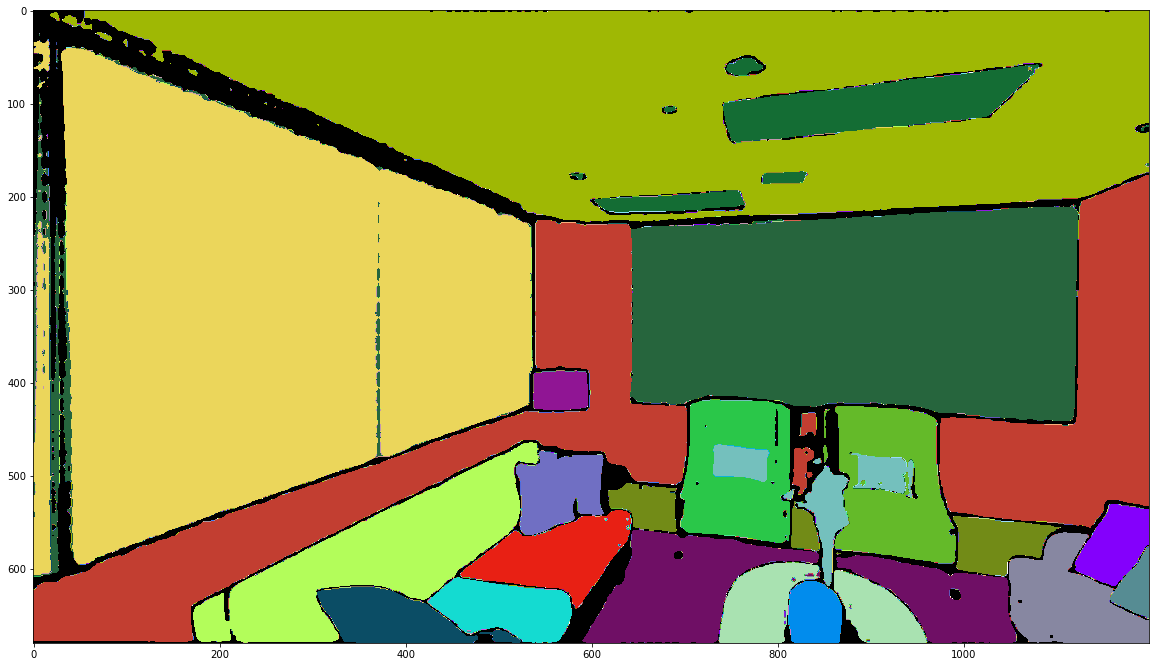

ith Frame 860


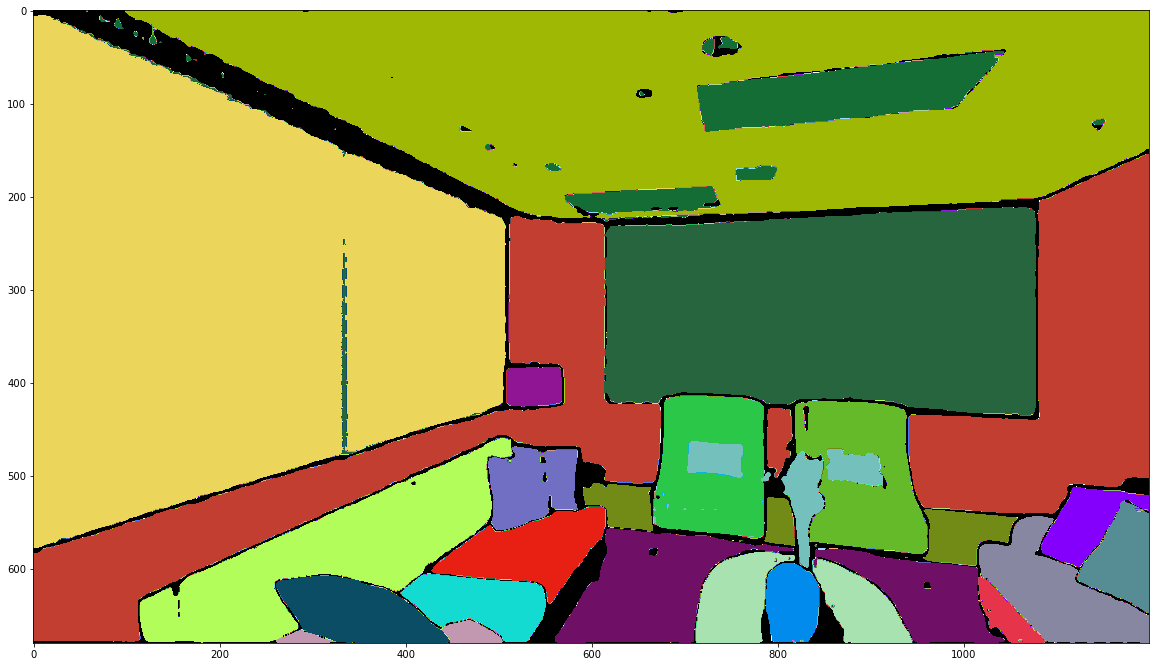

ith Frame 850


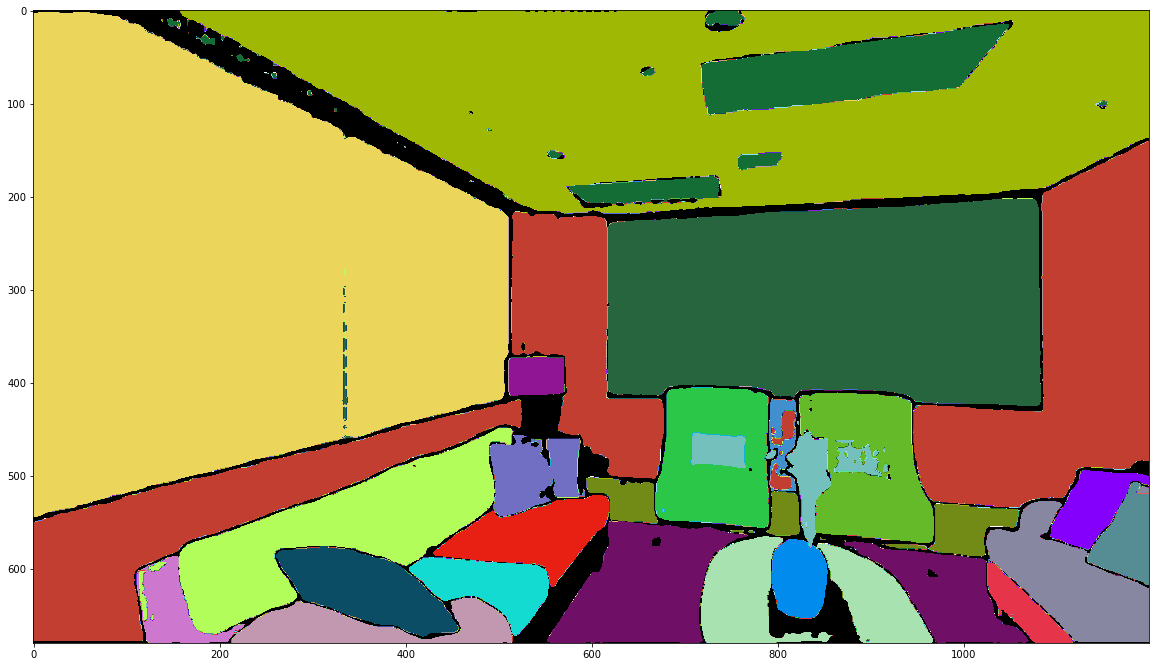

ith Frame 840


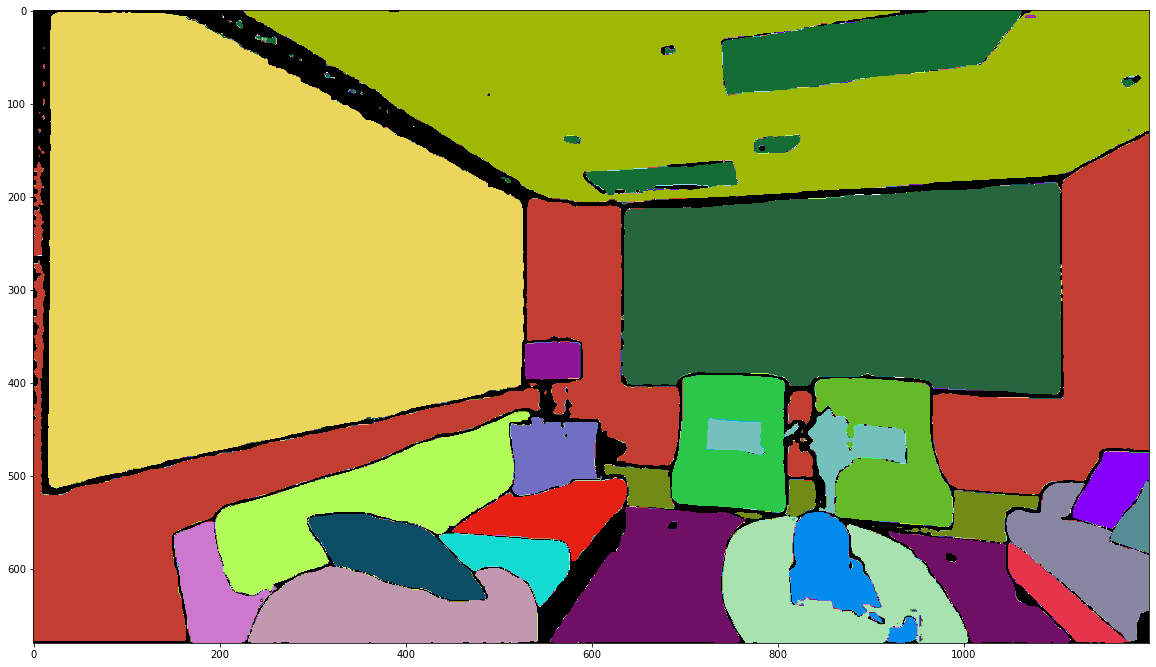

ith Frame 830


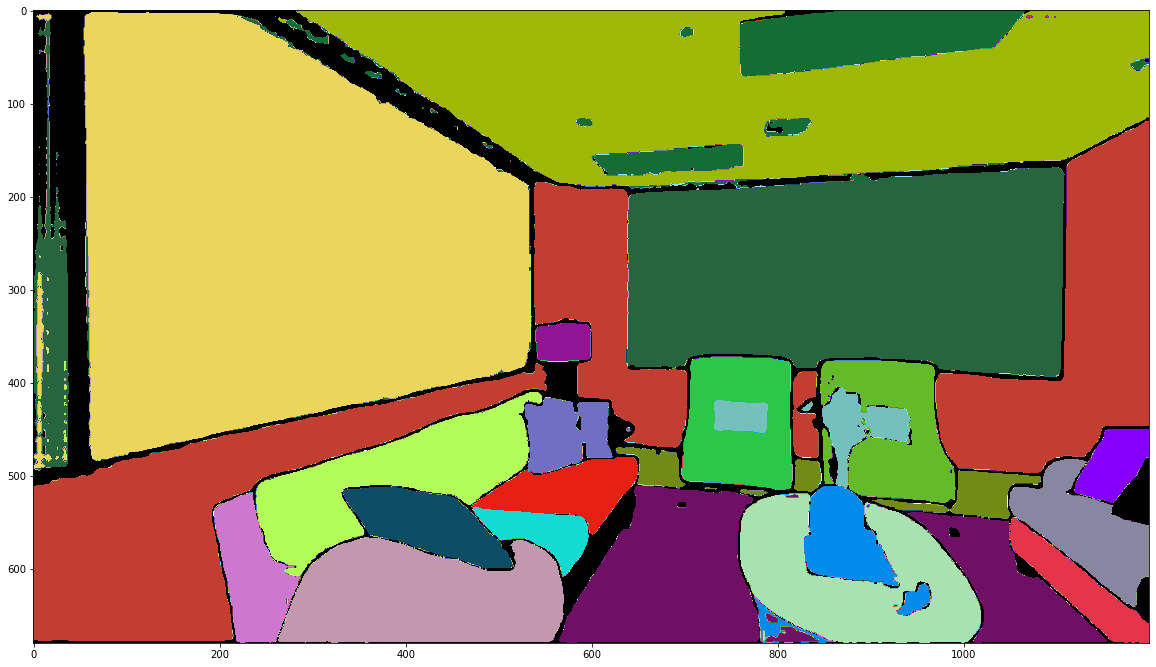

ith Frame 820


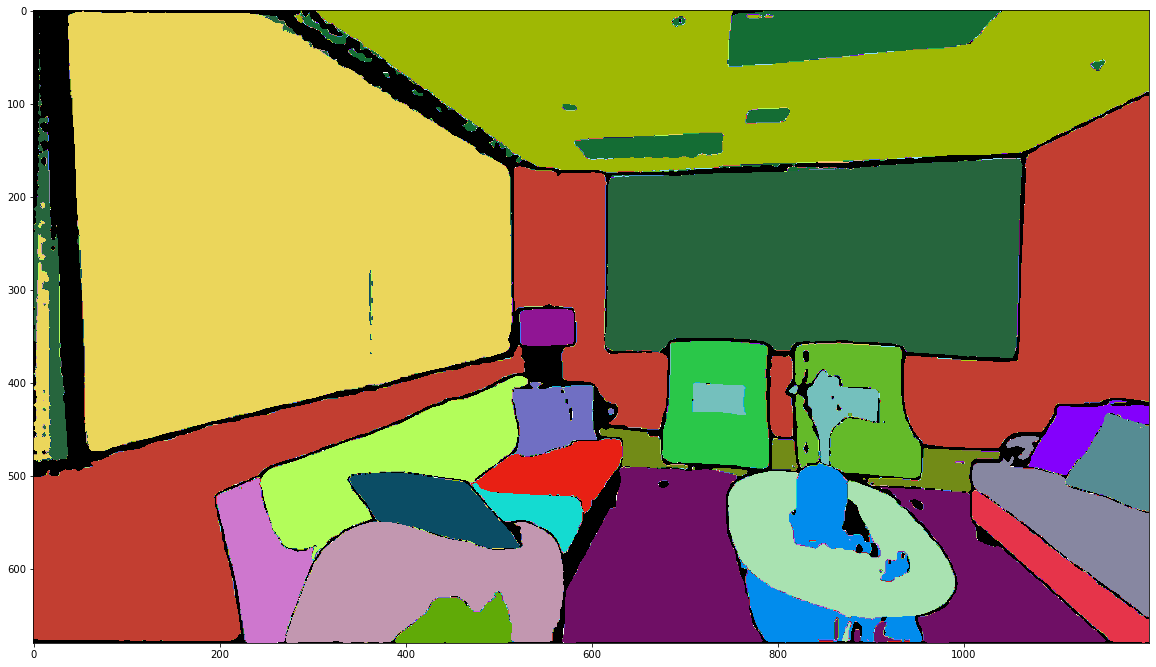

ith Frame 810


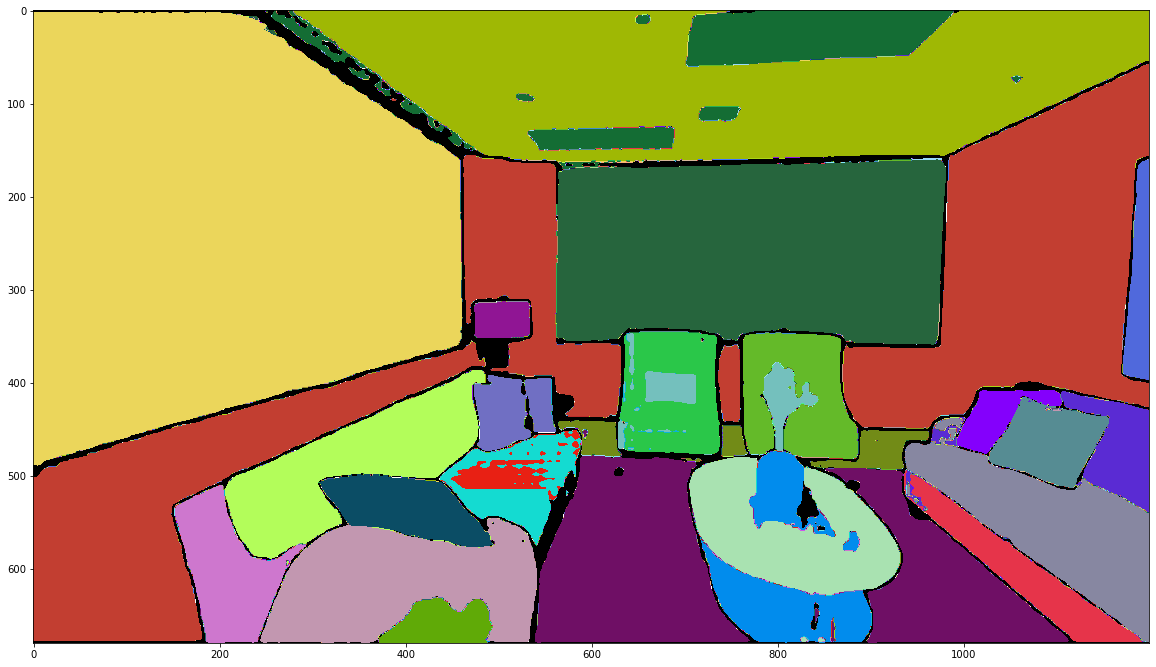

ith Frame 800


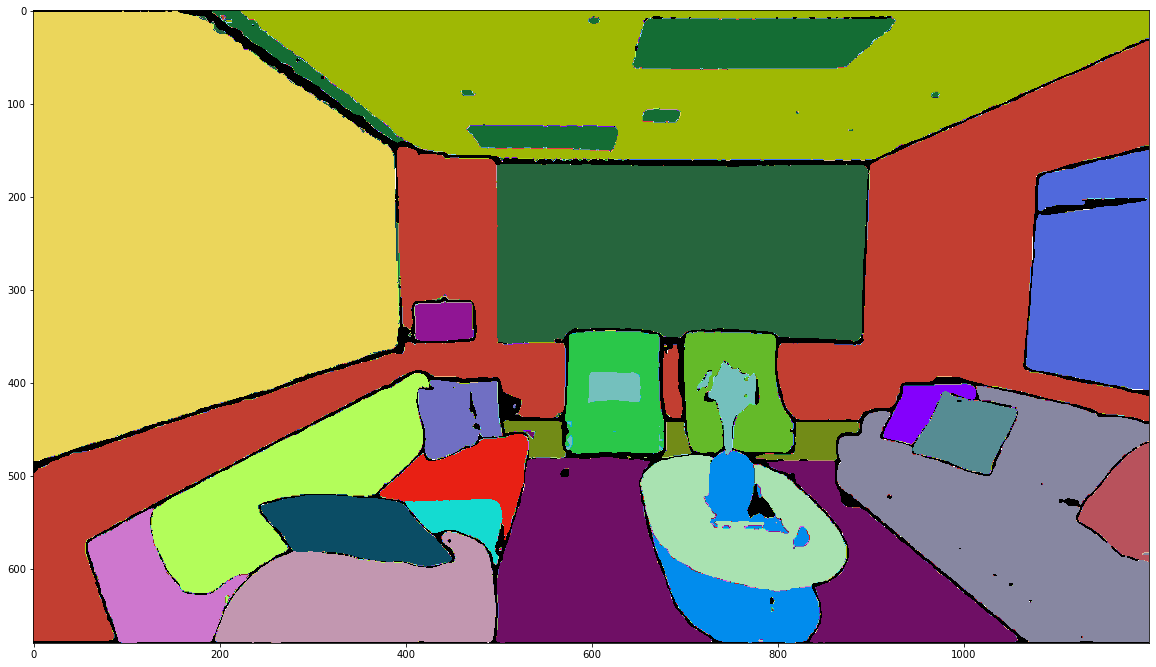

ith Frame 790


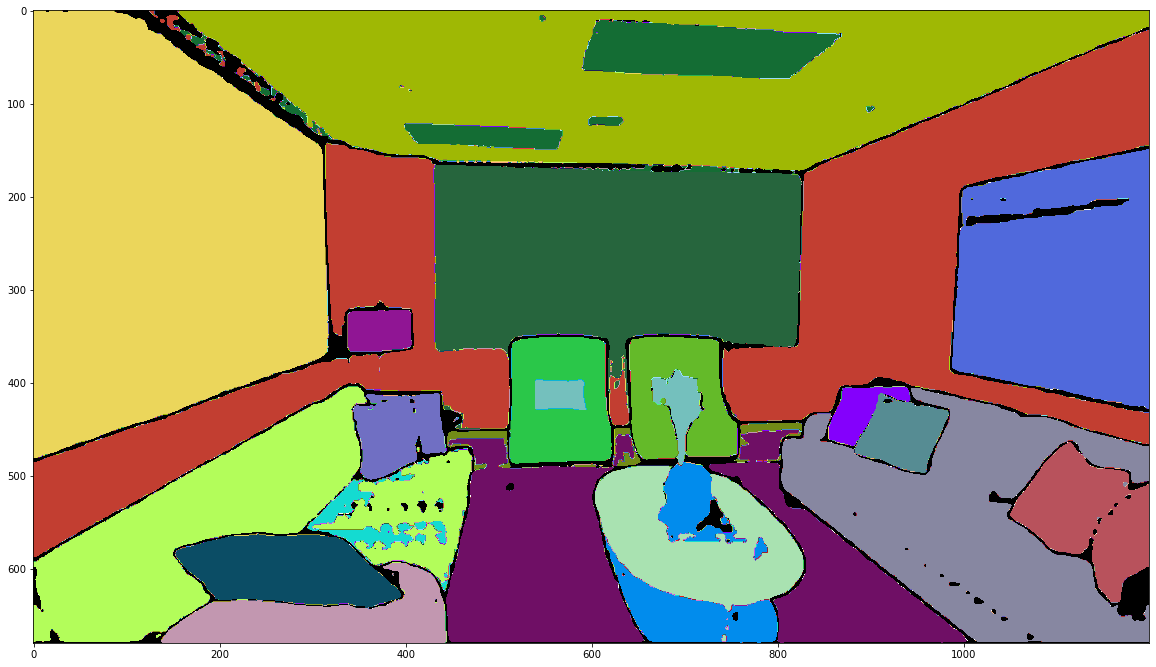

ith Frame 780


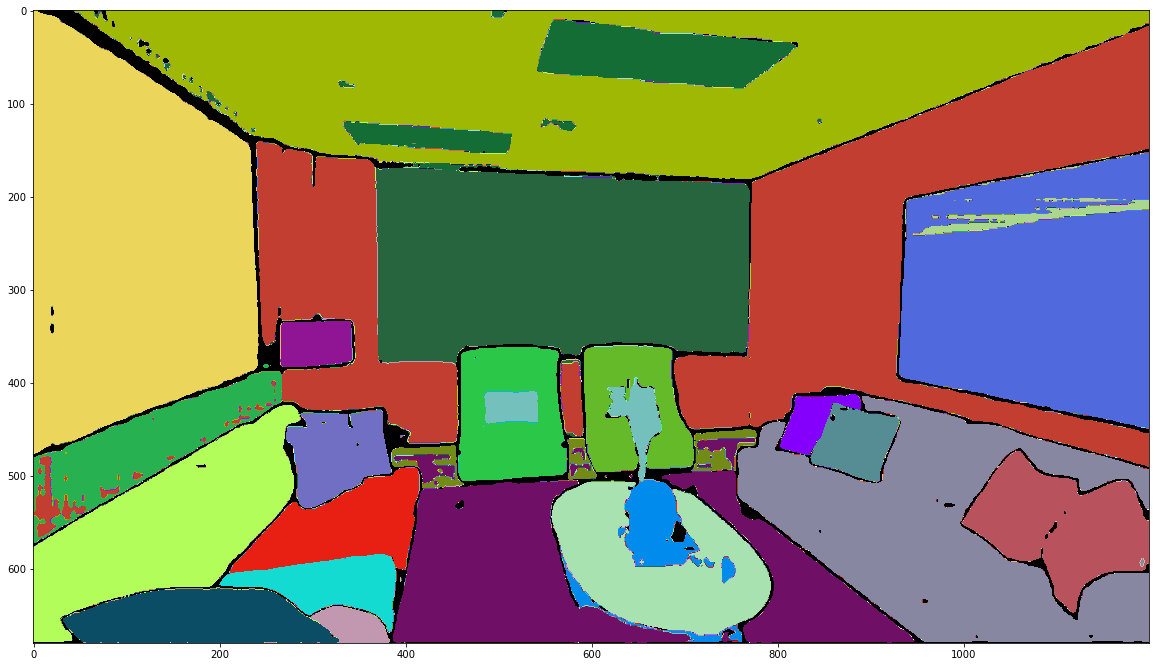

ith Frame 770


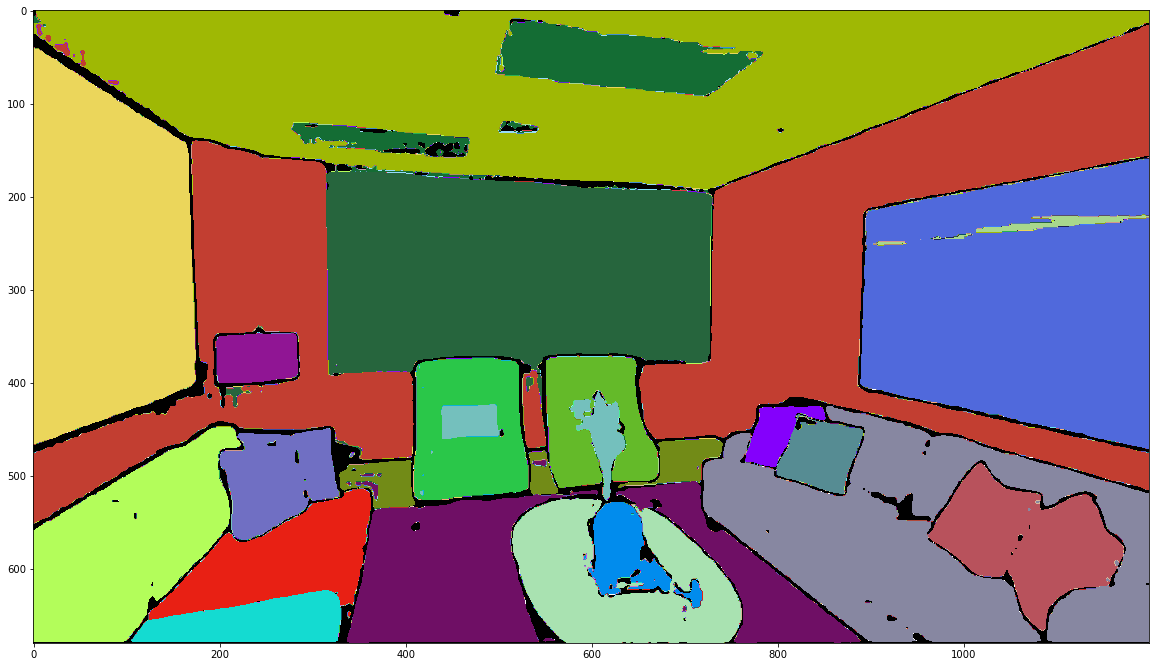

ith Frame 760


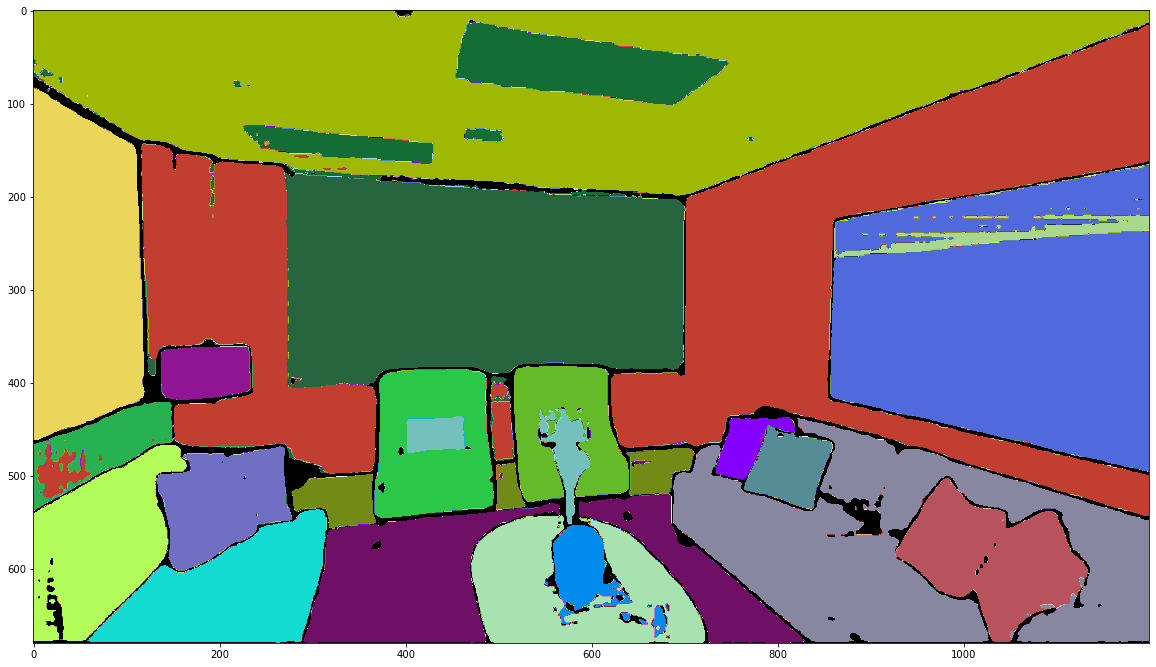

ith Frame 750


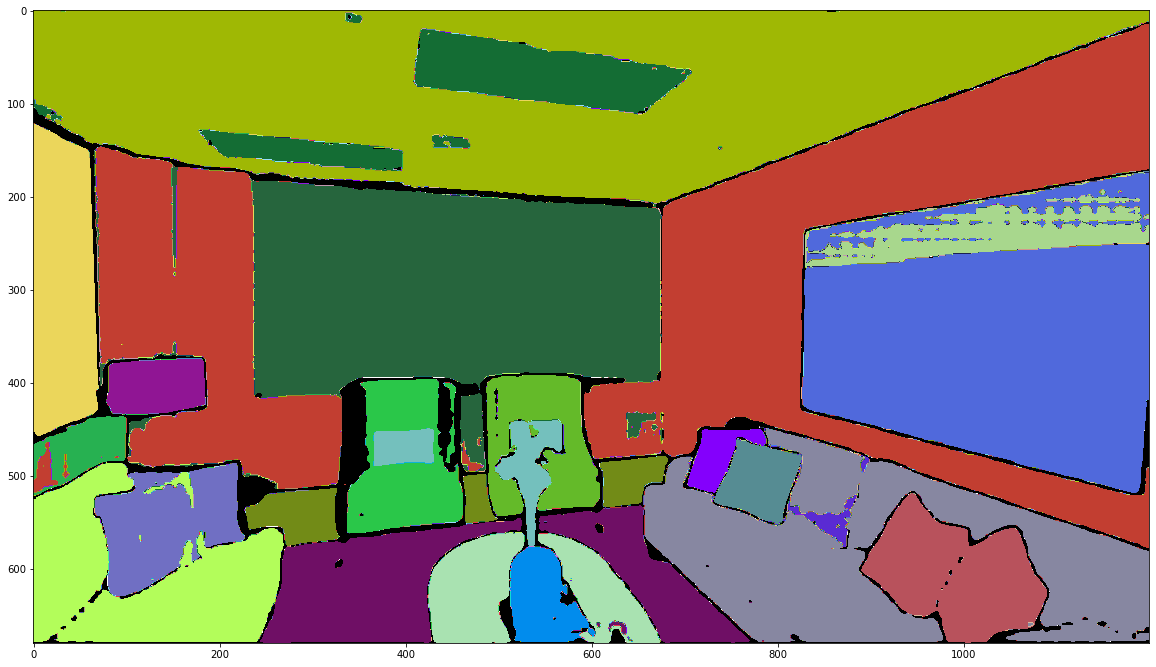

ith Frame 740


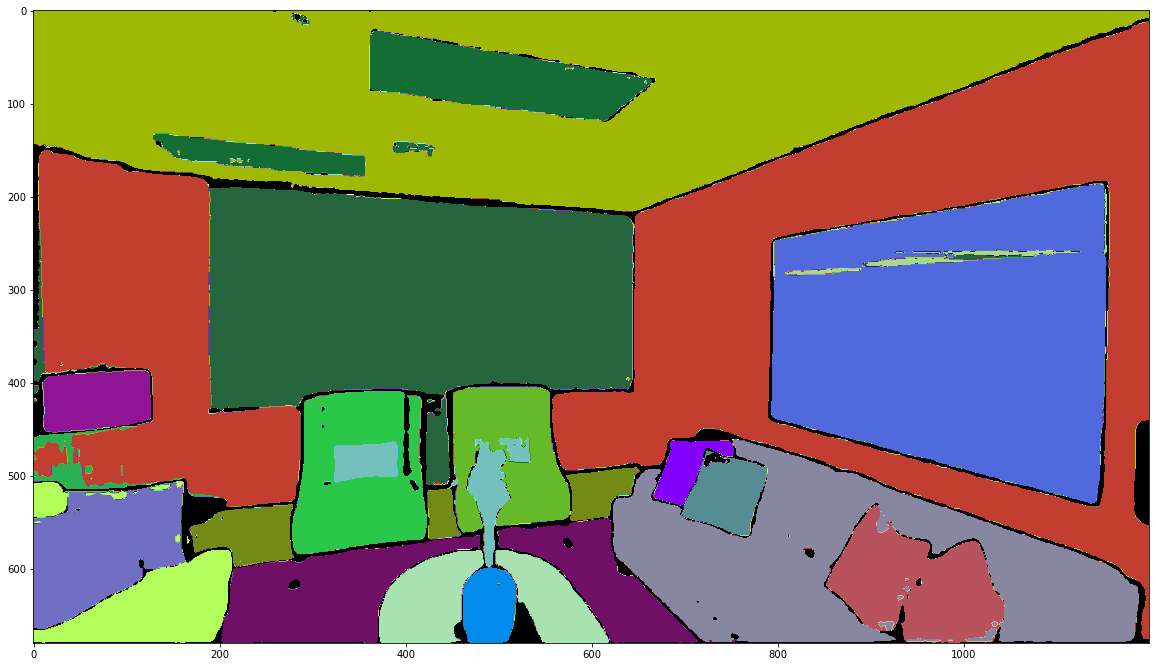

ith Frame 730


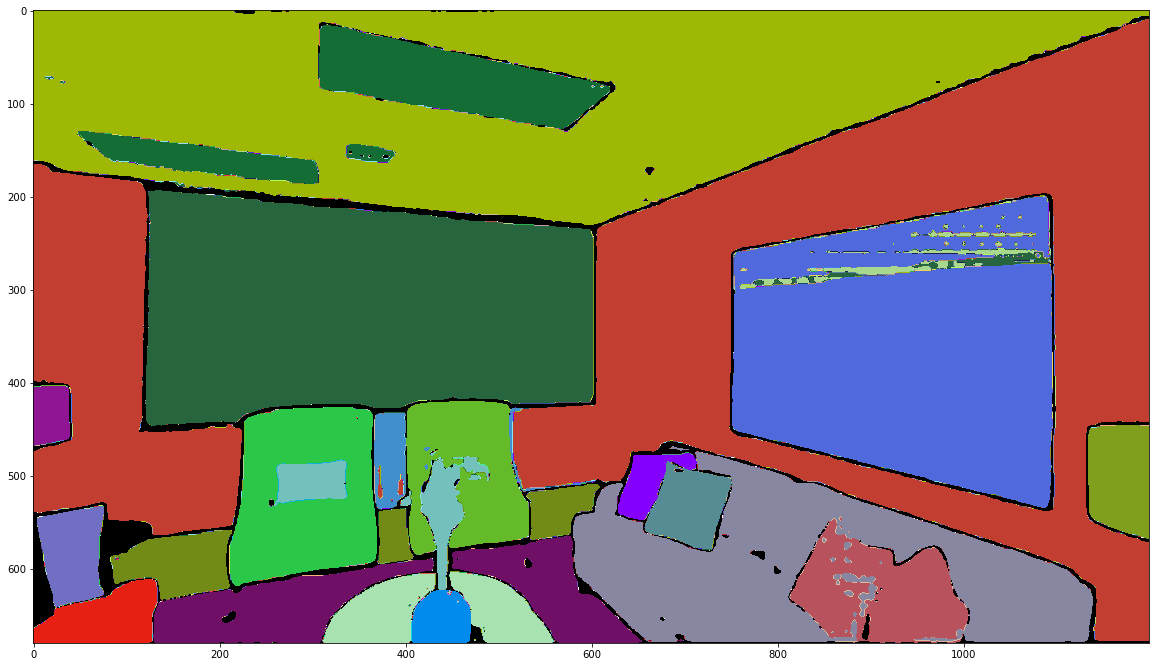

ith Frame 720


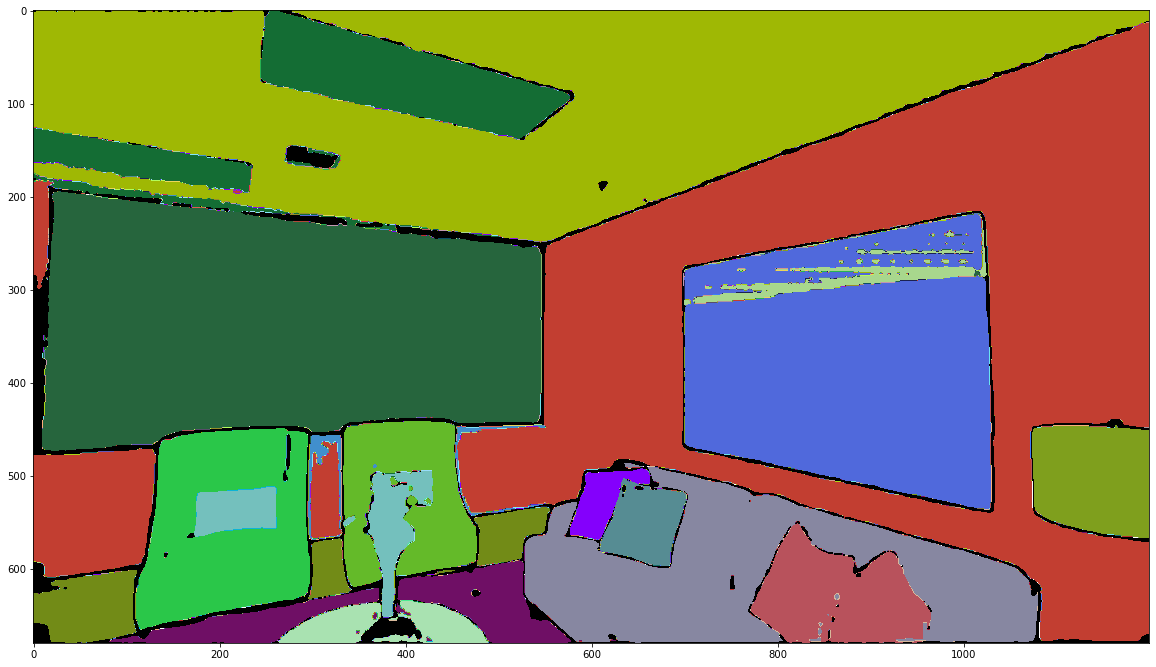

ith Frame 710


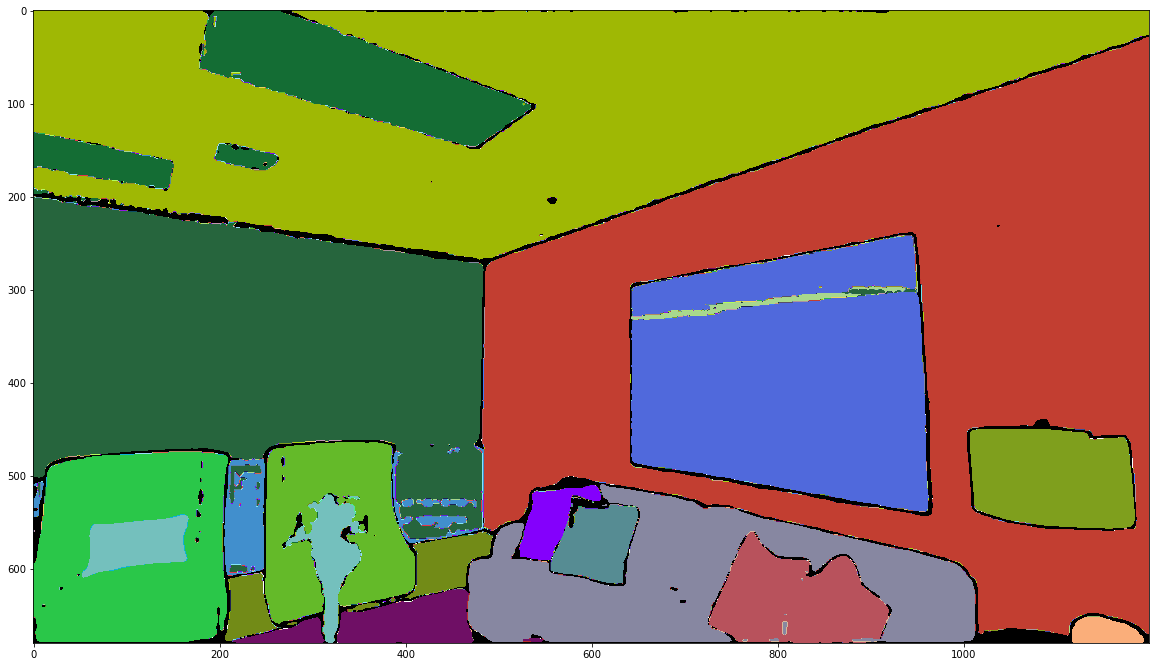

ith Frame 700


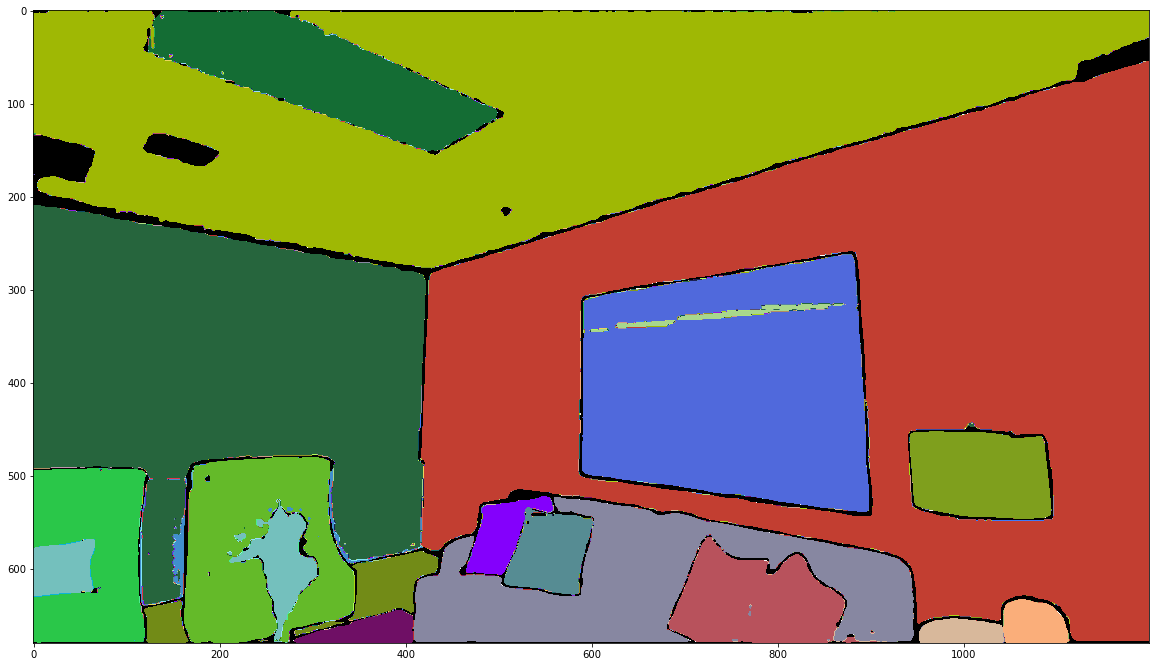

ith Frame 690


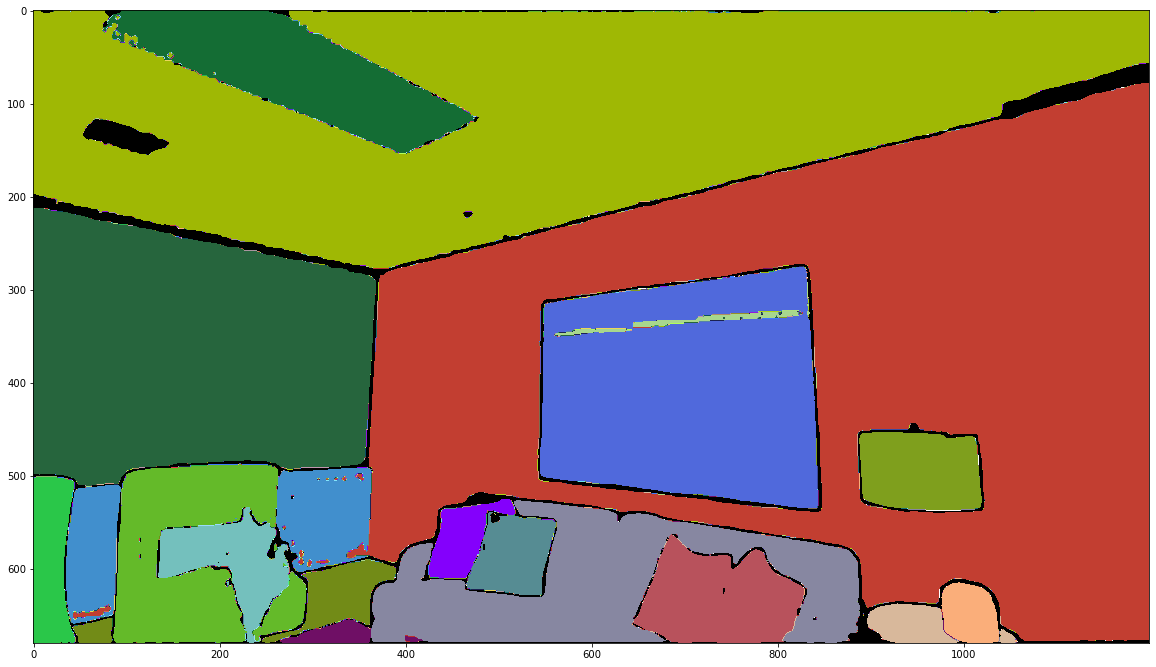

ith Frame 680


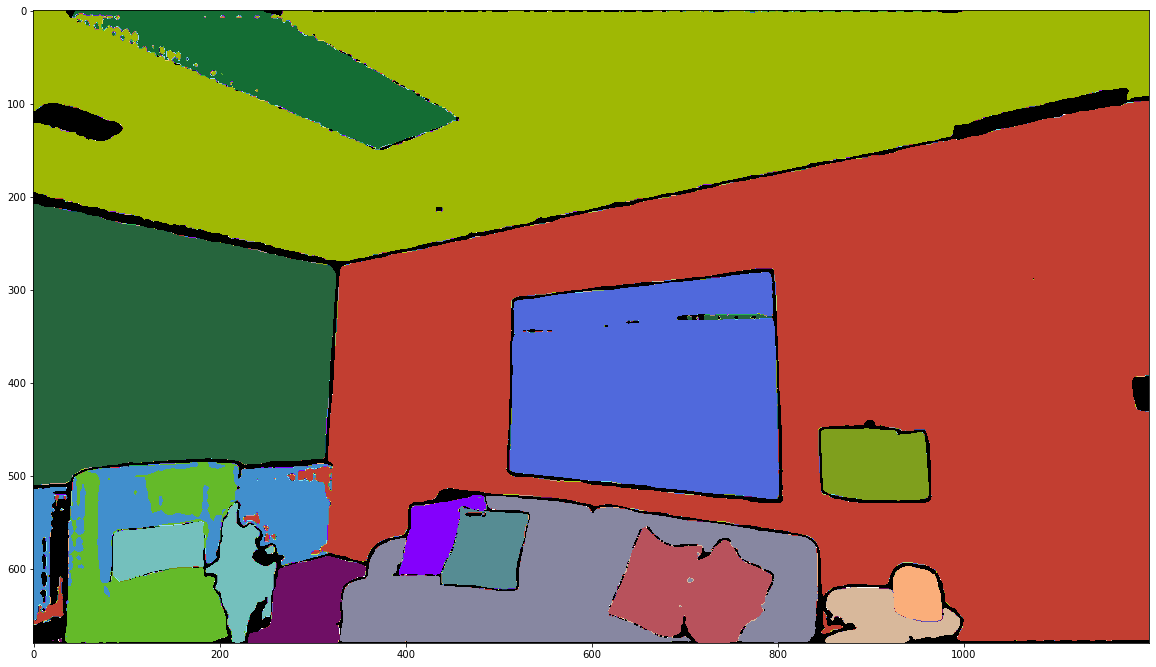

ith Frame 670


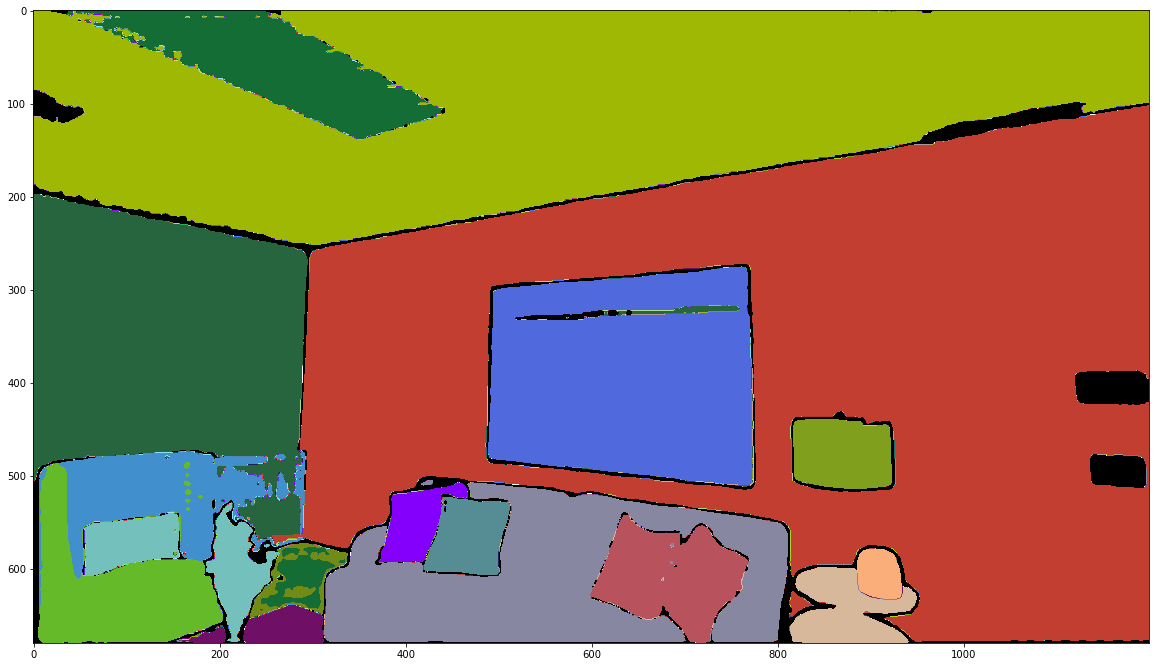

ith Frame 660


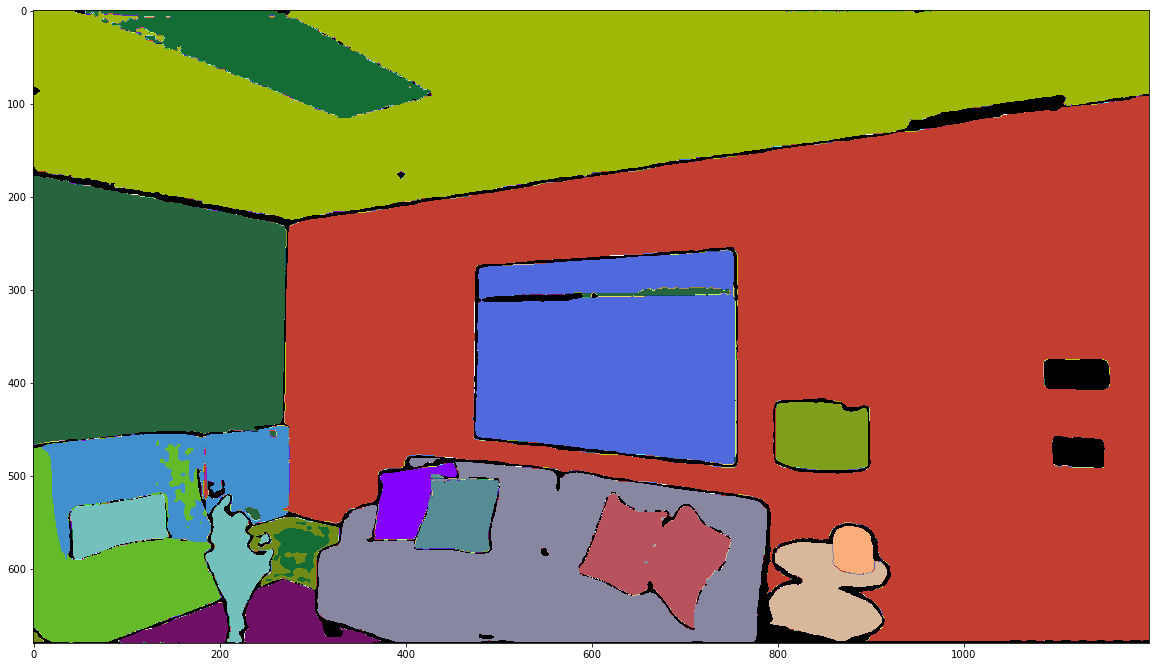

ith Frame 650


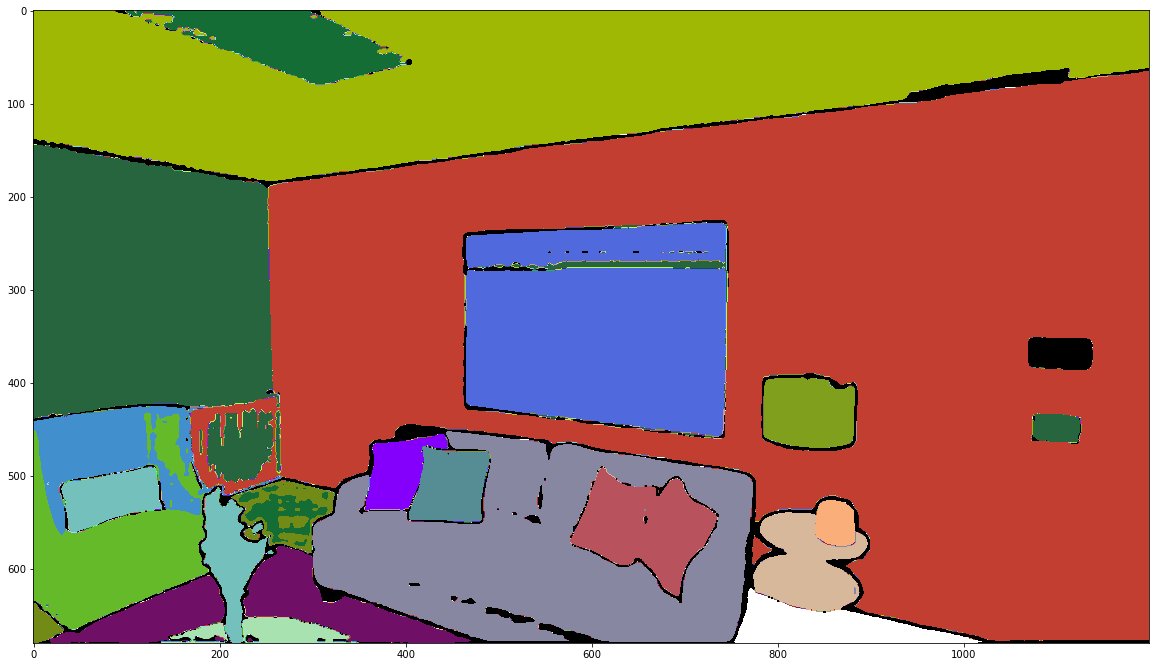

ith Frame 640


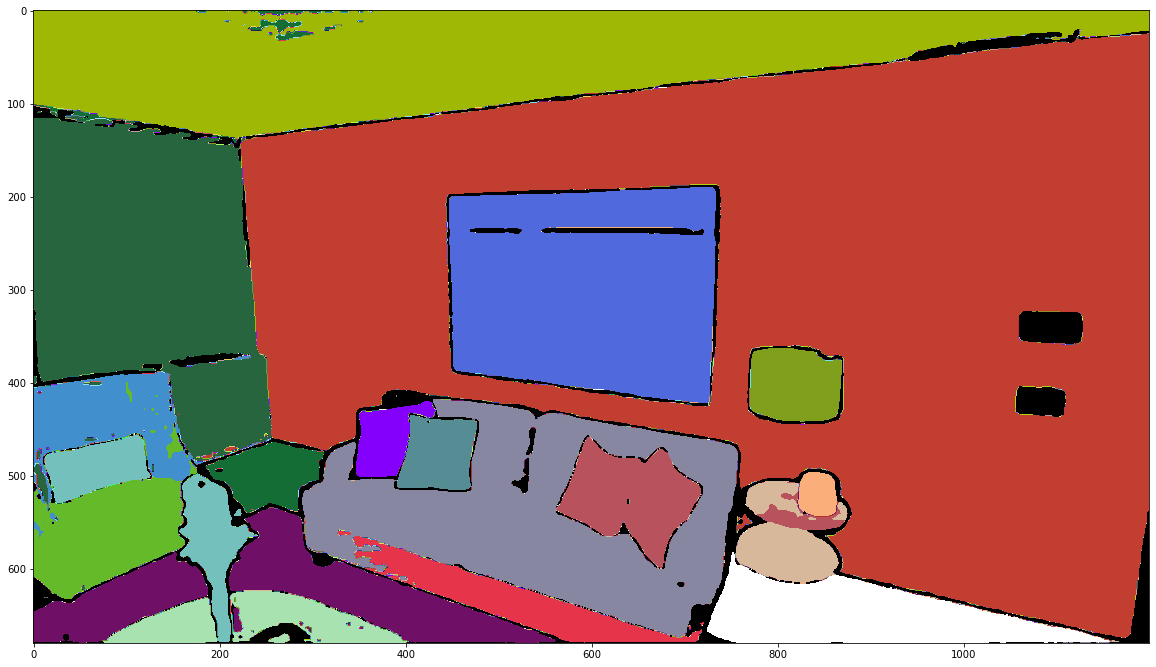

ith Frame 630


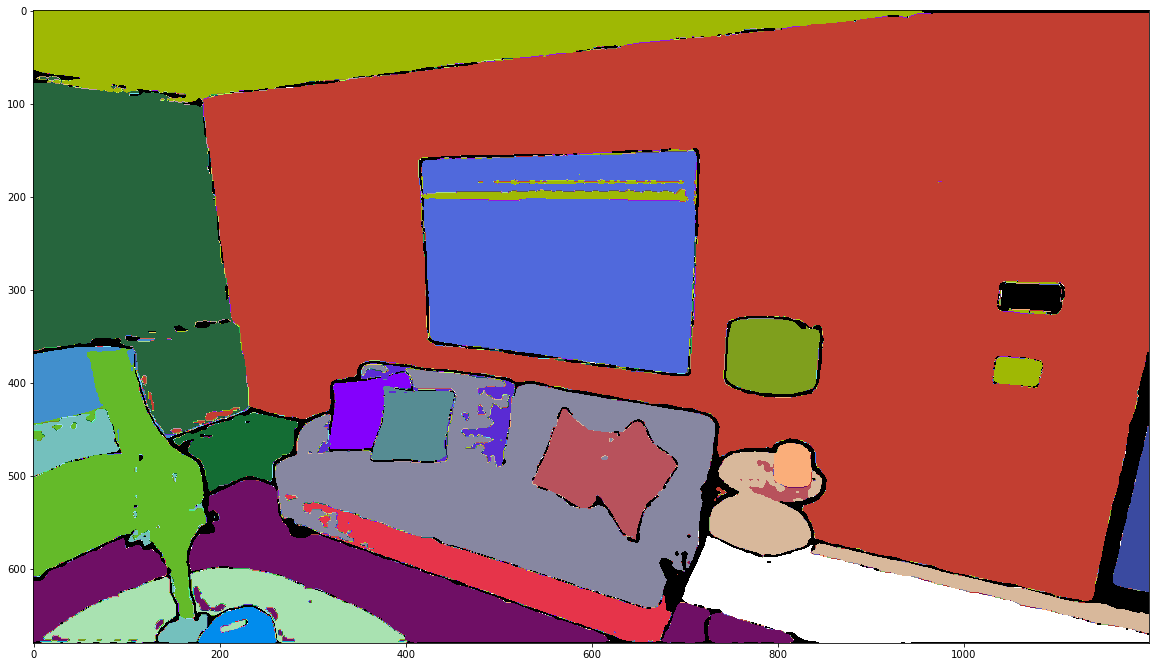

ith Frame 620


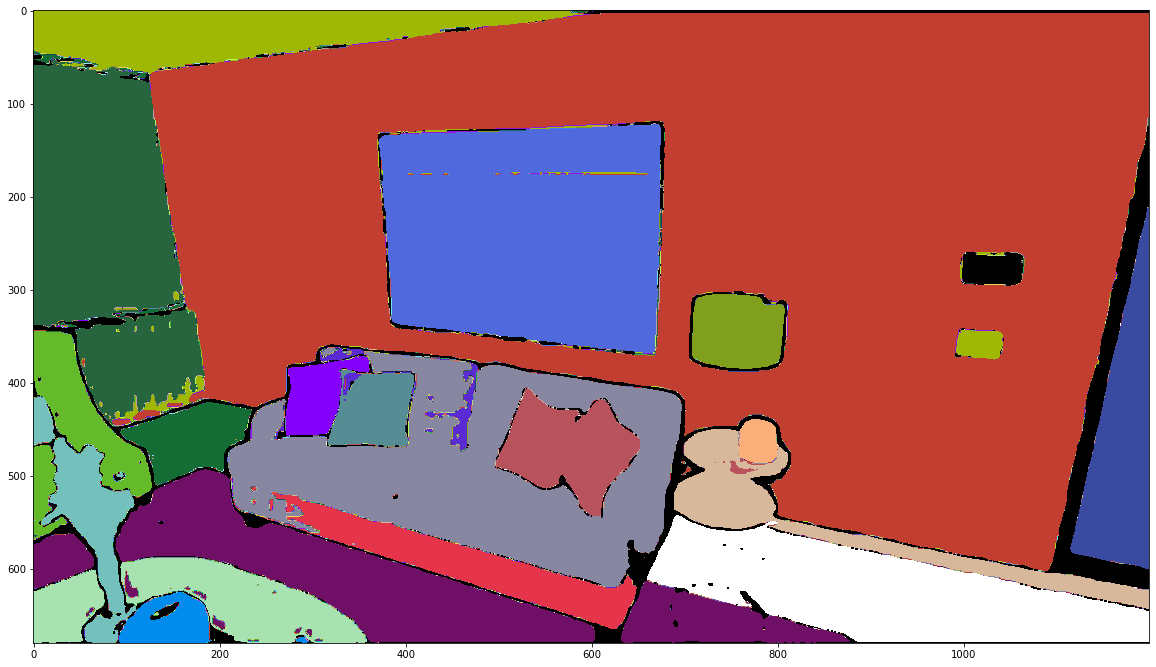

ith Frame 610


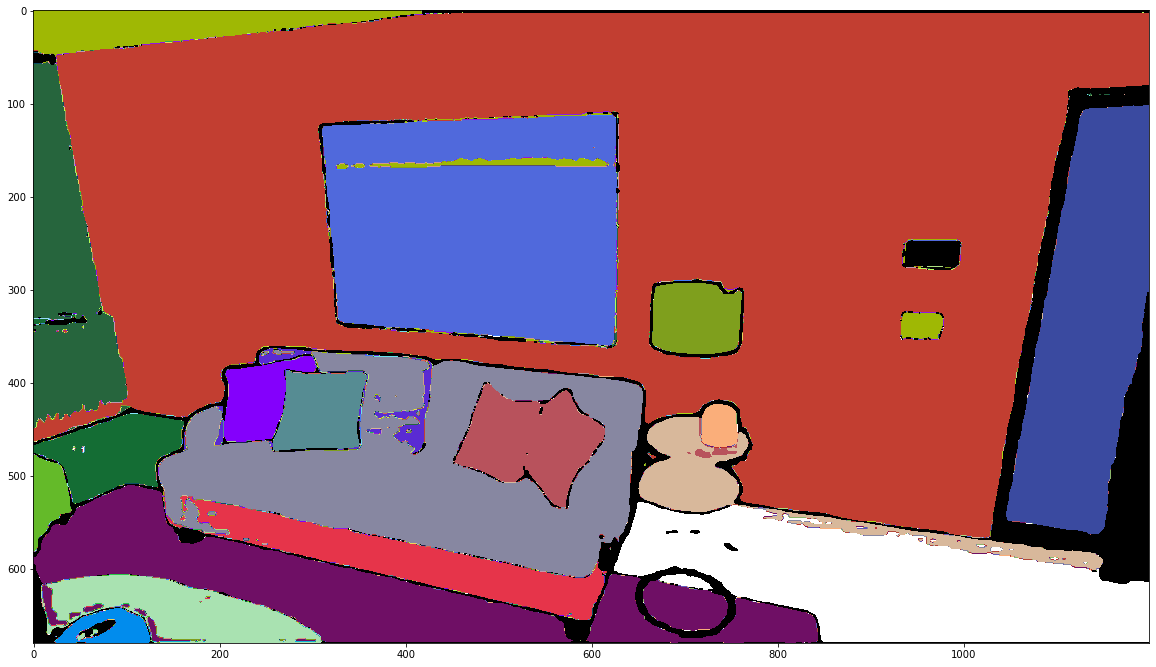

ith Frame 600


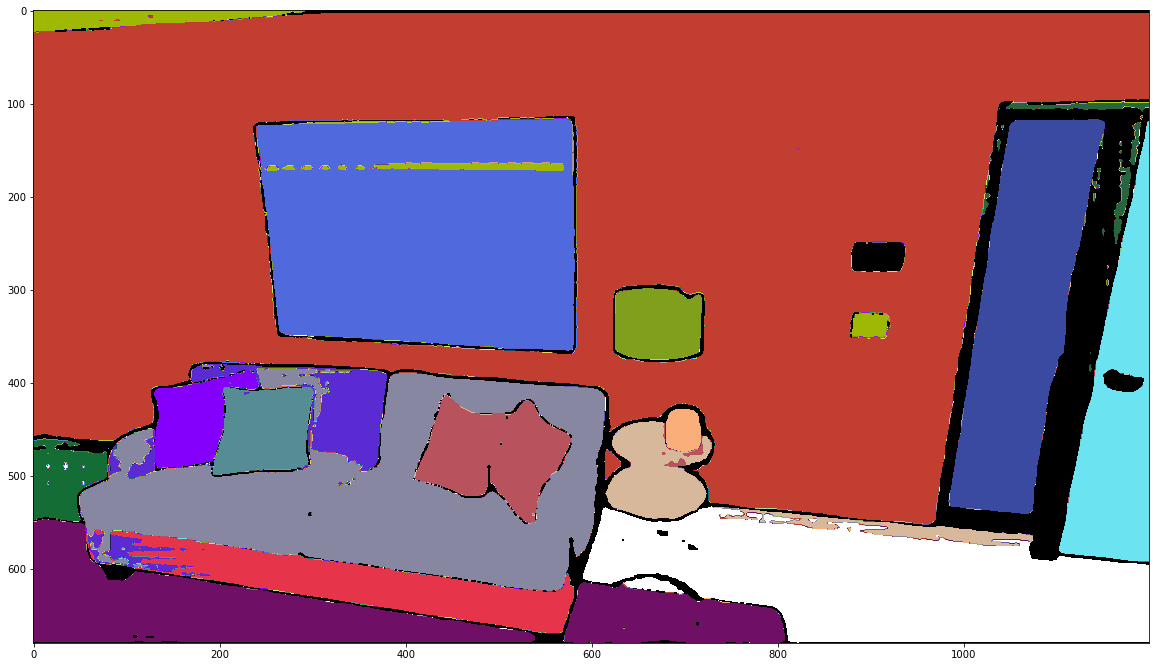

ith Frame 590


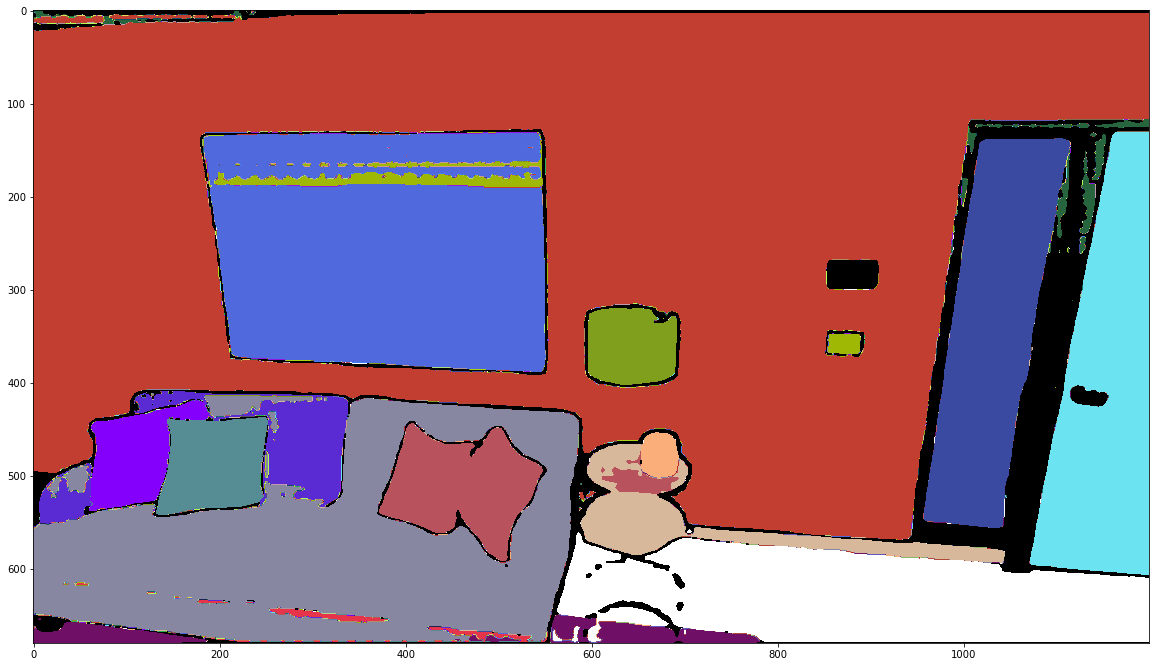

ith Frame 580


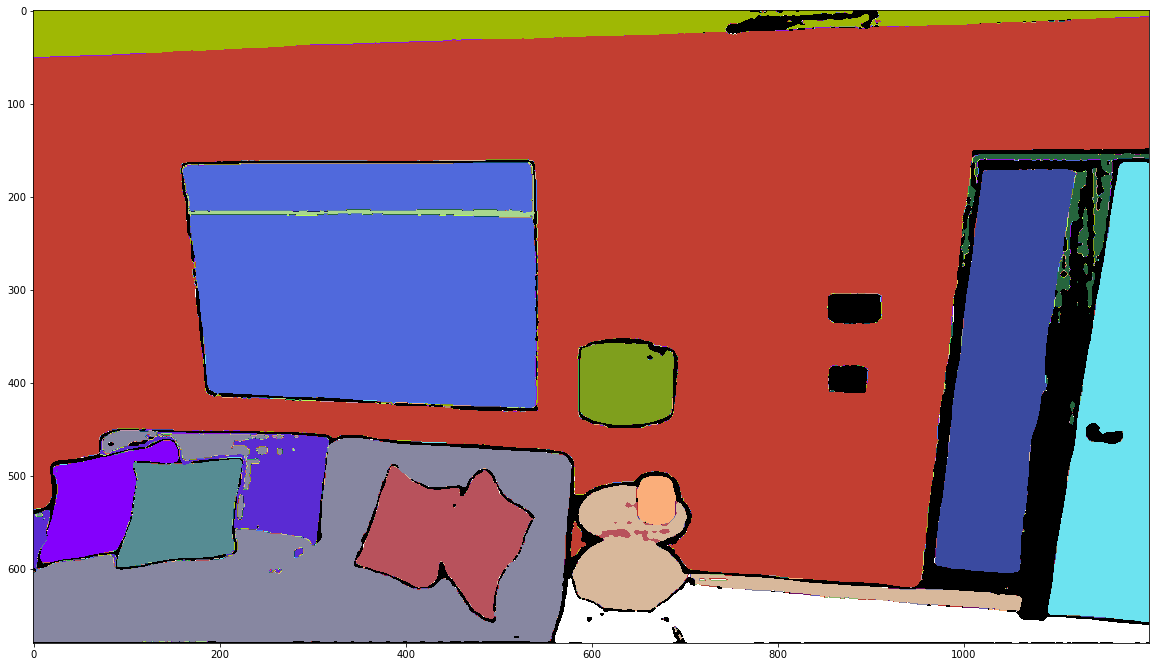

ith Frame 570


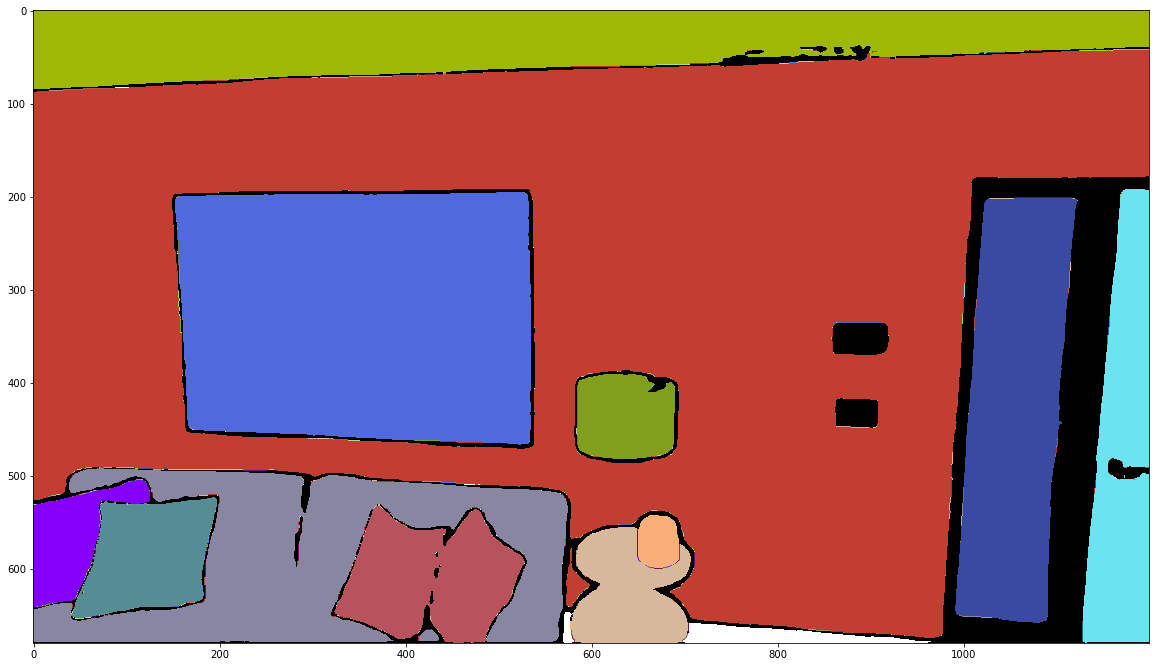

ith Frame 560


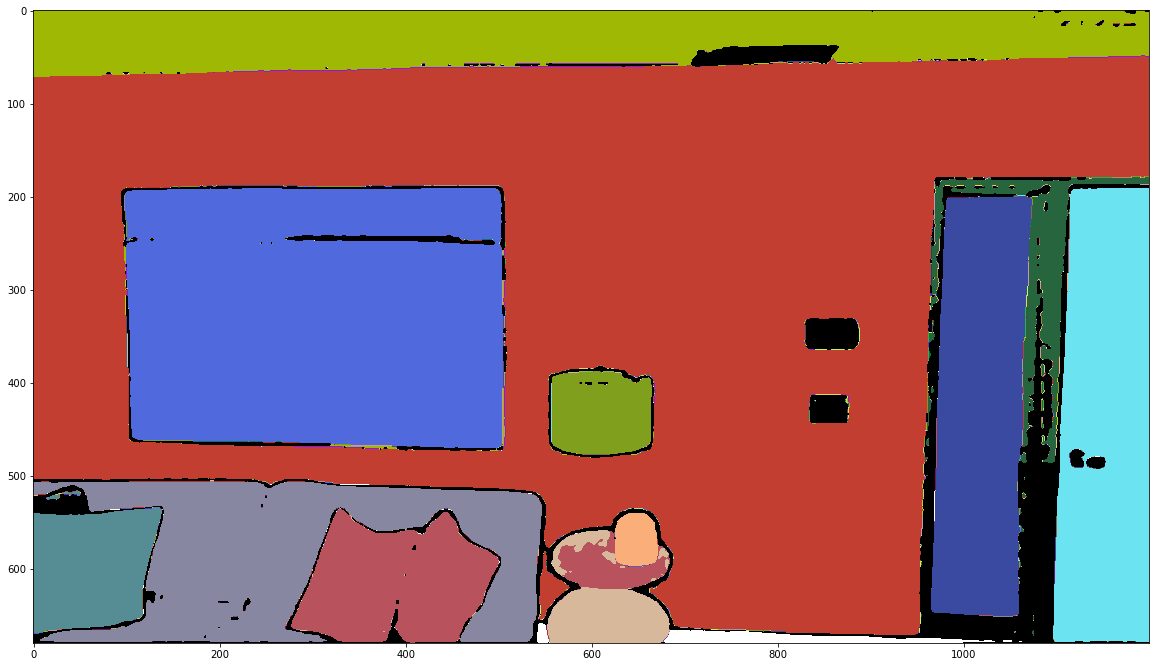

ith Frame 550


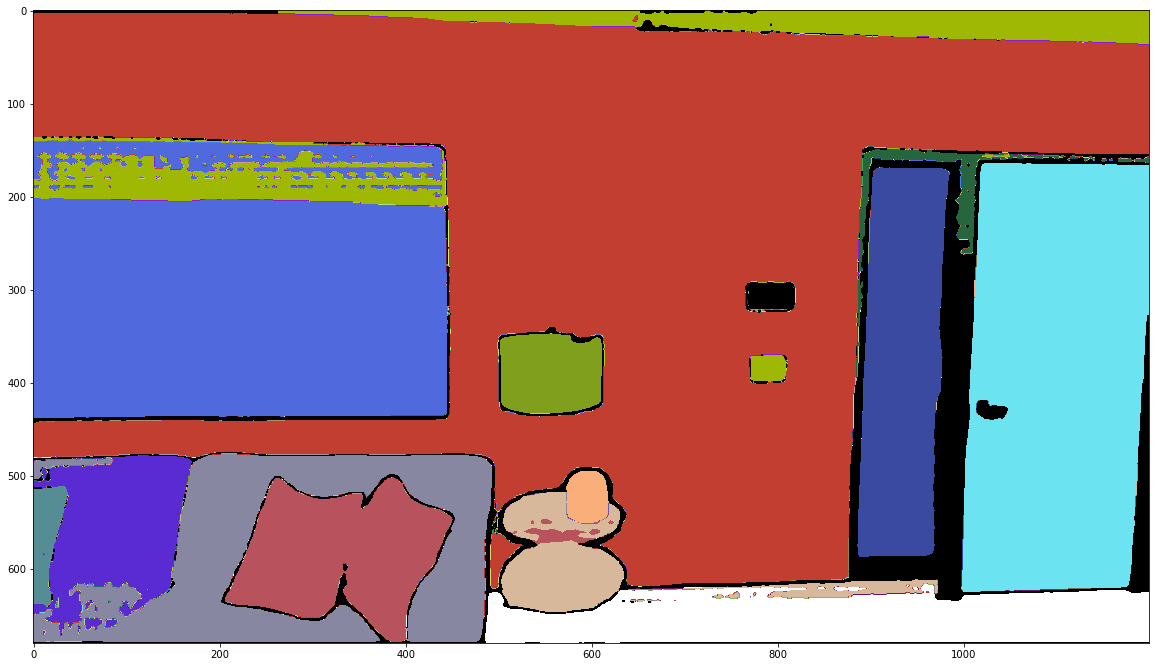

ith Frame 540


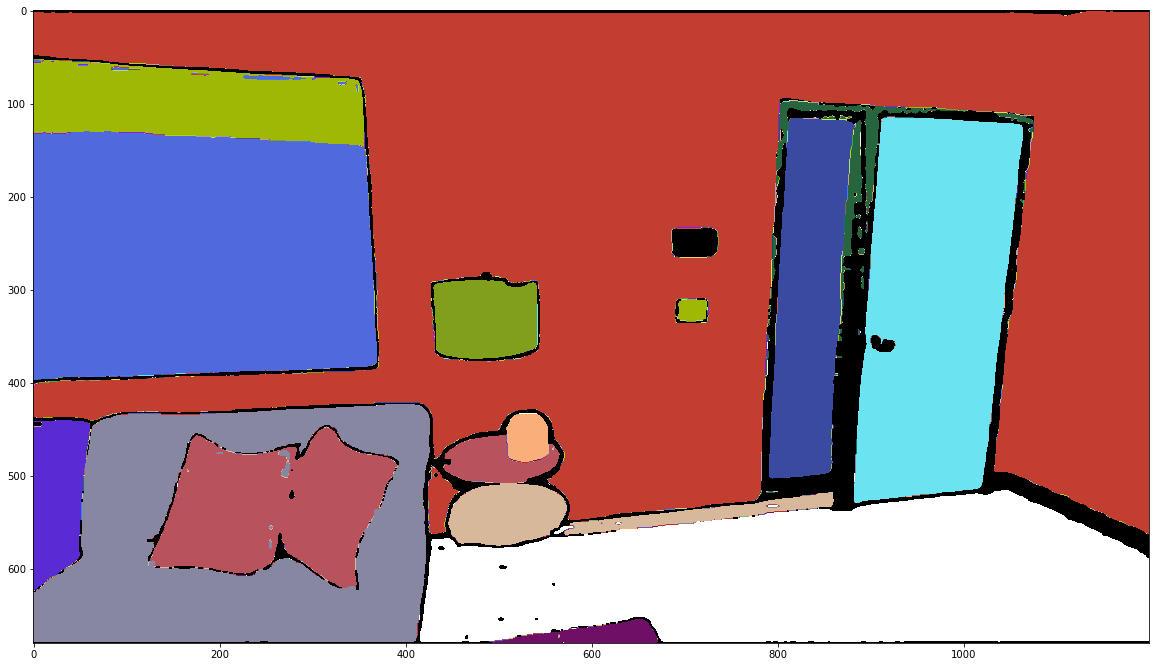

ith Frame 530


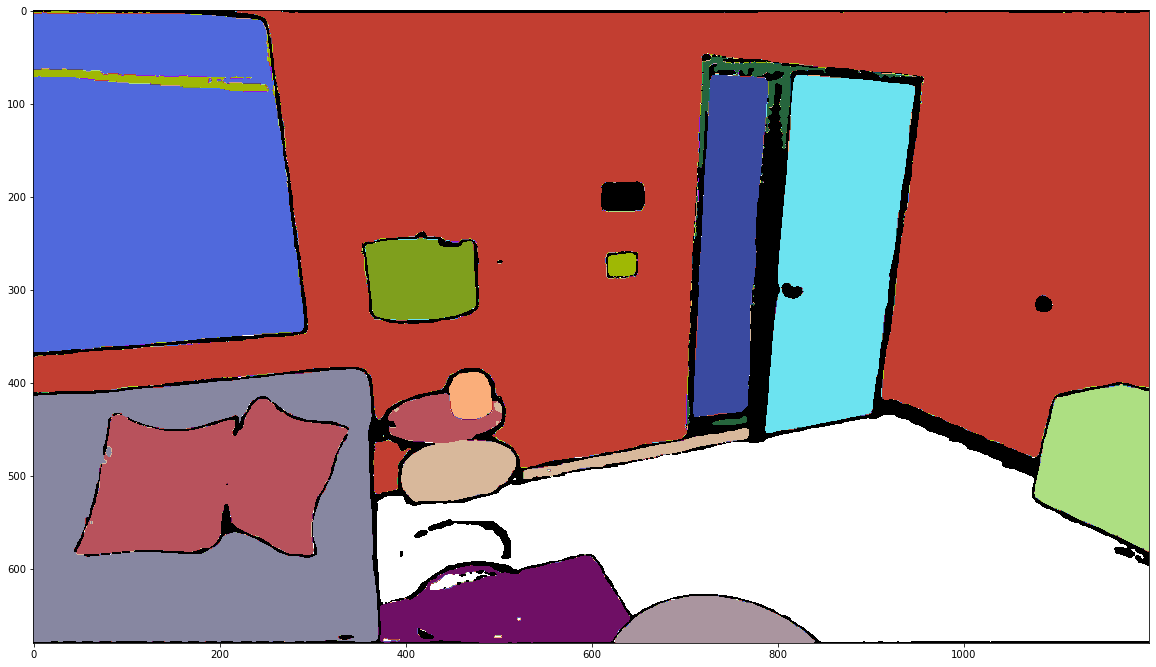

ith Frame 520


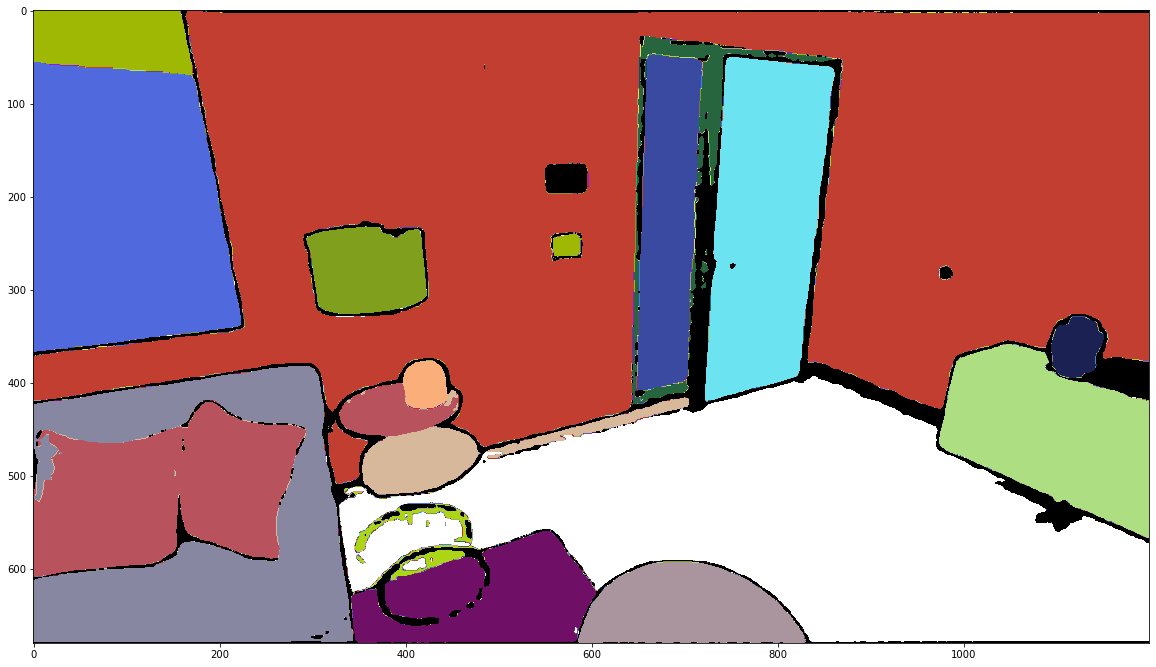

ith Frame 510


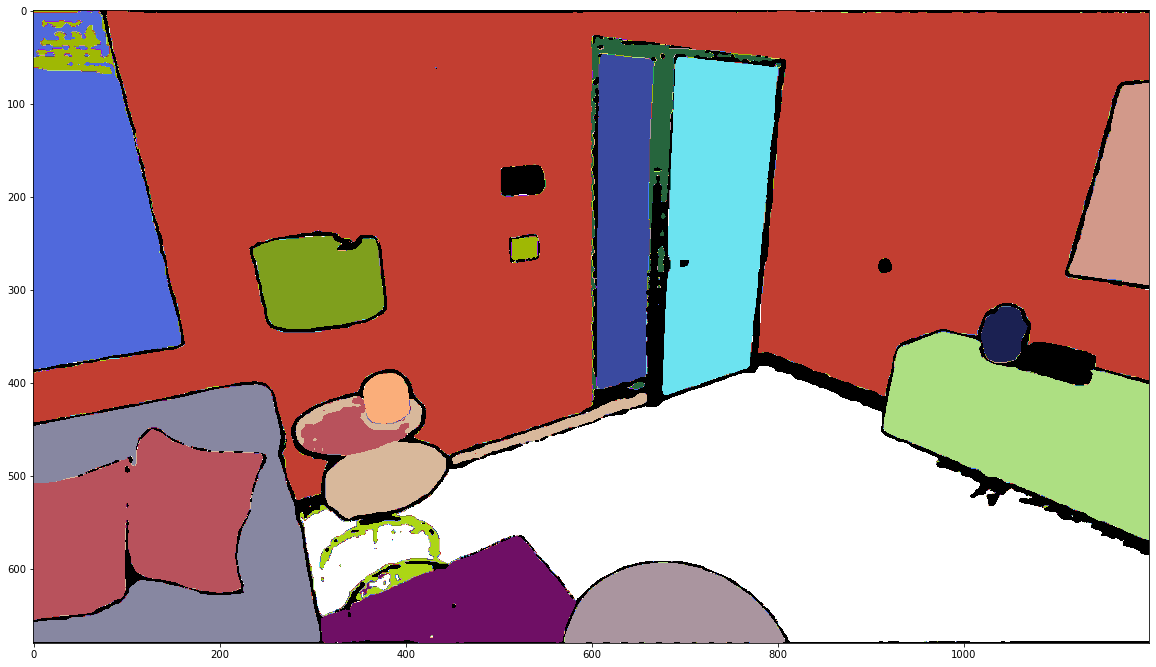

ith Frame 500


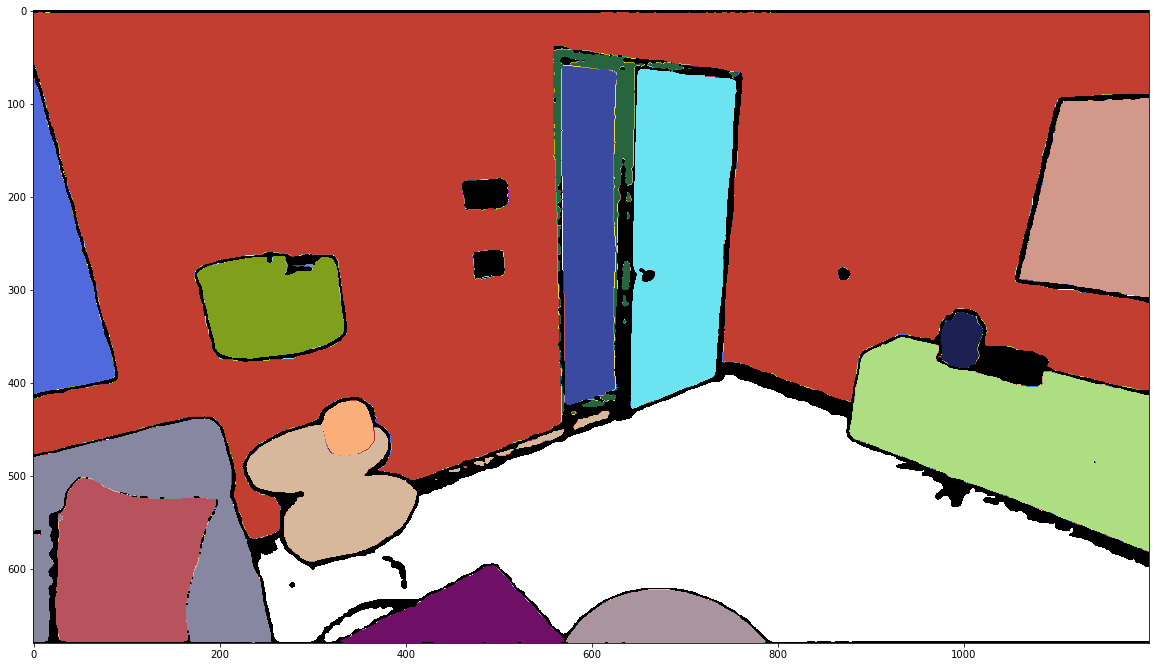

ith Frame 490


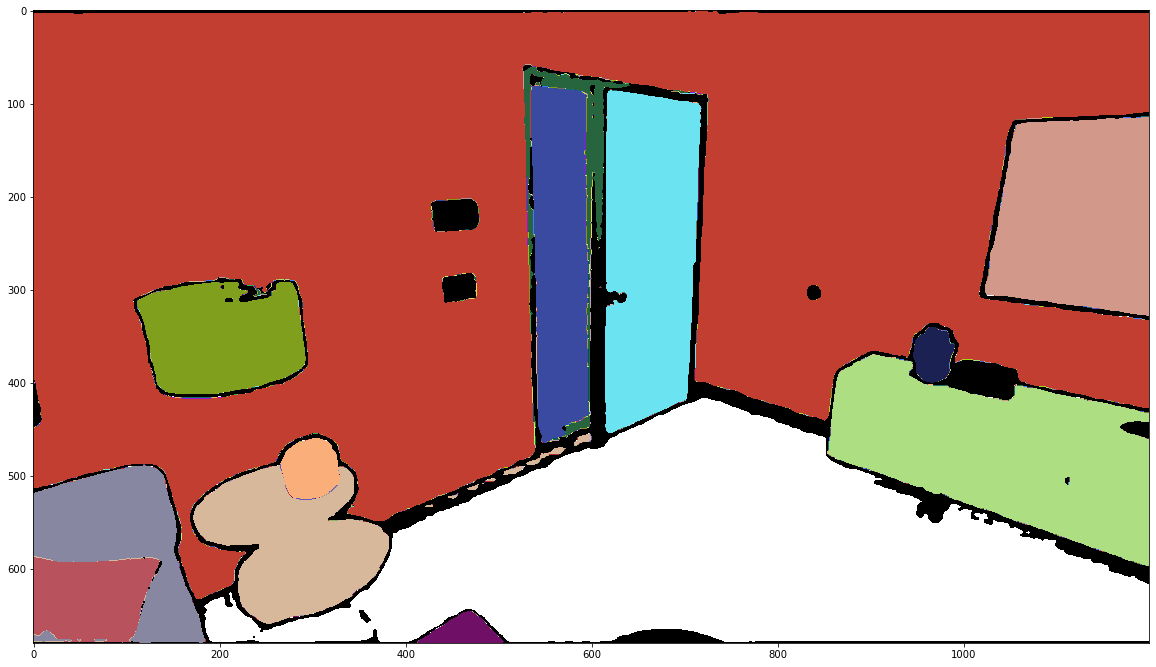

ith Frame 480


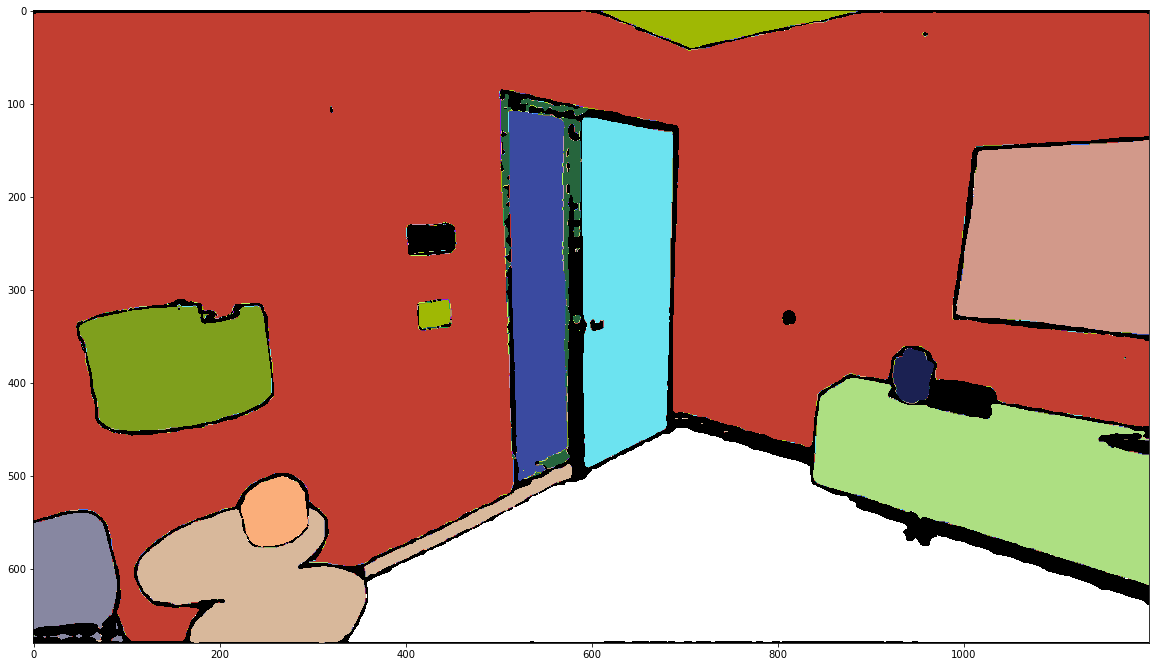

ith Frame 470


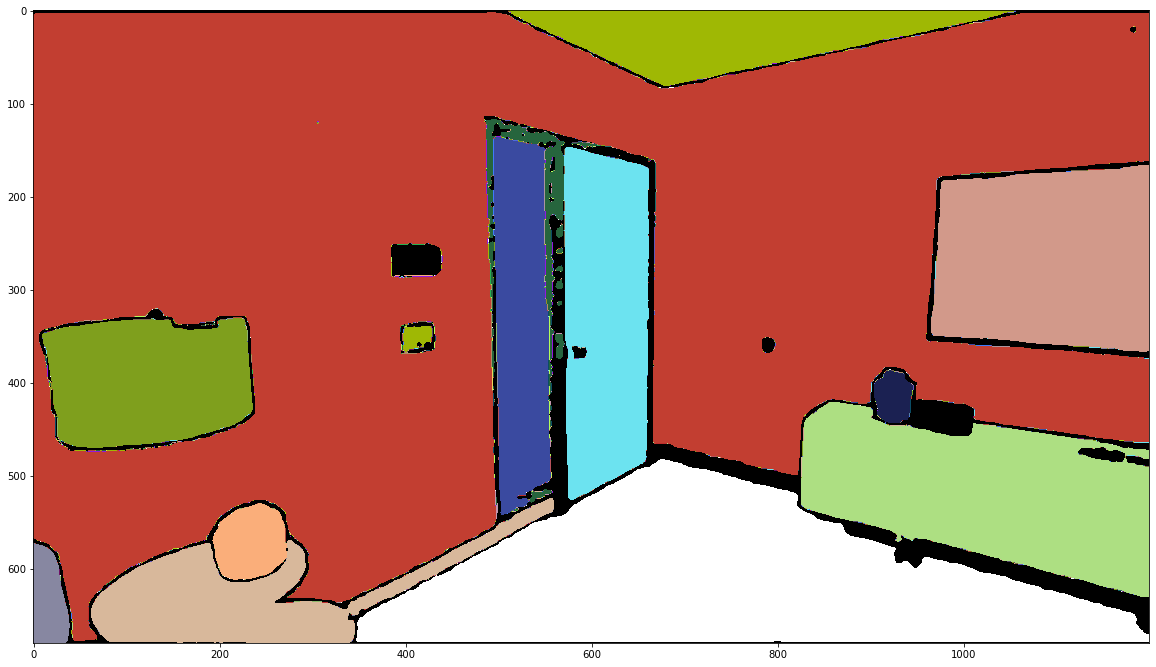

ith Frame 460


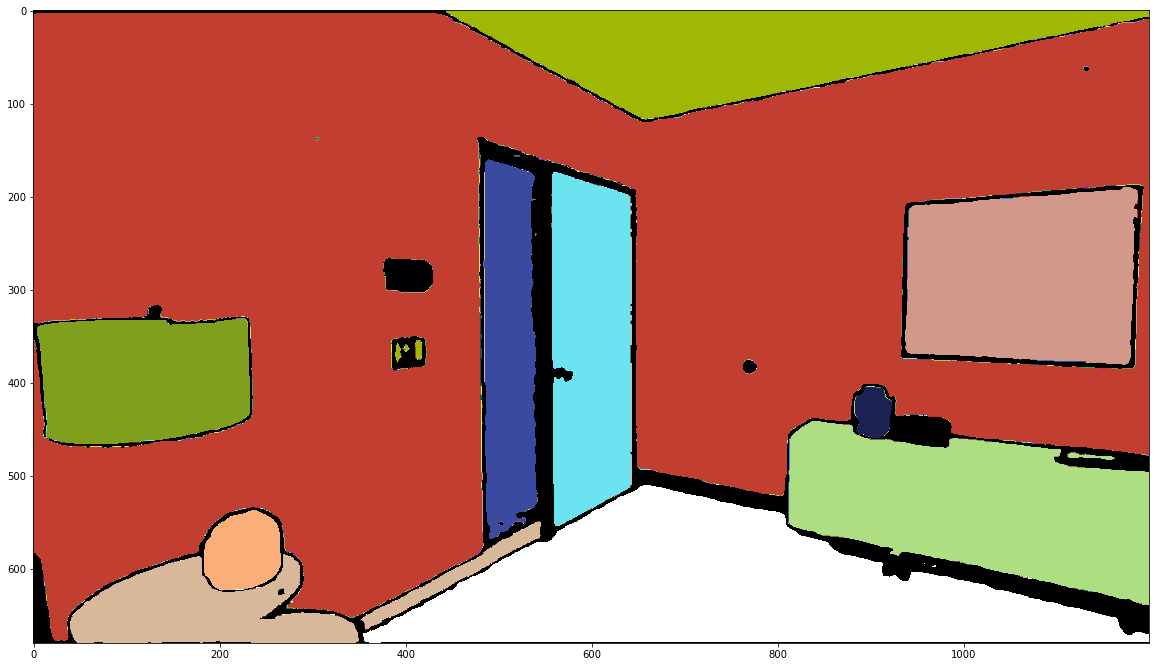

ith Frame 450


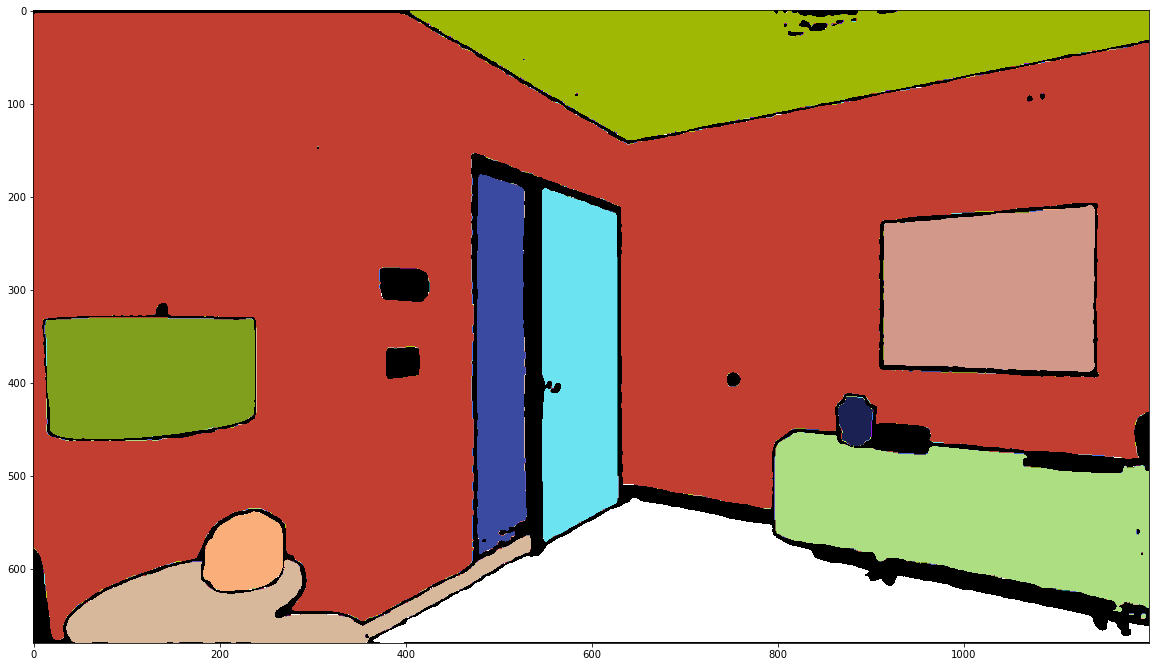

ith Frame 440


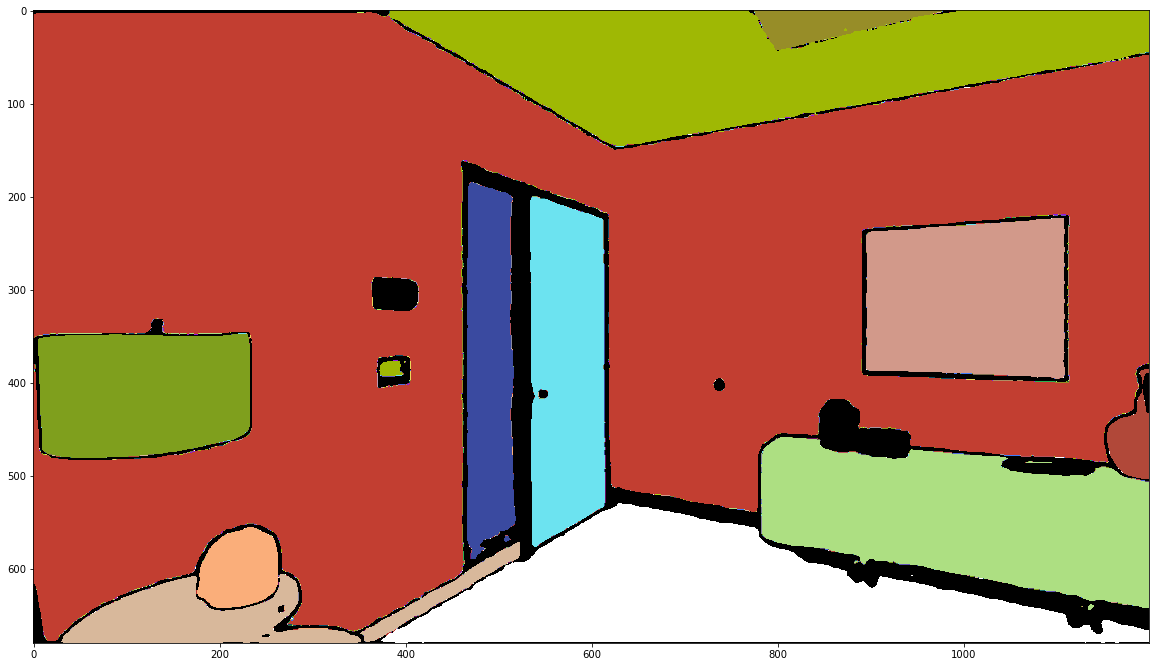

ith Frame 430


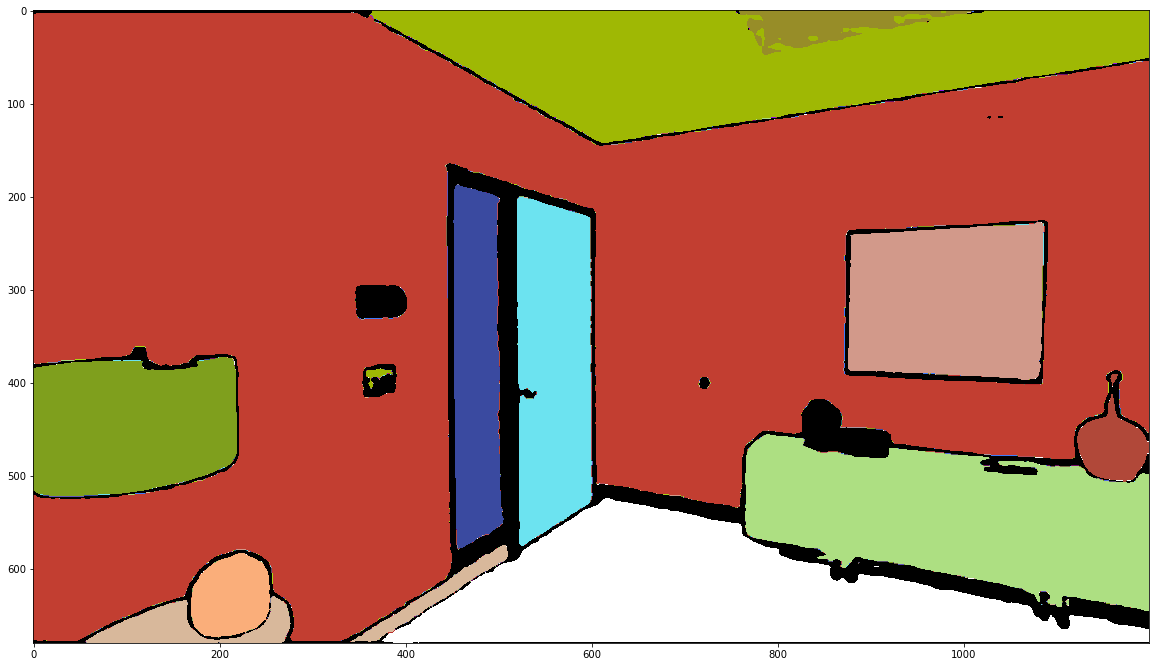

ith Frame 420


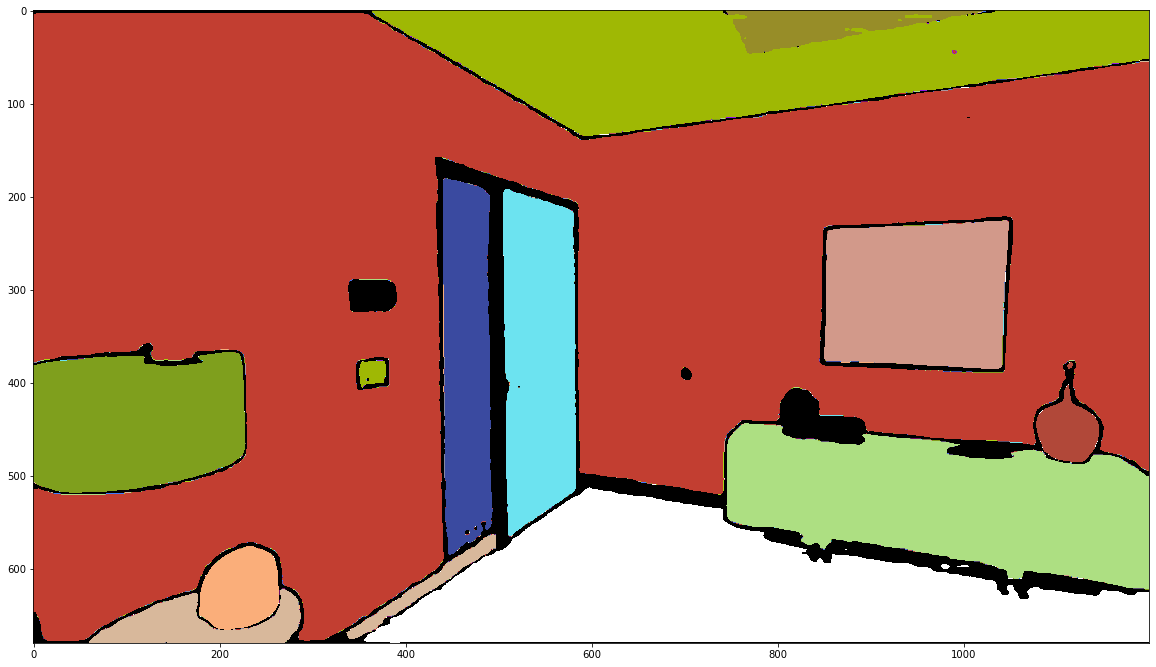

ith Frame 410


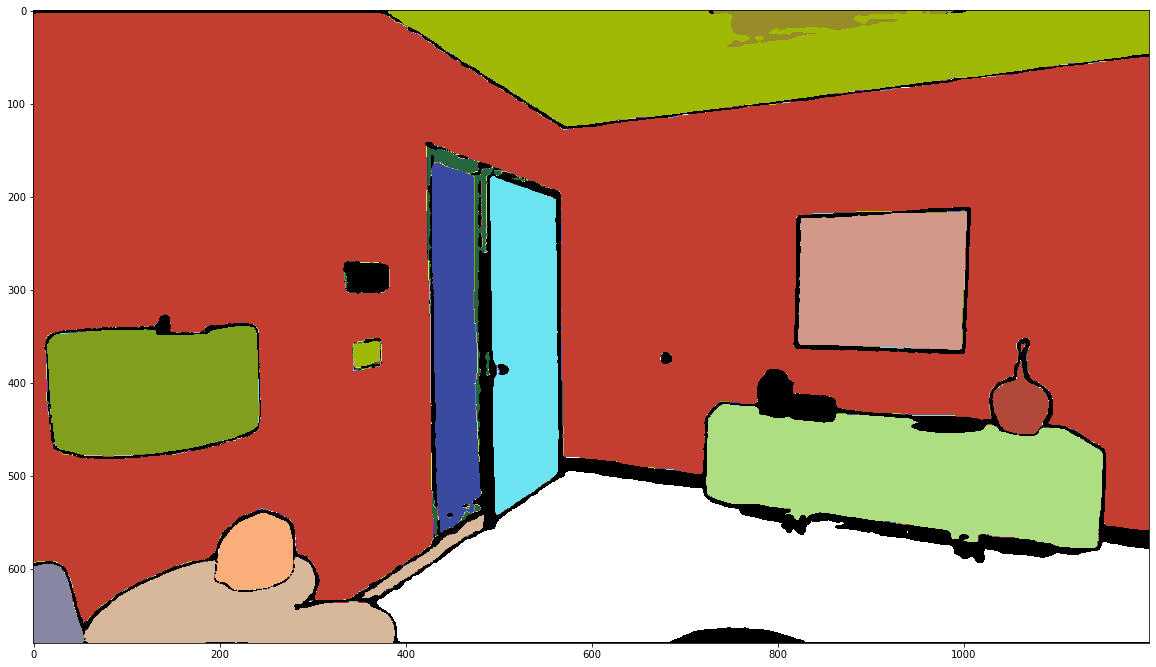

ith Frame 400


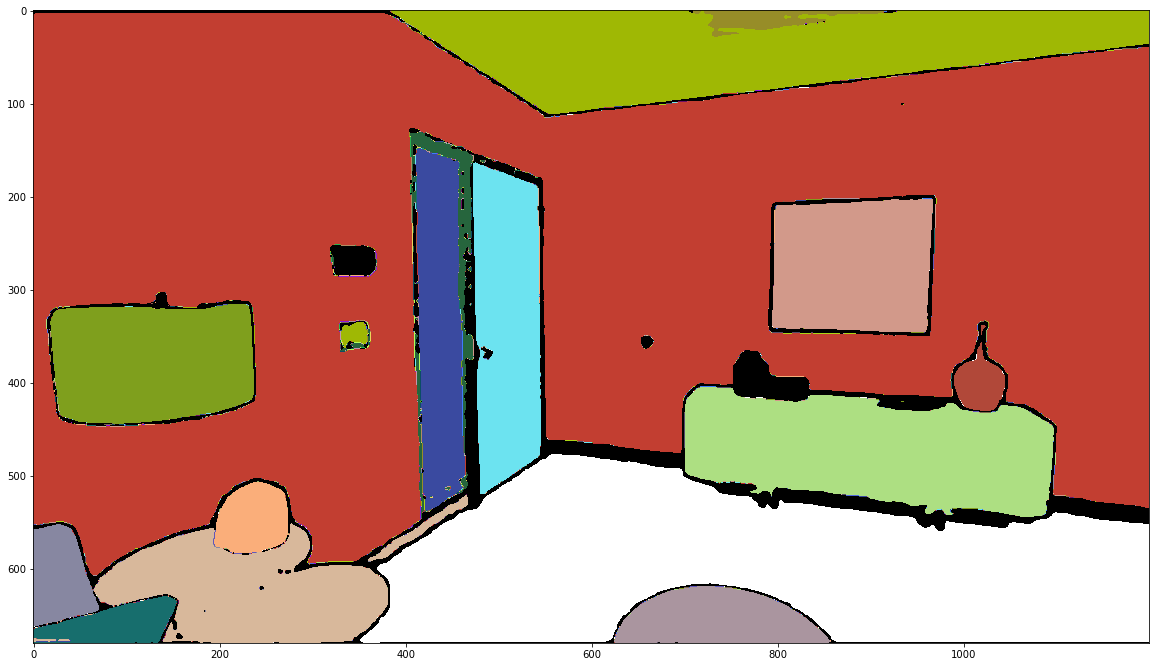

ith Frame 390


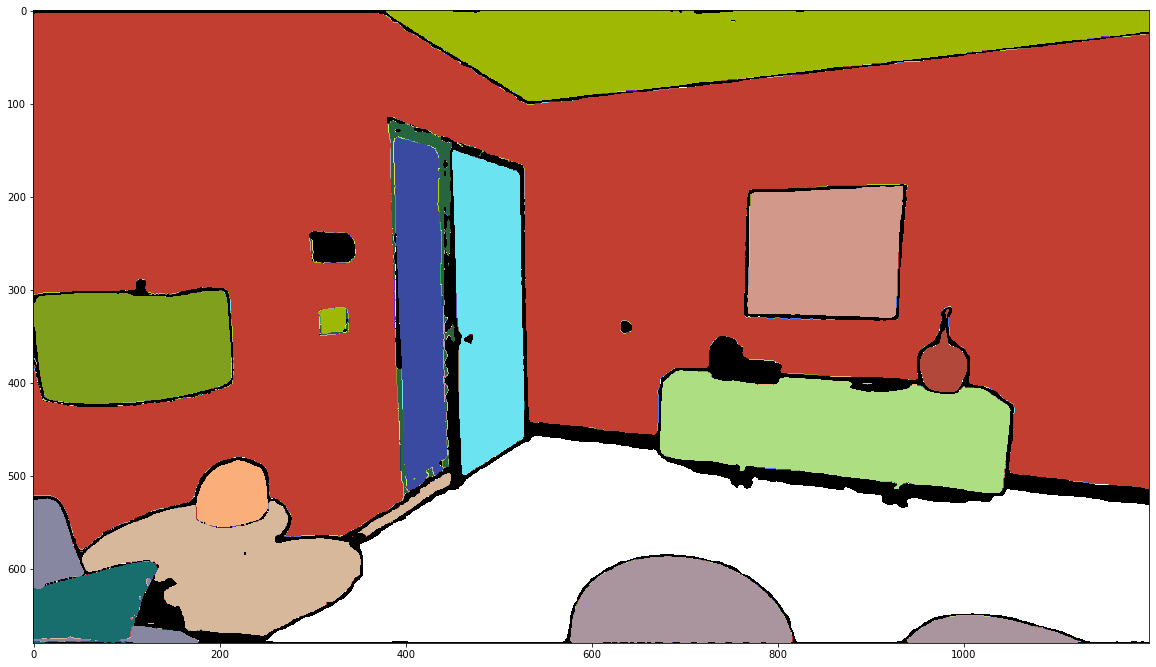

ith Frame 380


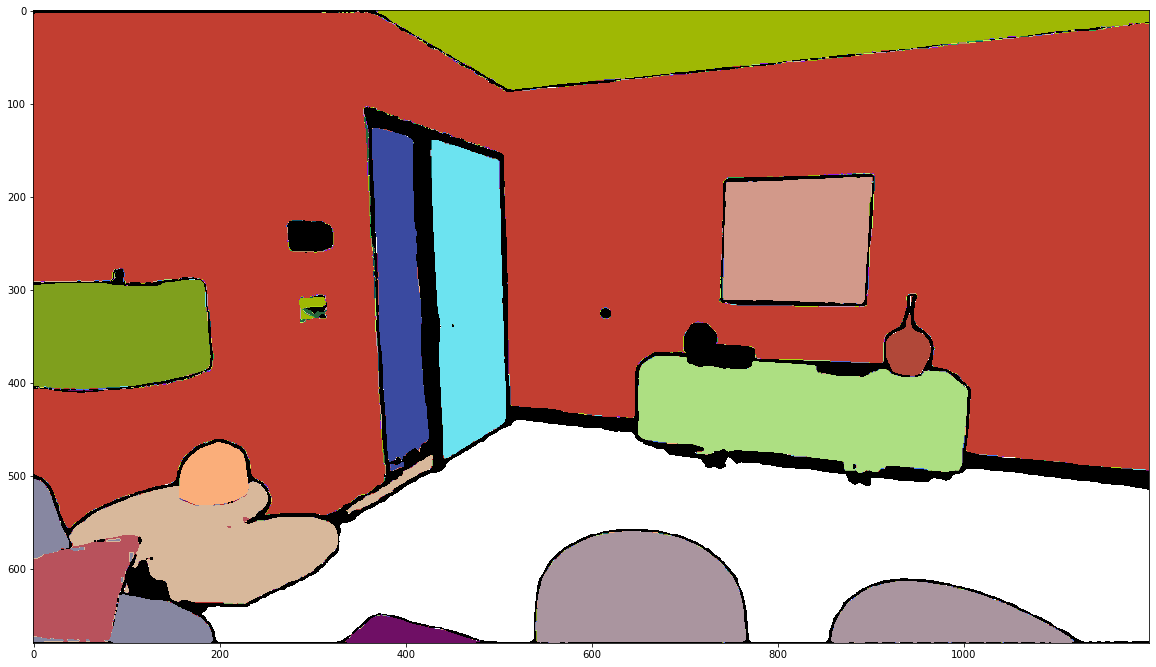

ith Frame 370


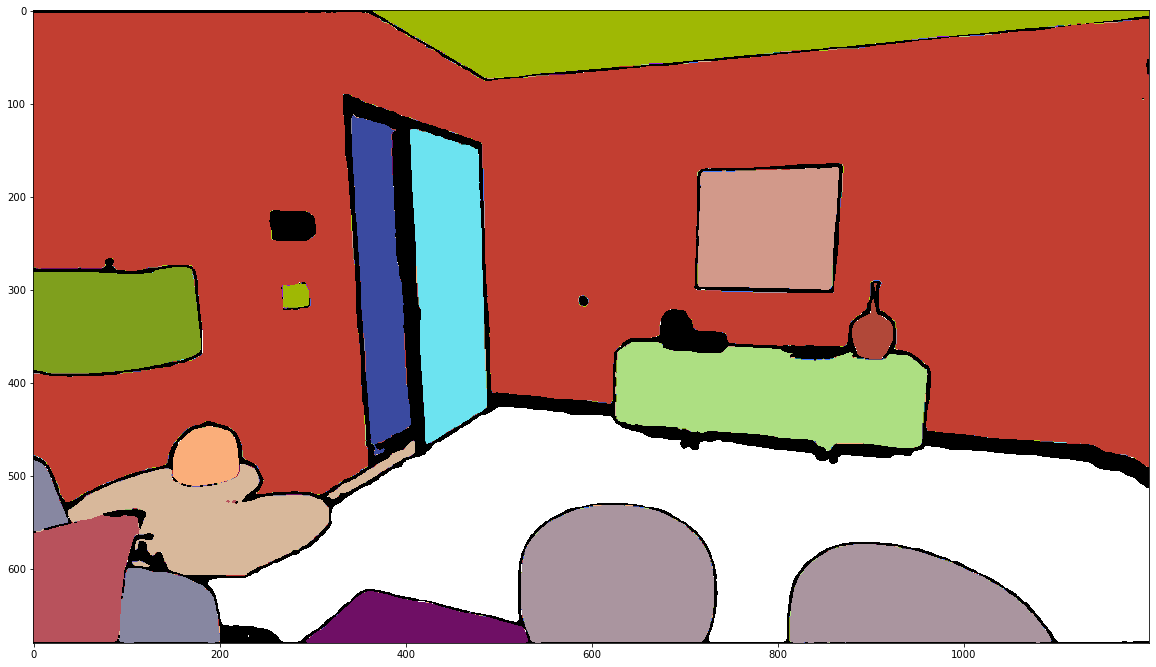

ith Frame 360


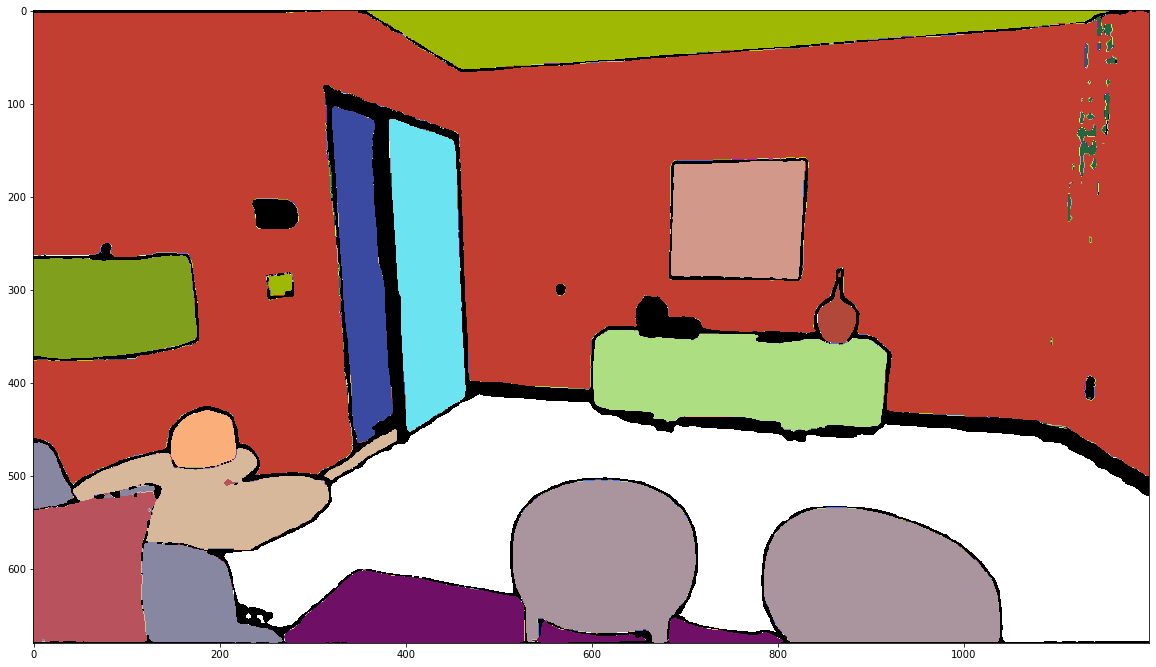

ith Frame 350


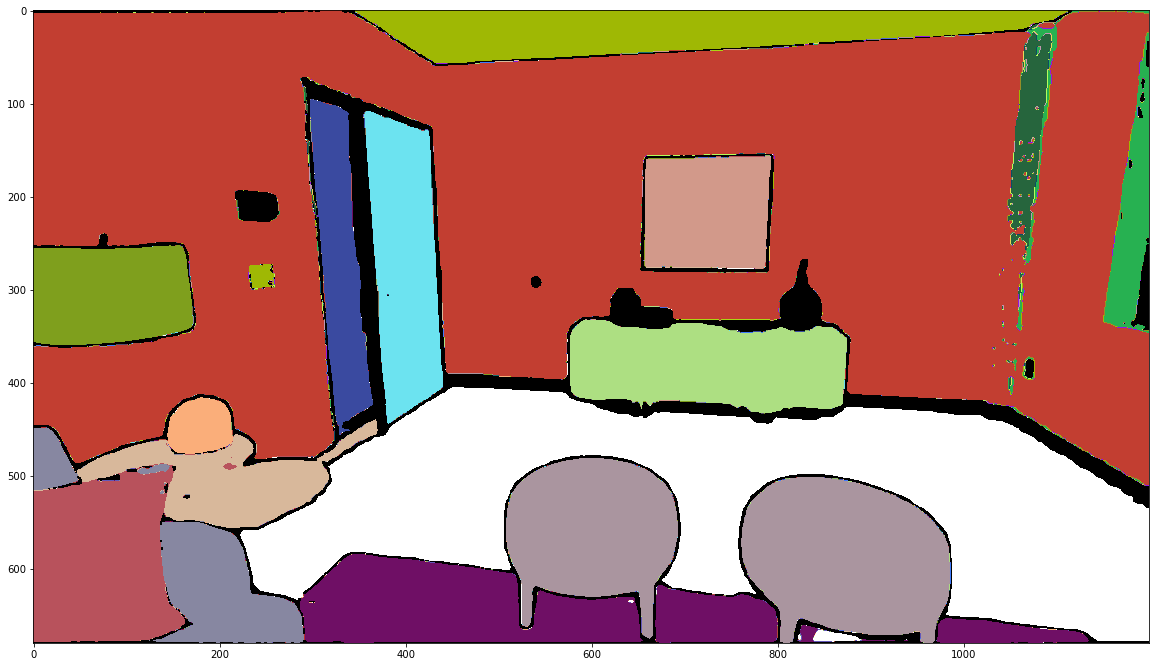

ith Frame 340


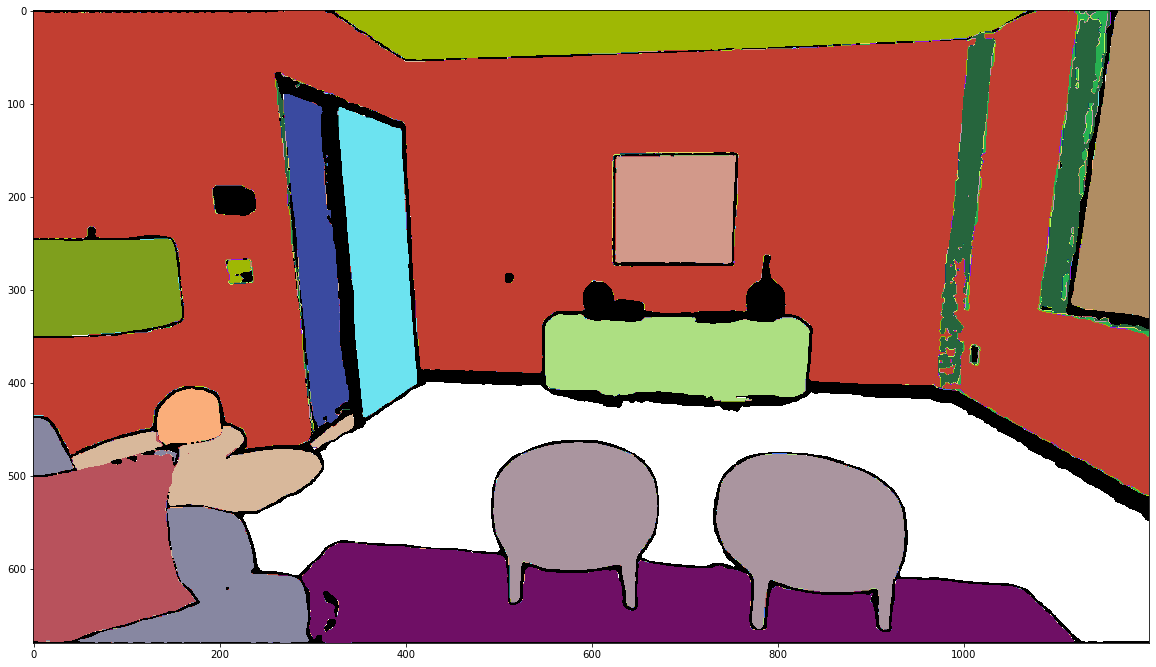

ith Frame 330


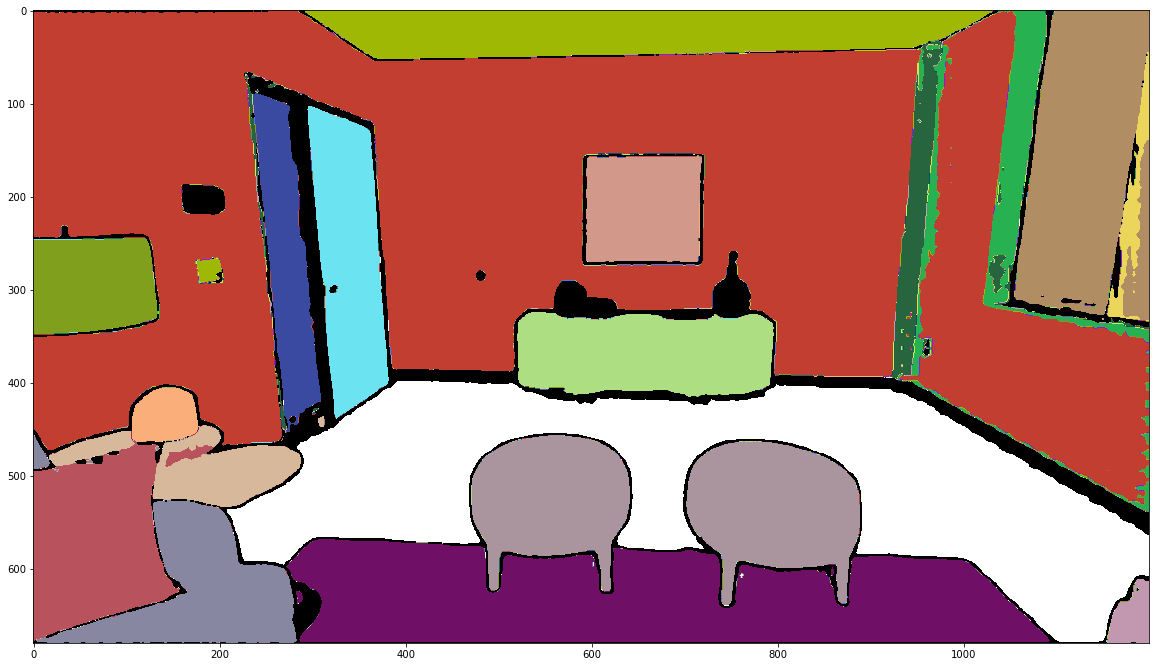

ith Frame 320


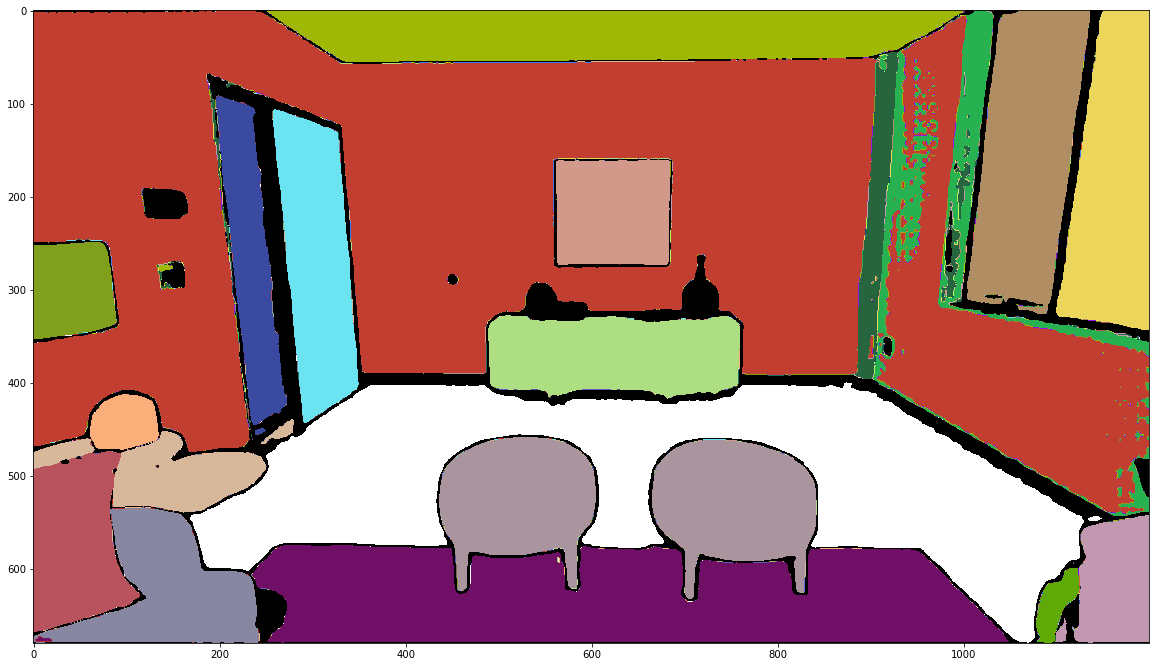

ith Frame 310


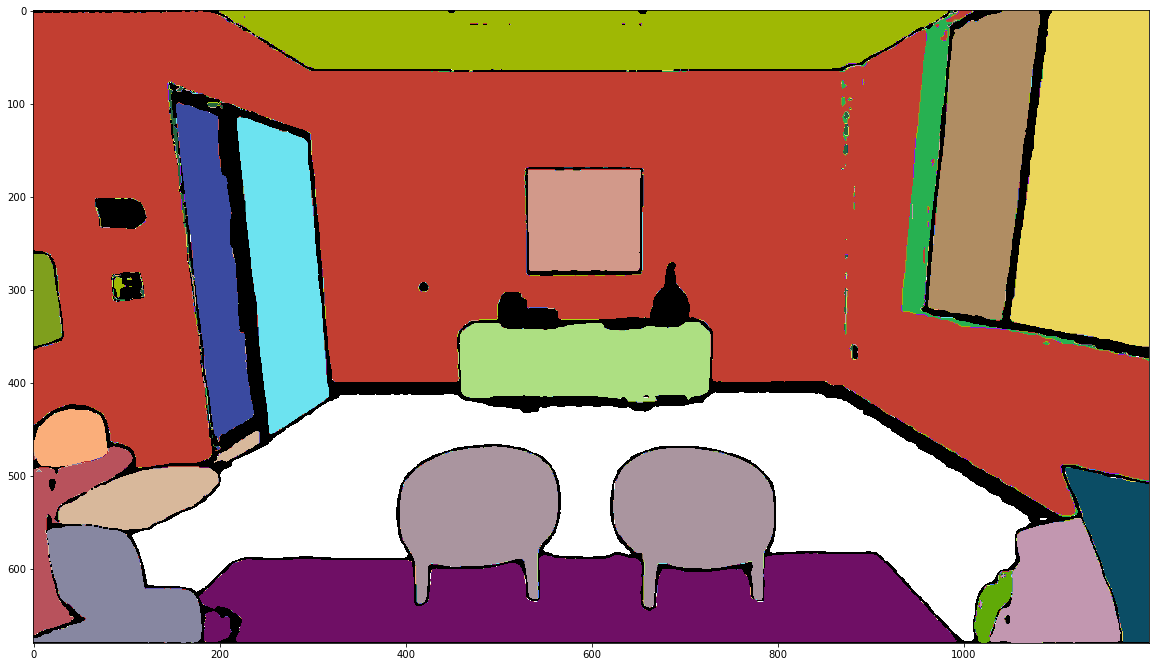

ith Frame 300


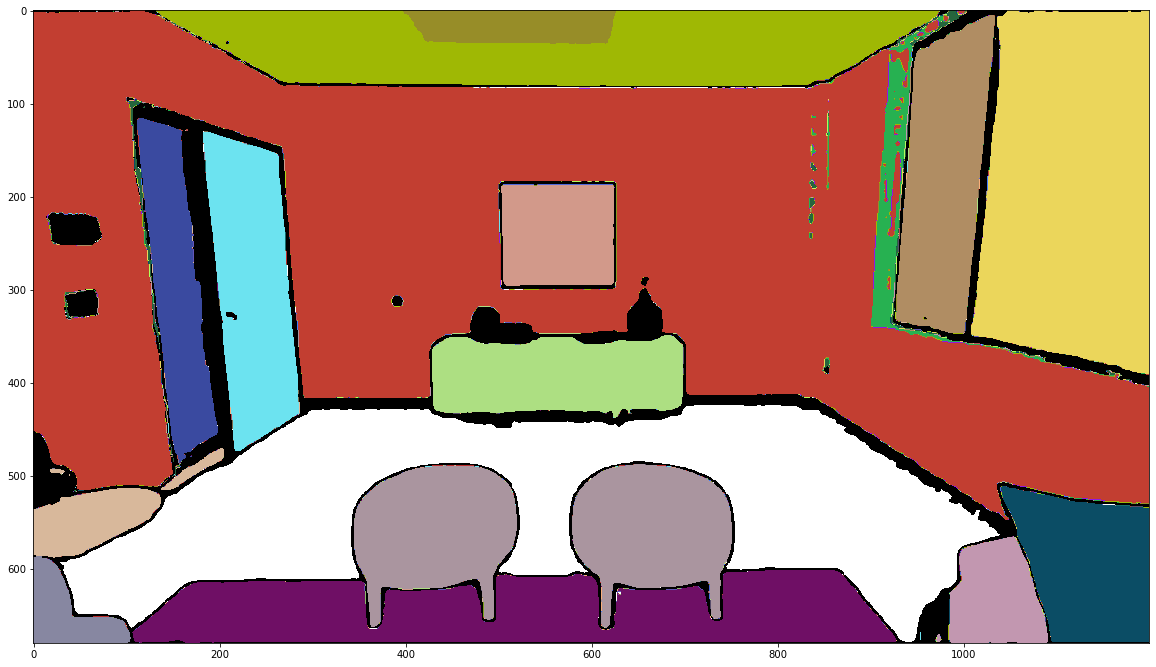

ith Frame 290


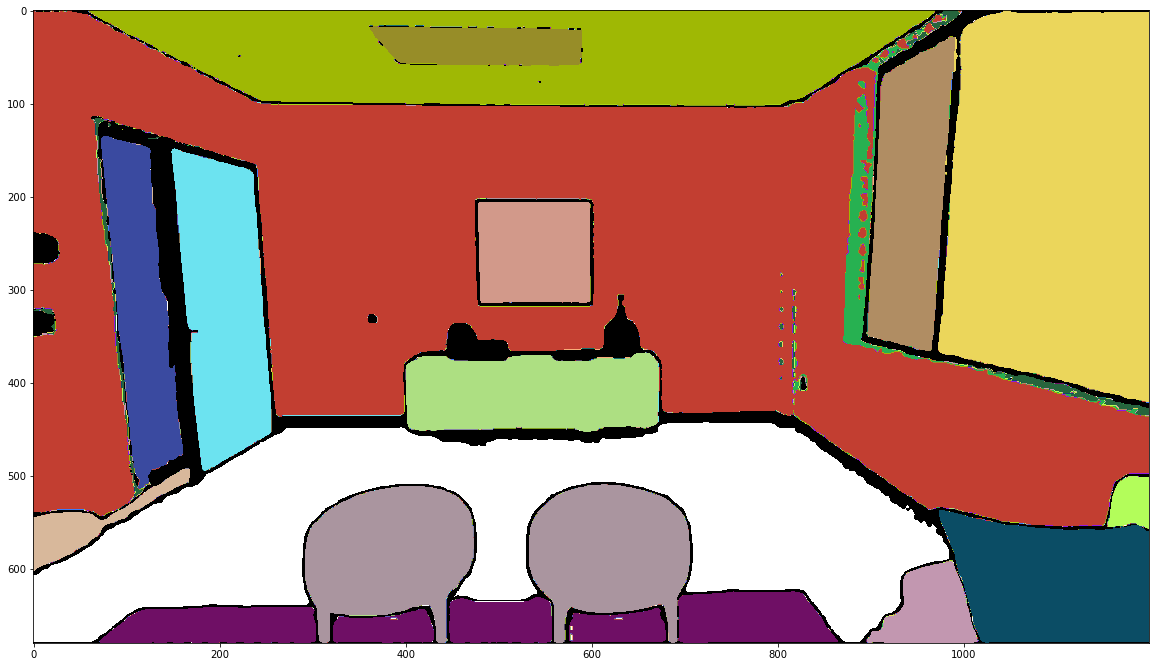

ith Frame 280


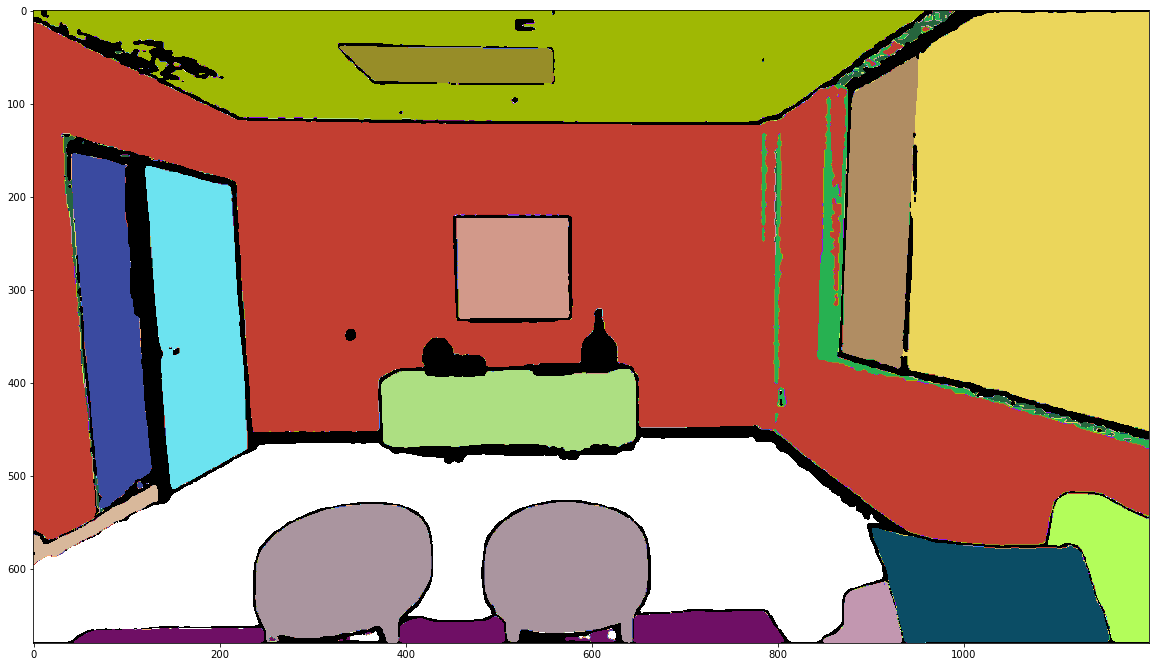

ith Frame 270


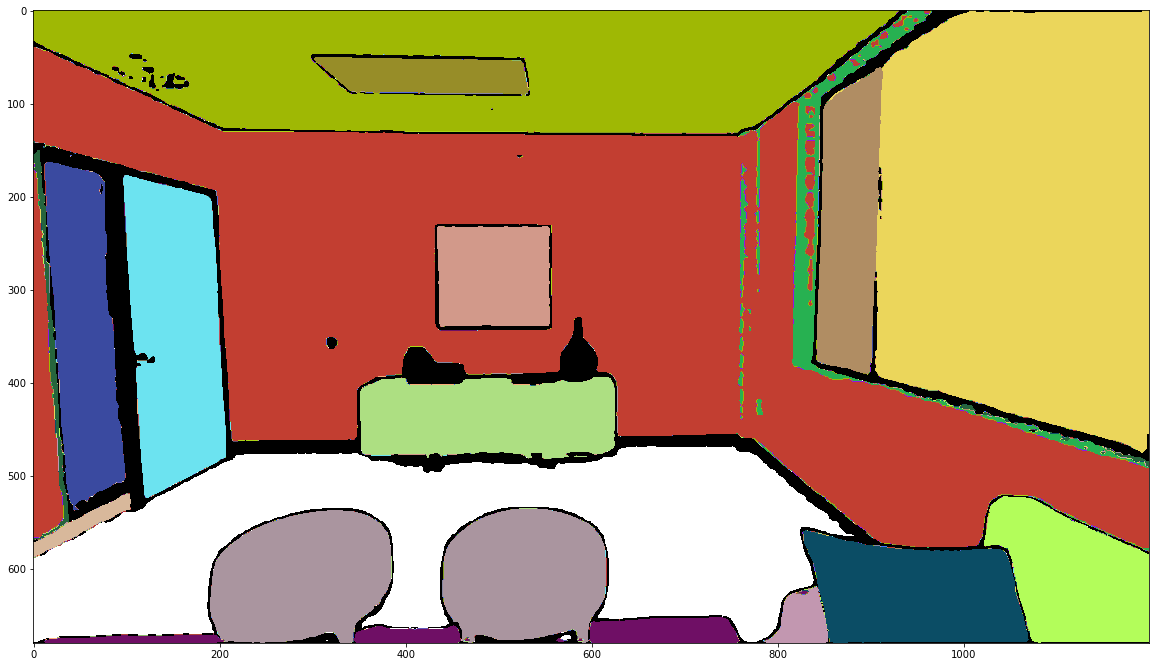

ith Frame 260


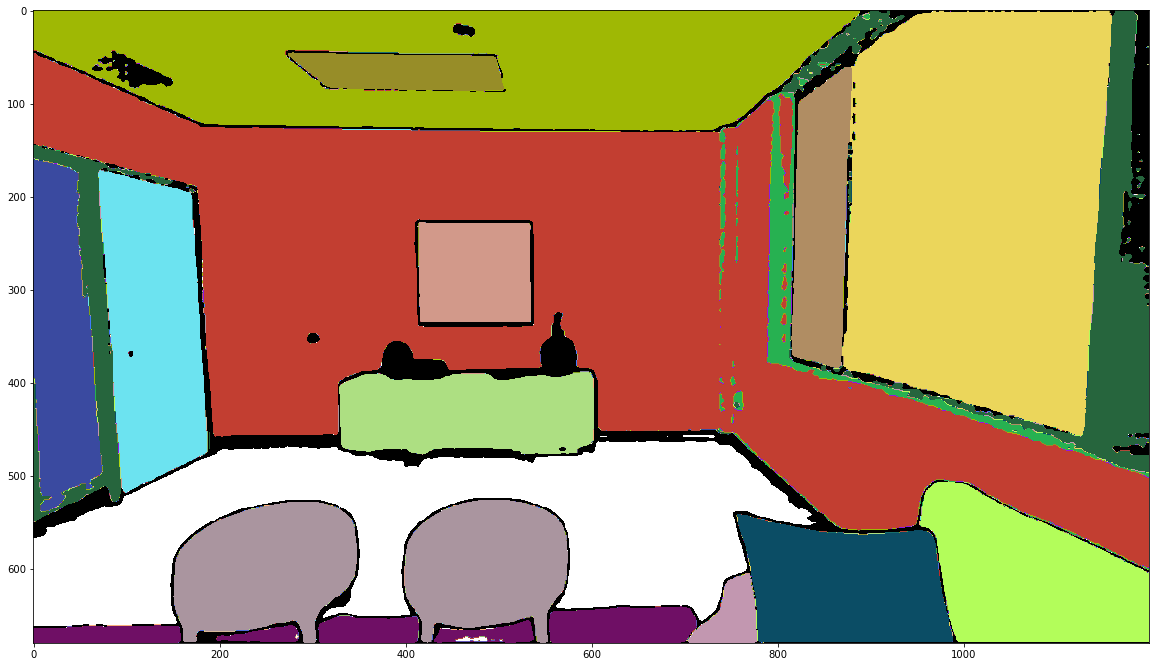

ith Frame 250


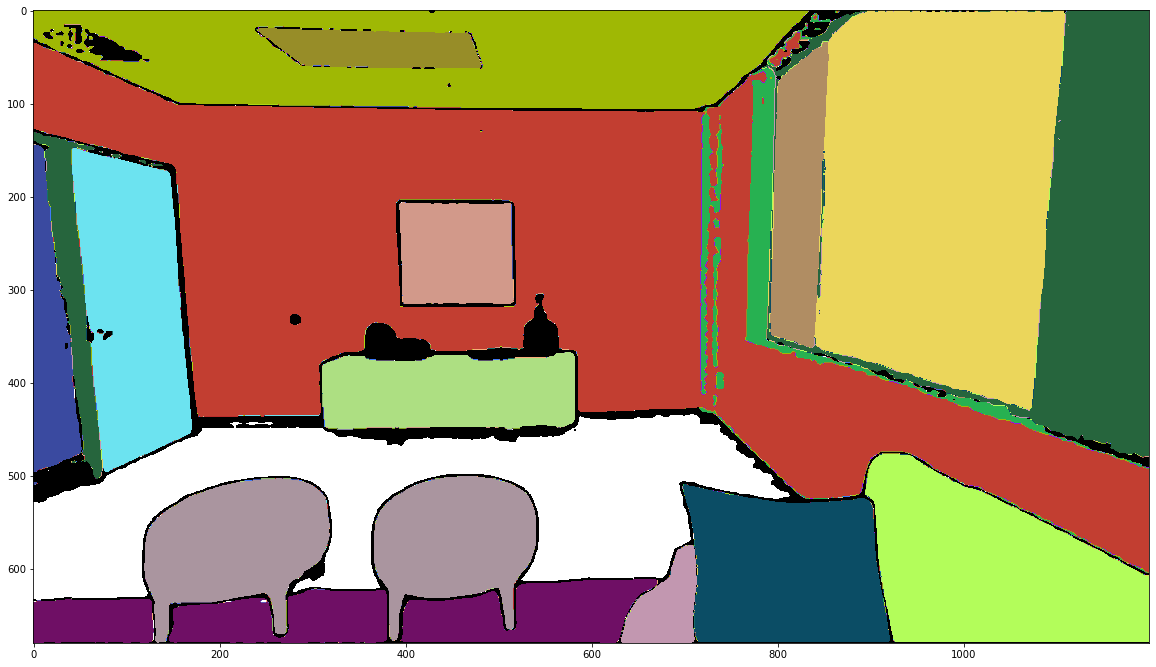

ith Frame 240


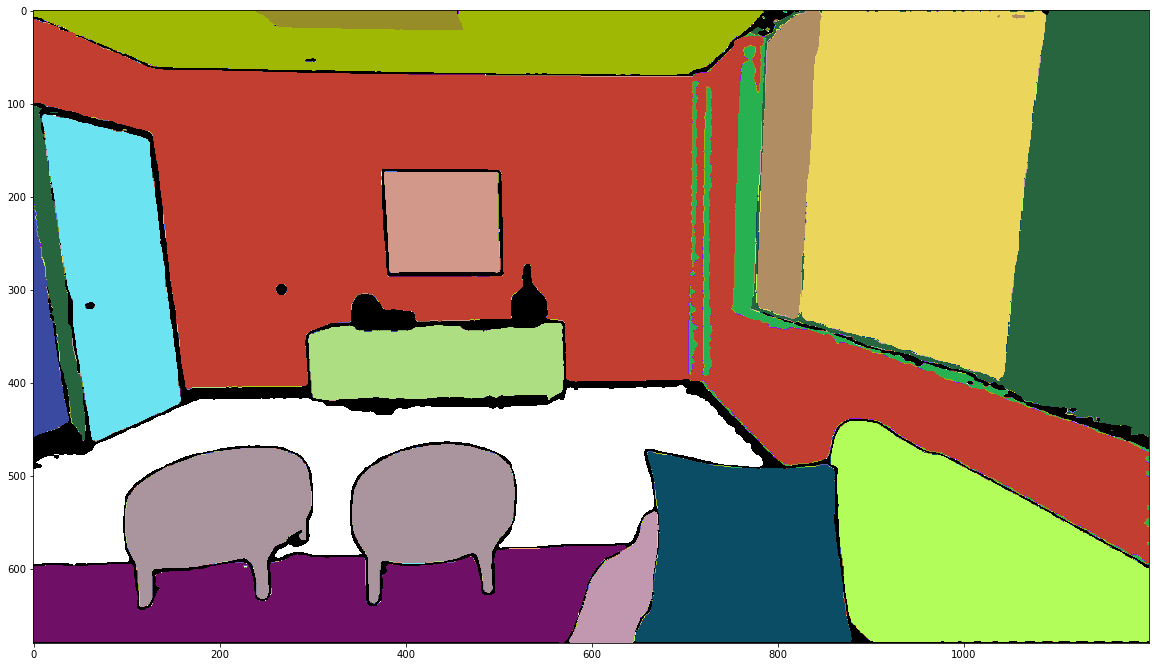

ith Frame 230


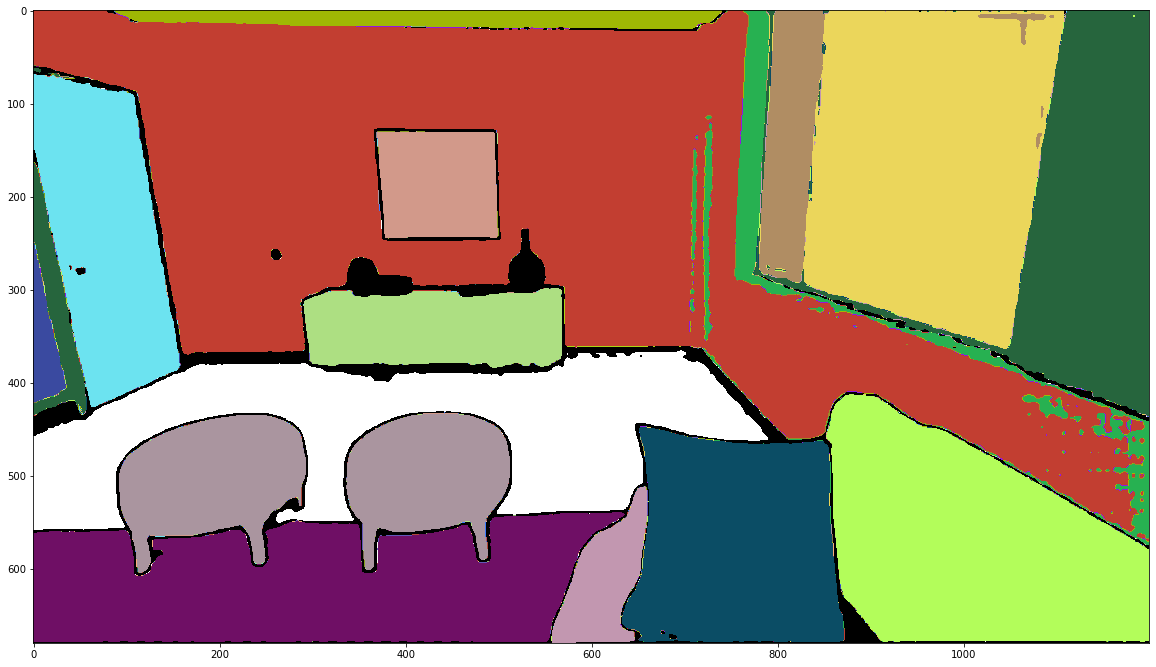

ith Frame 220


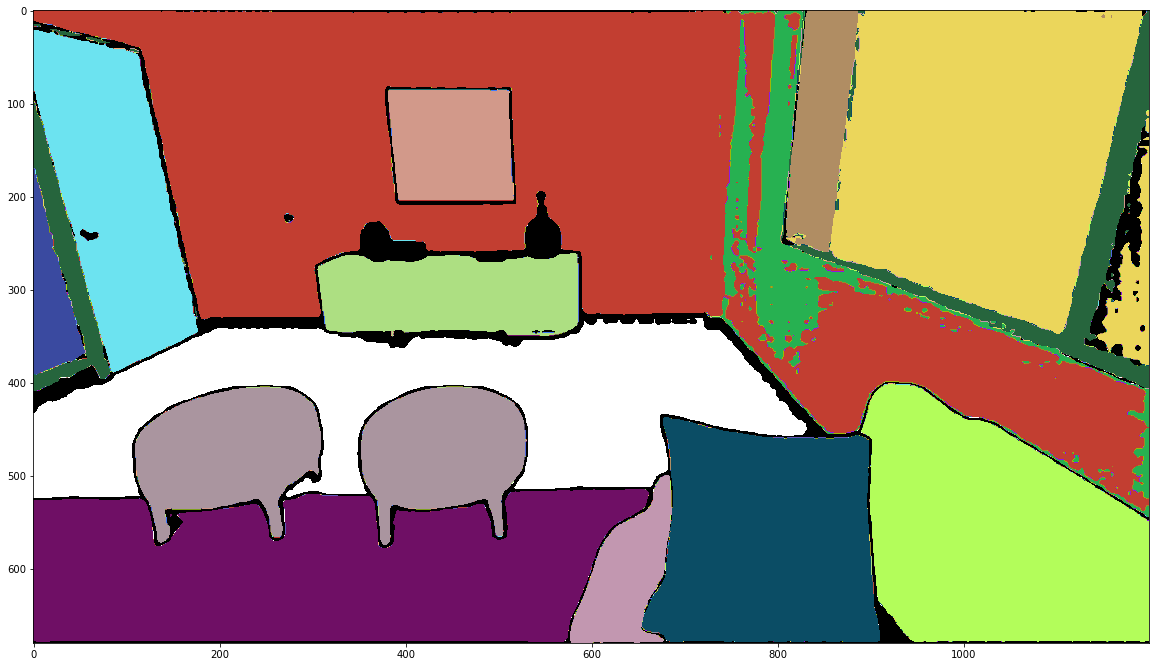

ith Frame 210


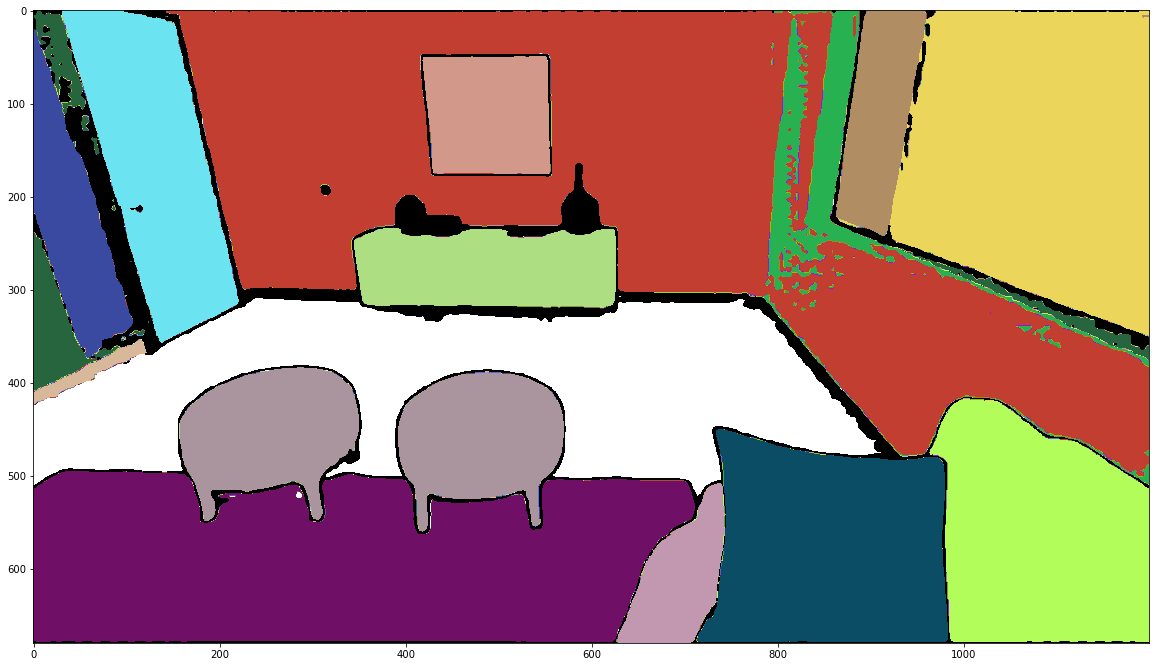

ith Frame 200


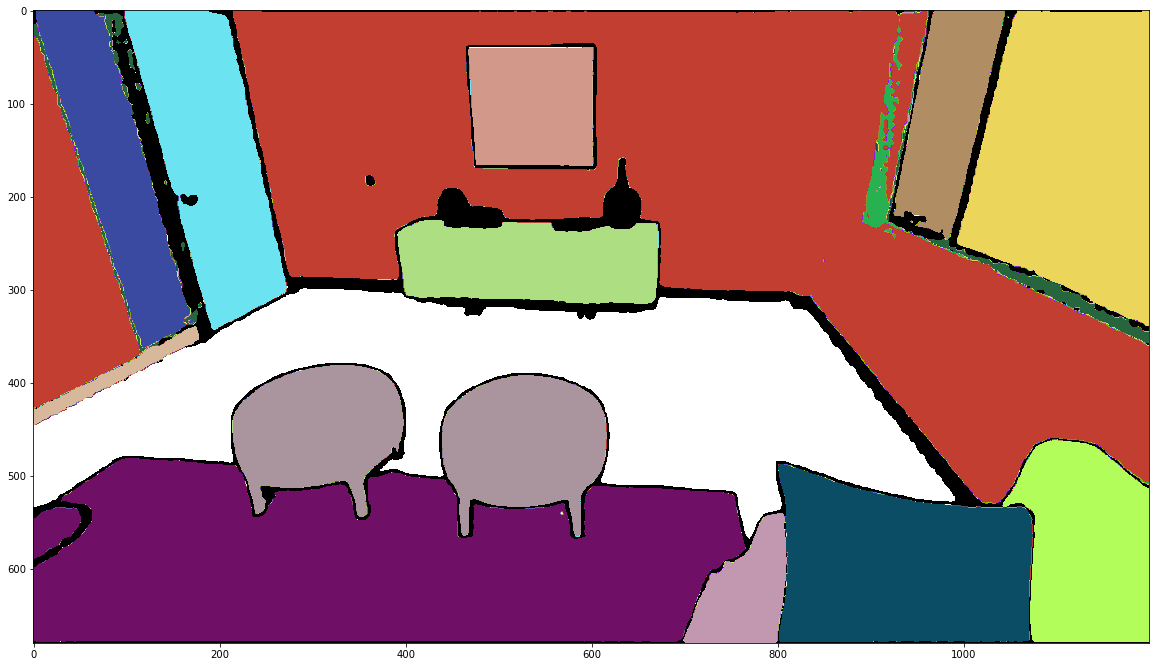

ith Frame 190


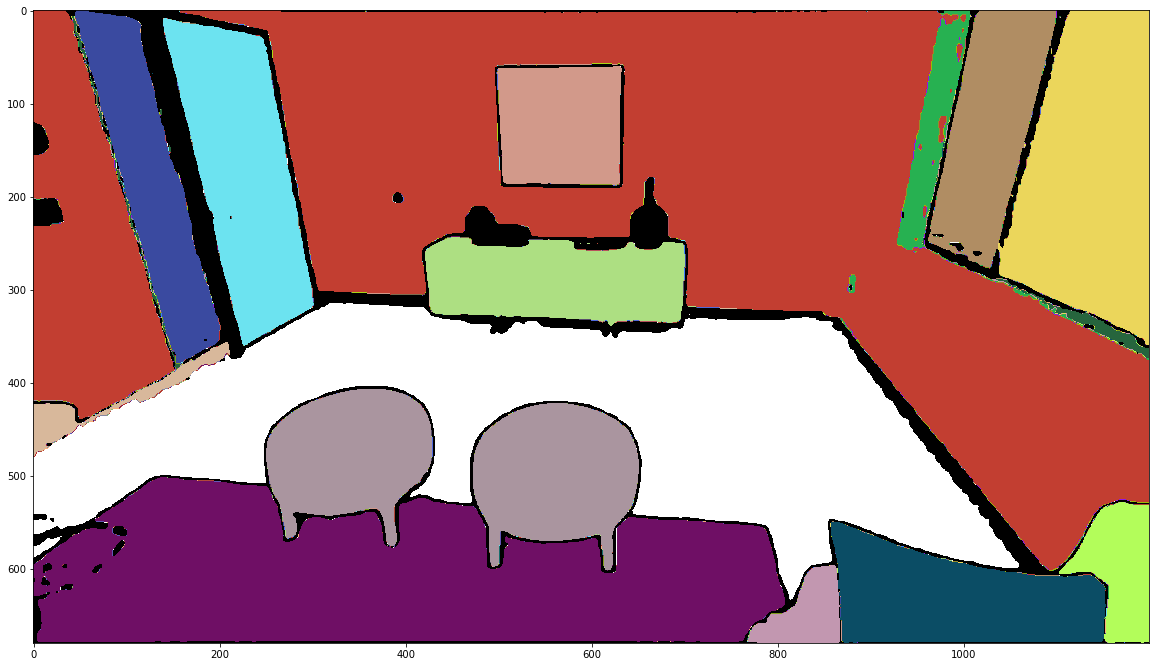

ith Frame 180


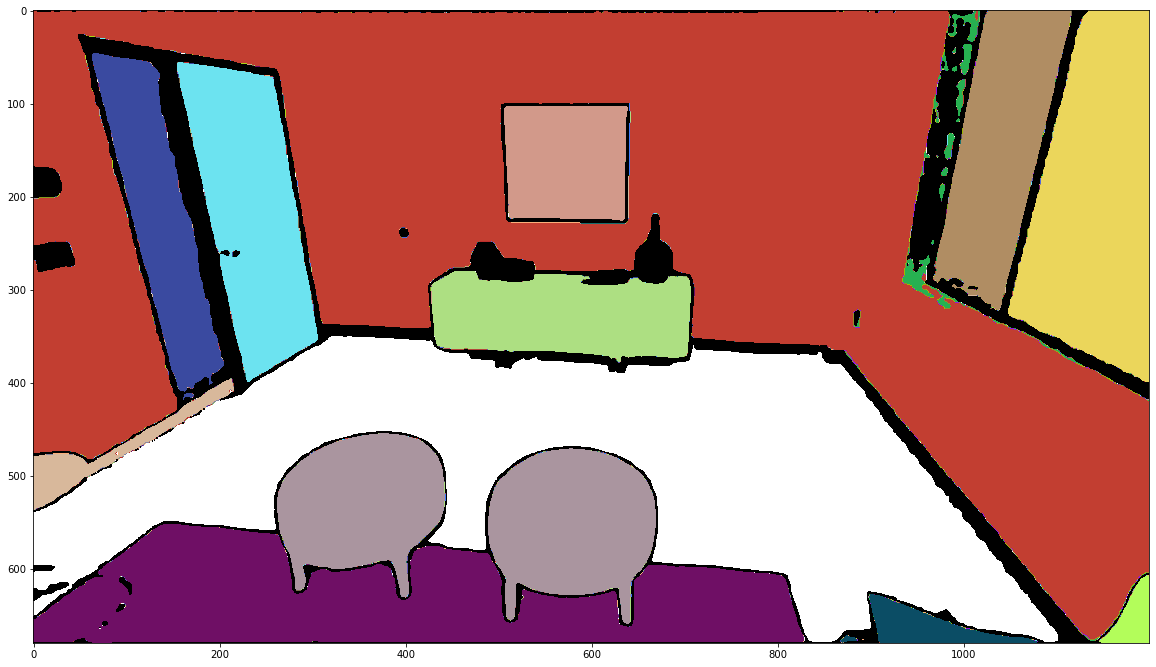

ith Frame 170


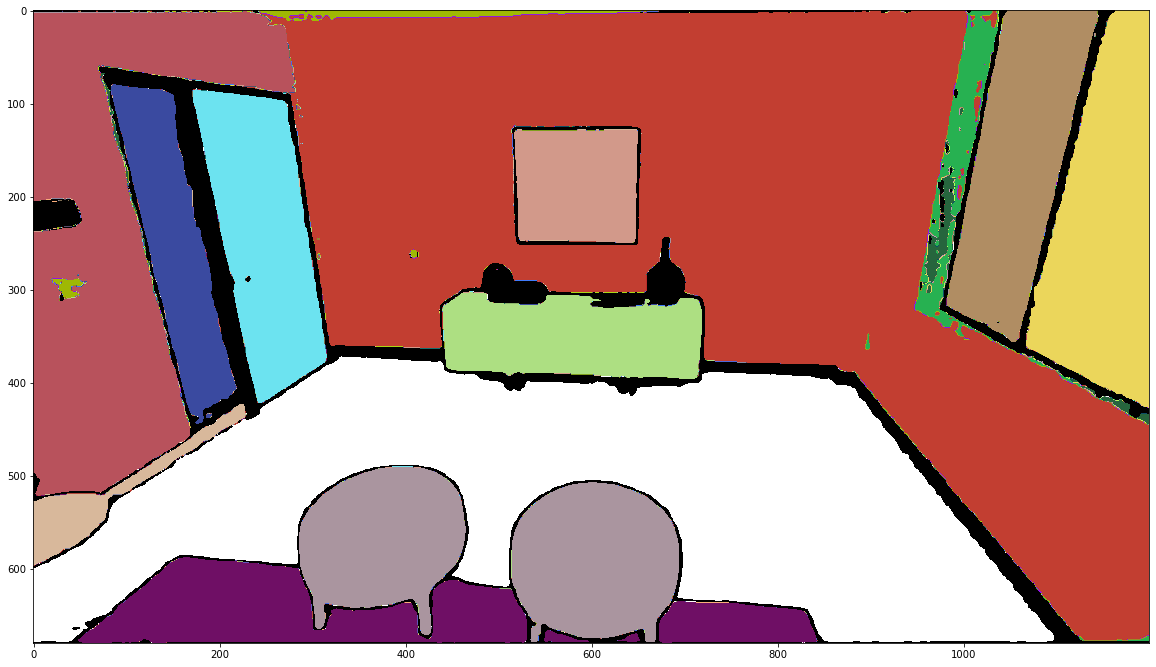

ith Frame 160


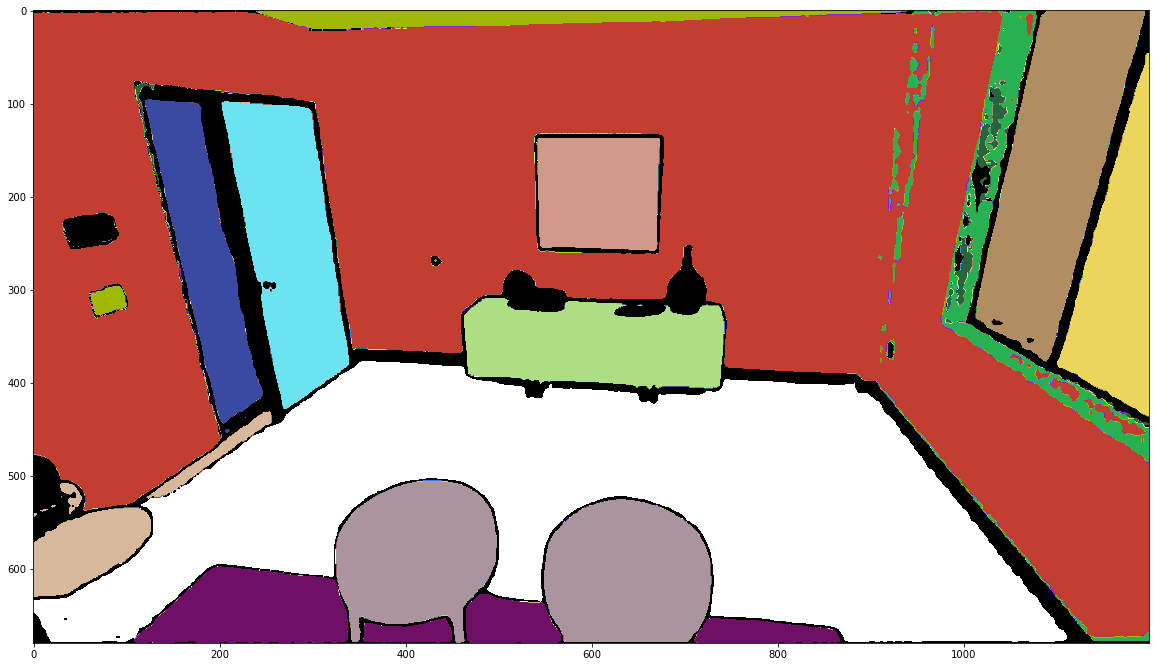

ith Frame 150


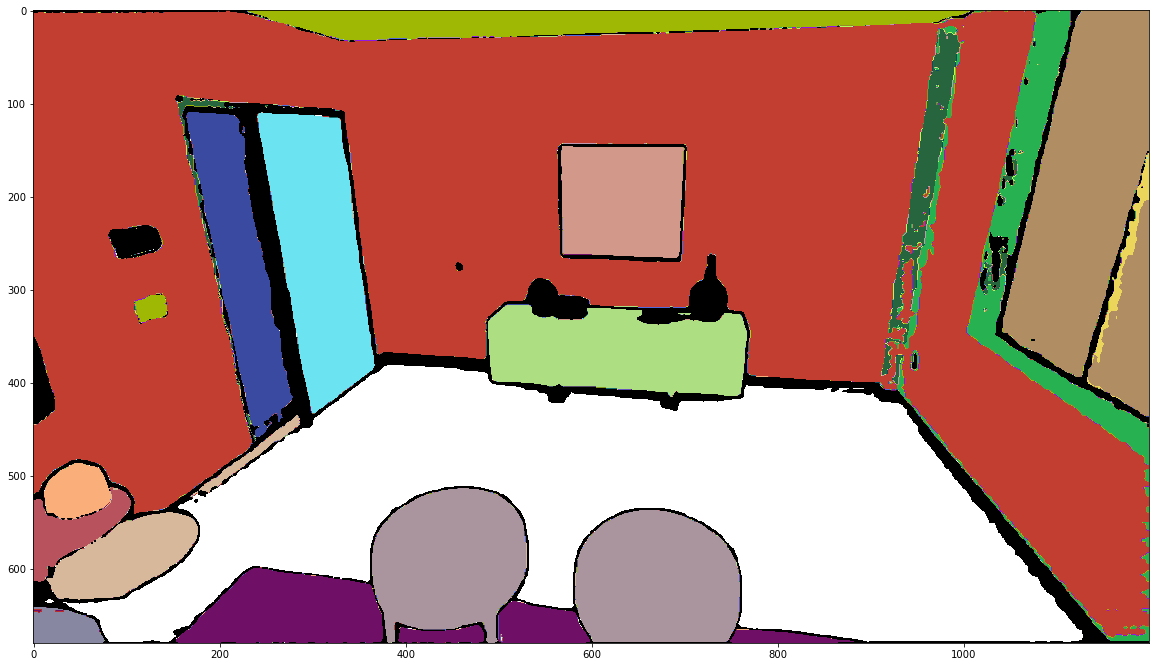

ith Frame 140


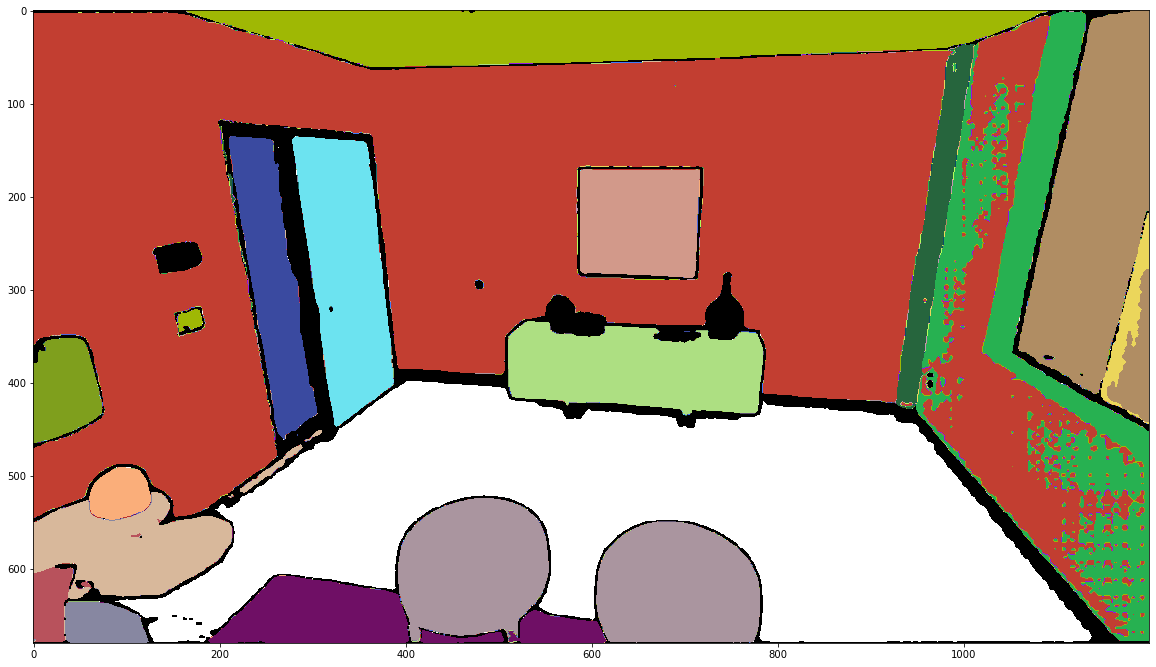

ith Frame 130


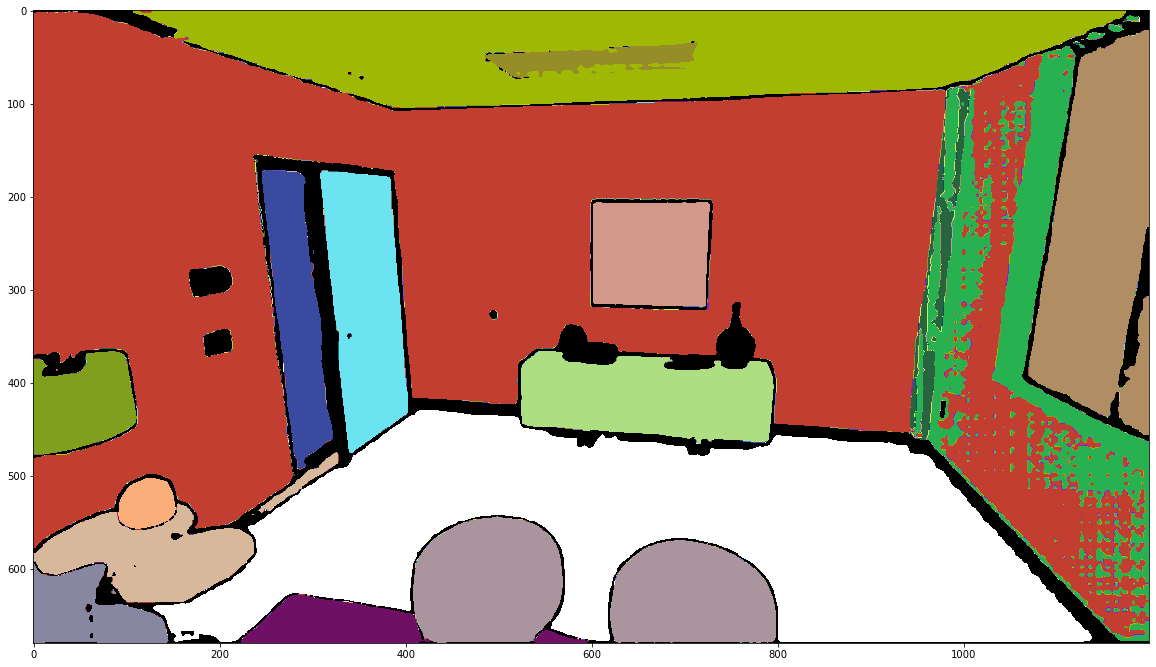

ith Frame 120


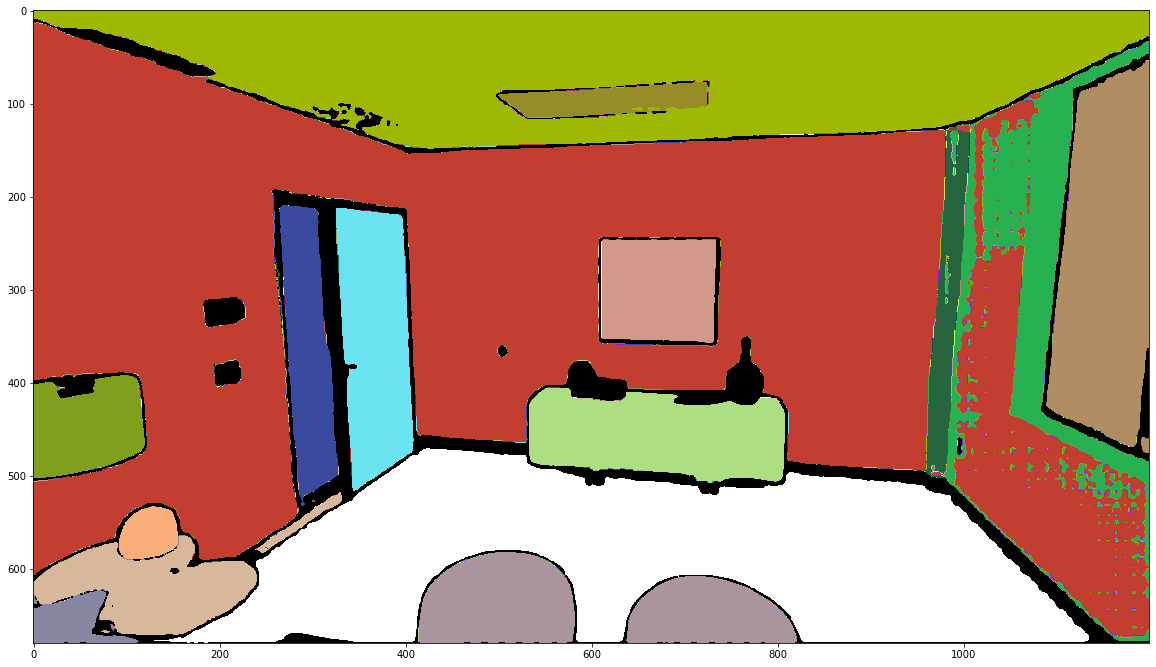

ith Frame 110


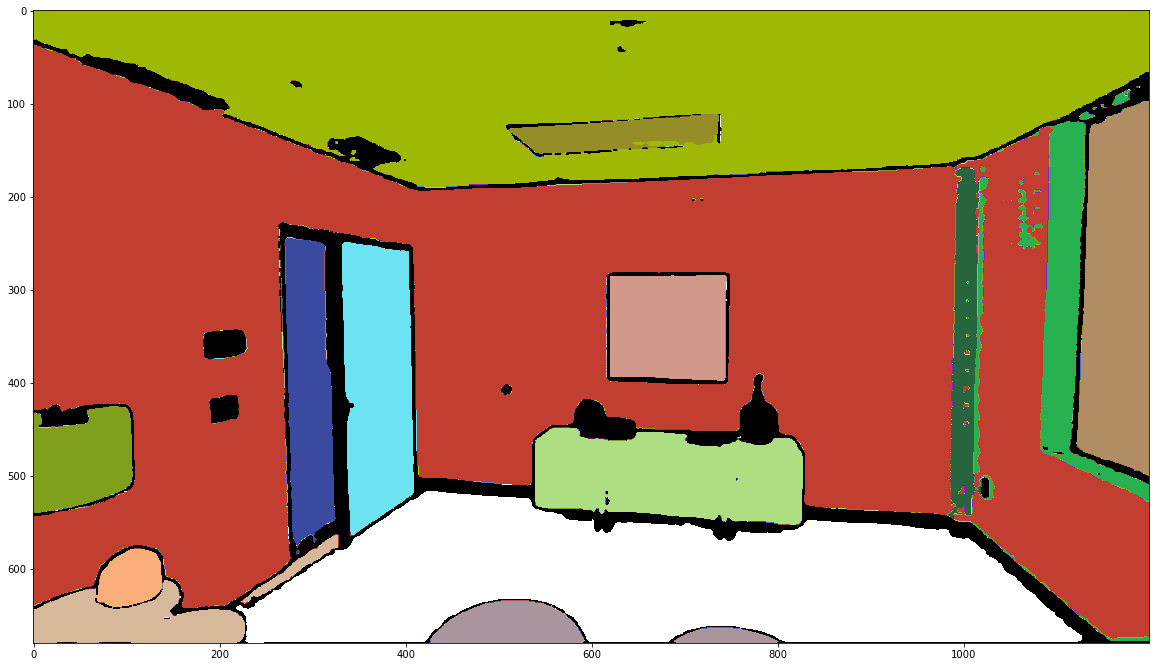

ith Frame 100


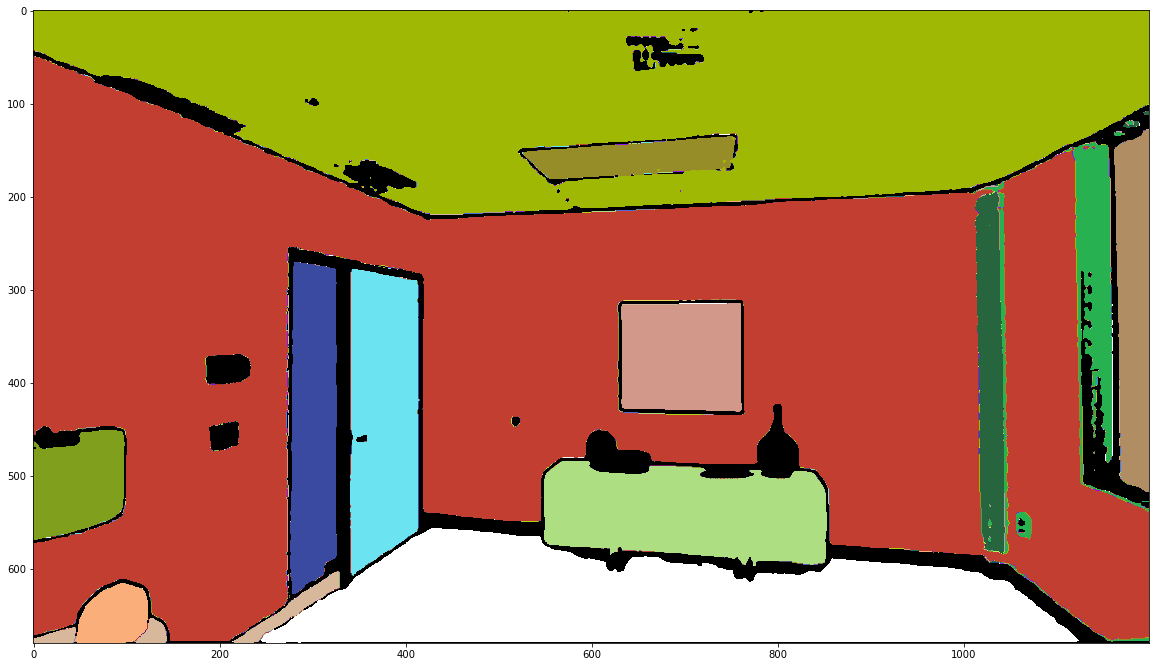

ith Frame 90


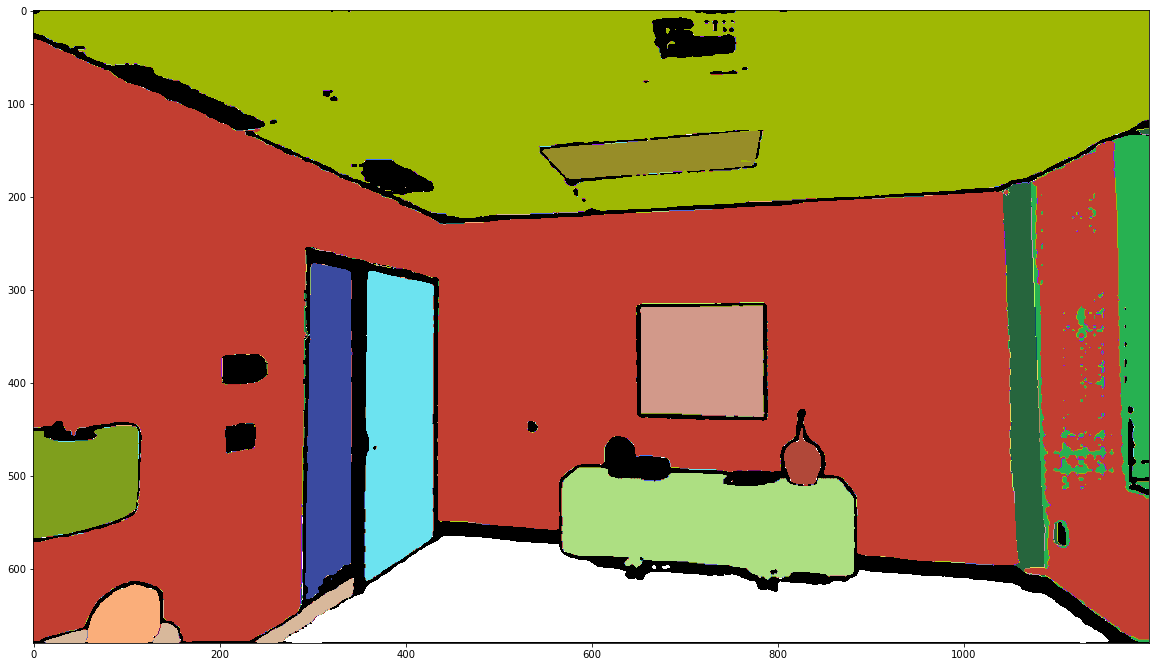

ith Frame 80


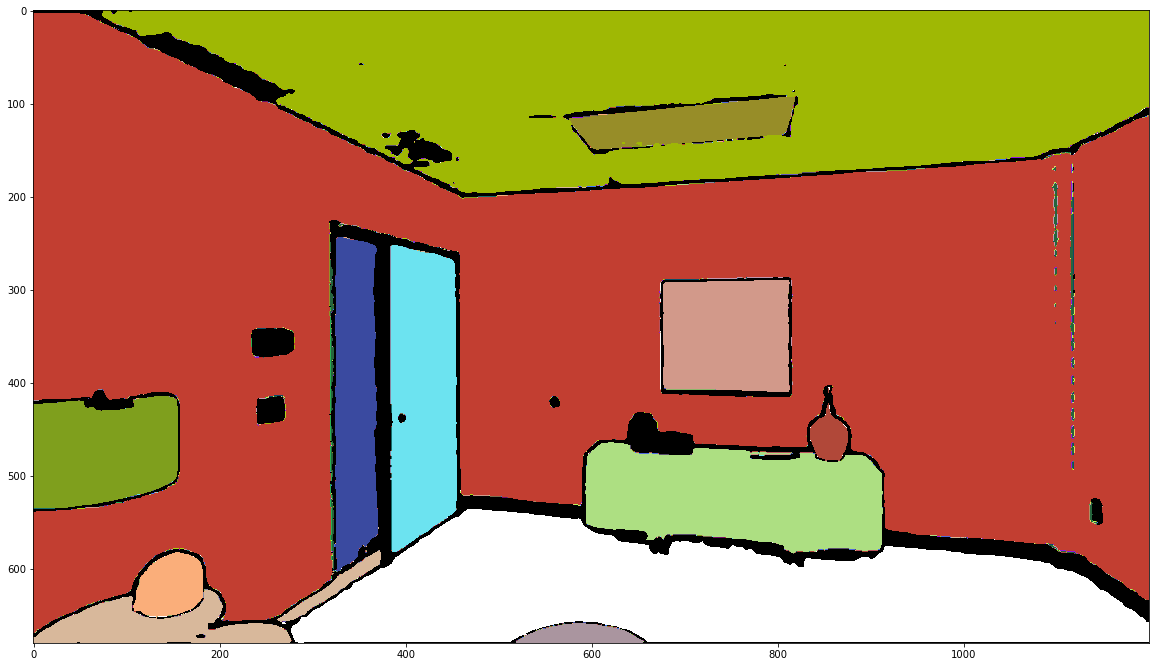

ith Frame 70


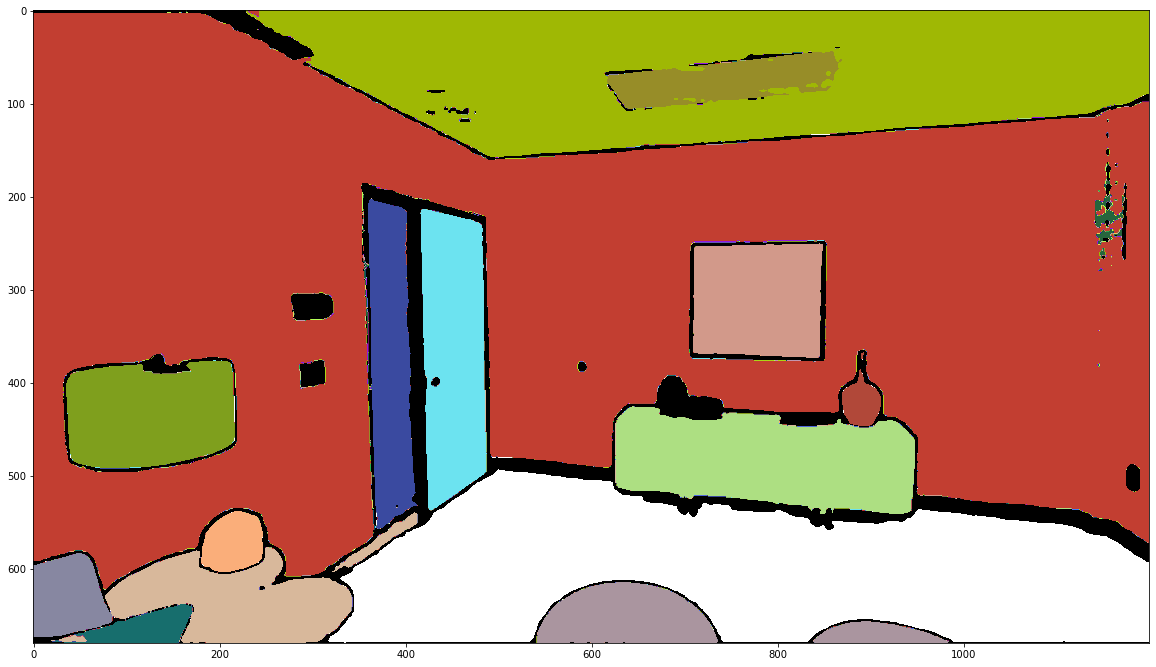

ith Frame 60


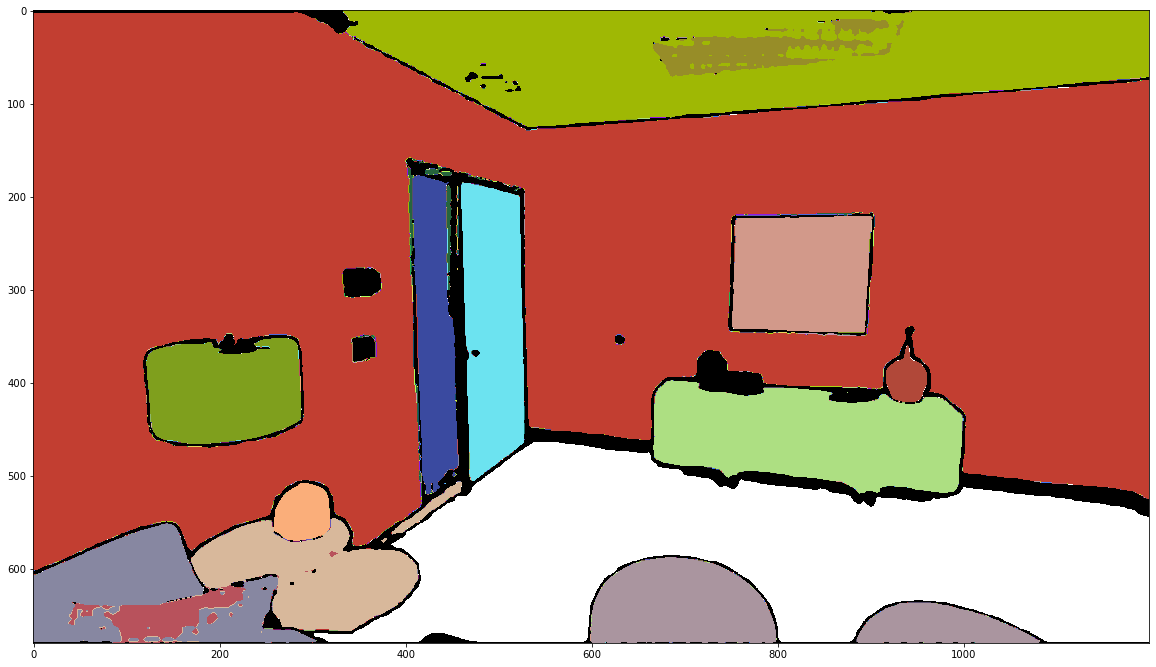

ith Frame 50


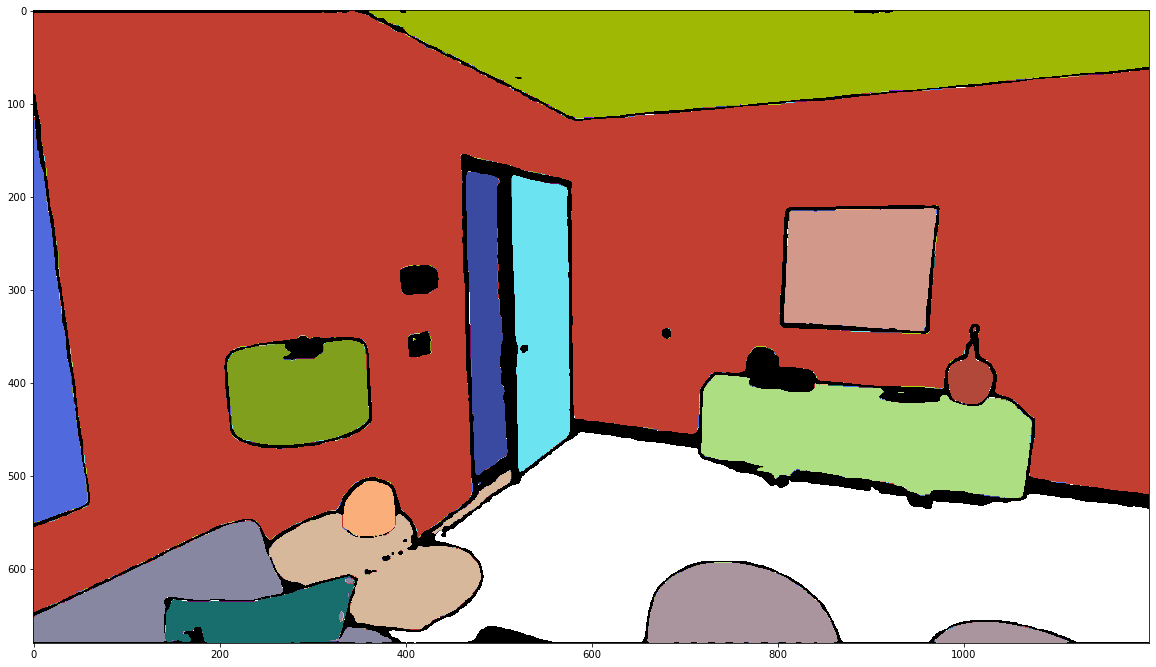

ith Frame 40


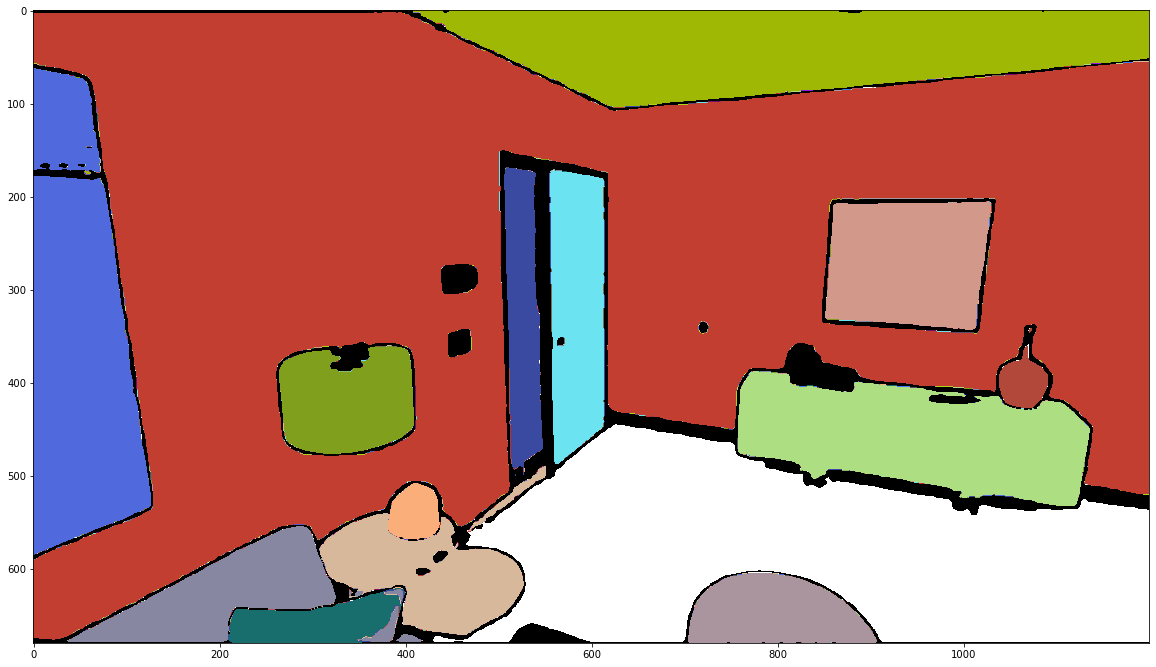

ith Frame 30


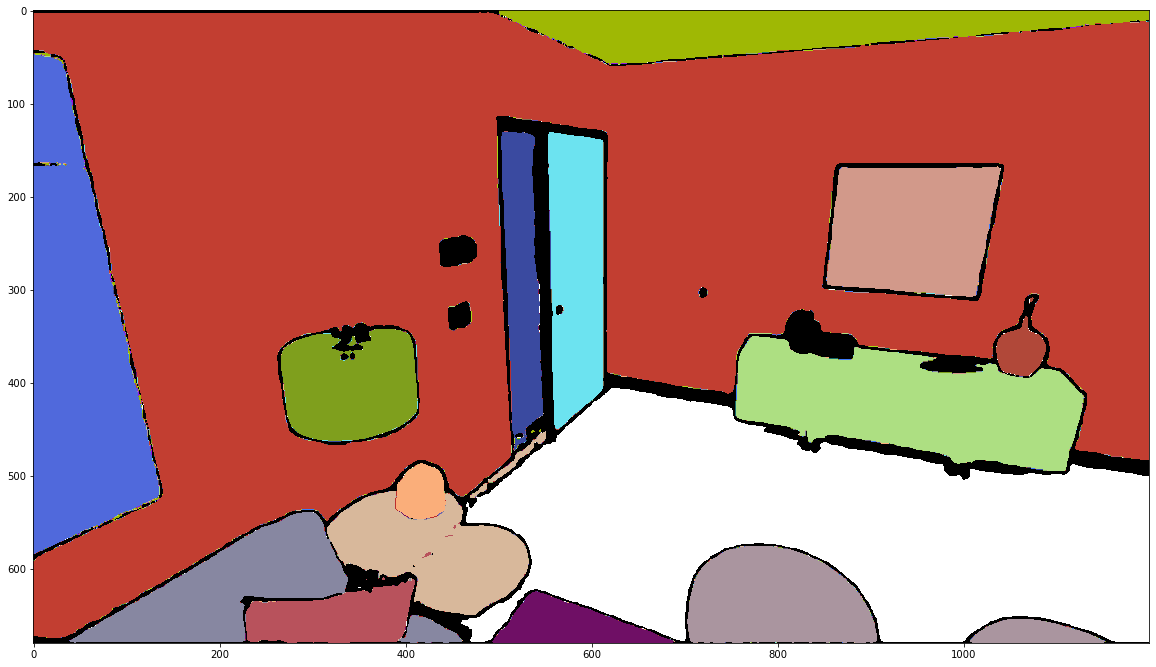

ith Frame 20


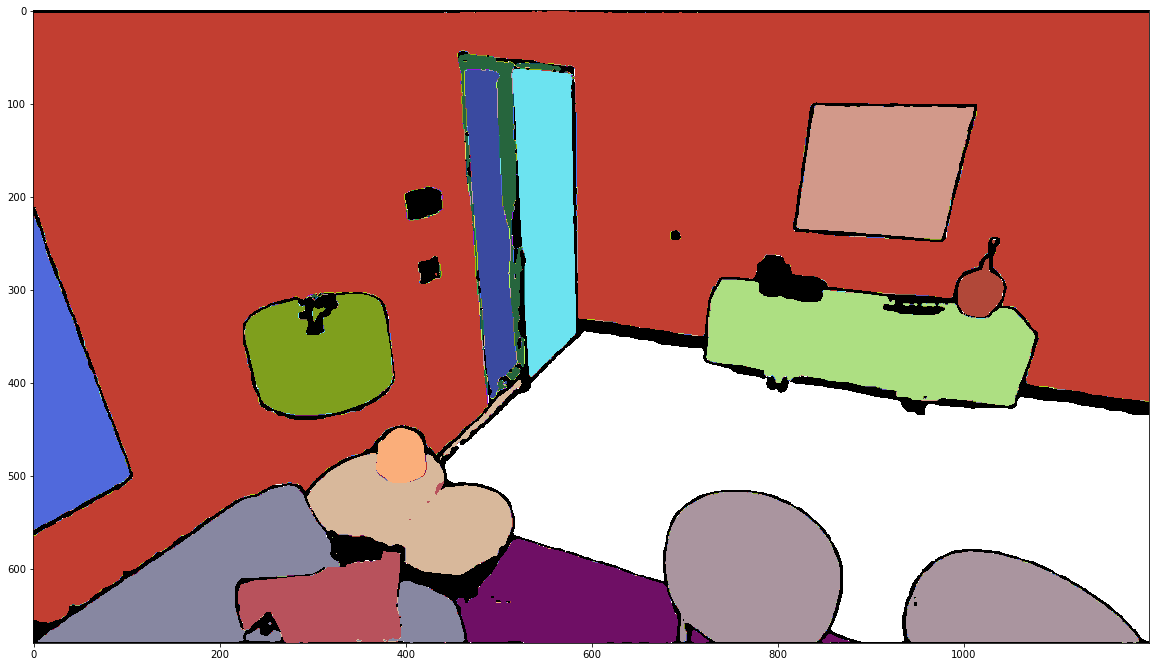

ith Frame 10


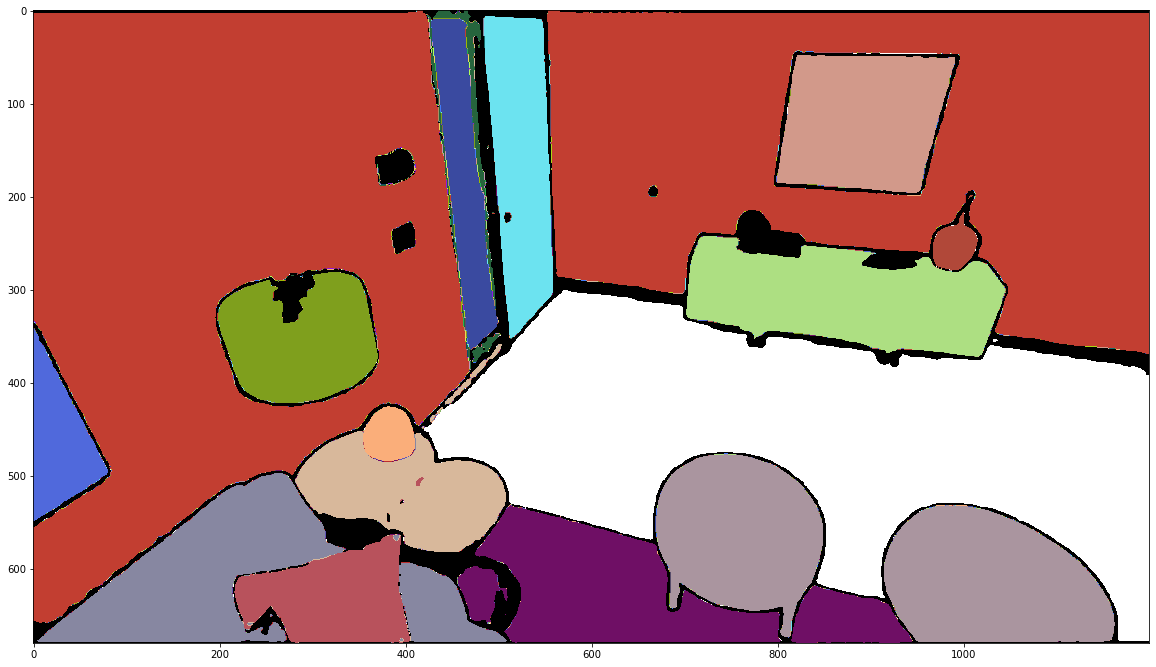

In [17]:

masks = mask_generator_2.generate(image)
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis("off")
plt.show()


visualizerForId = visualizerForIds()
depthf = readDepth(depth_paths[0])
ppi = 50
#segmentations.append(first)
id_counter = len(np.unique(first))
every_frame= 10
samples=None
ids_curr=generateIds(masks,min_area=1000)
visualizerForId.visualizer(ids_curr)

                             
for i in range(0, 1000, every_frame):
    print("ith Frame",i)
    
    if(i==0):#
        #segmentations.append(ids_curr)
        unique_ids = np.unique(ids_curr).astype(int)
        samplesFromCurrent = sample_from_instances_with_ids(
            ids_curr, len(unique_ids), points_per_instance=10
        )
        
        realWorldSamples = backproject.realWorldProject(
            samplesFromCurrent[:2,:],T_wc[0], K, depthf=depthf
        )
        realWorldSamples = np.concatenate((realWorldSamples,samplesFromCurrent[2:,:]),axis=0)

        #if samples is None:
        samples=realWorldSamples
    else:
        imagNext=cv2.imread(frame_paths[i])
        
        imageNext = cv2.cvtColor(imagNext, cv2.COLOR_BGR2RGB)

        masksCreated,samples = id_generation.createReverseMappingCombined(i, T_wc, K, depth_paths, predictor=predictor, points_per_instance = ppi, current_frame=imageNext,samples=samples,smallesMaskSize=smallesMaskSize,kernel_size=kernel_size,num_of_clusters=4)
        #print("MASKSSHAPE",masksCreated.shape)
        #visualizerForId.visualizer(masksCreated)
    torch.cuda.empty_cache()
                      
for i in range(1000, -1, -every_frame):
    print("ith Frame",i)
    
    
    imagNext=cv2.imread(frame_paths[i])
    
    imageNext = cv2.cvtColor(imagNext, cv2.COLOR_BGR2RGB)

    masksCreated,samples = id_generation.createReverseReverseMappingCombined(i, T_wc, K, depth_paths, predictor=predictor, points_per_instance = ppi, current_frame=imageNext,samples=samples,smallesMaskSize=smallesMaskSize,kernel_size=kernel_size,num_of_clusters=4)
    #print("MASKSSHAPE",masksCreated.shape)
    visualizerForId.visualizer(masksCreated,framenumber=str(i))
    torch.cuda.empty_cache()
#ppi=100



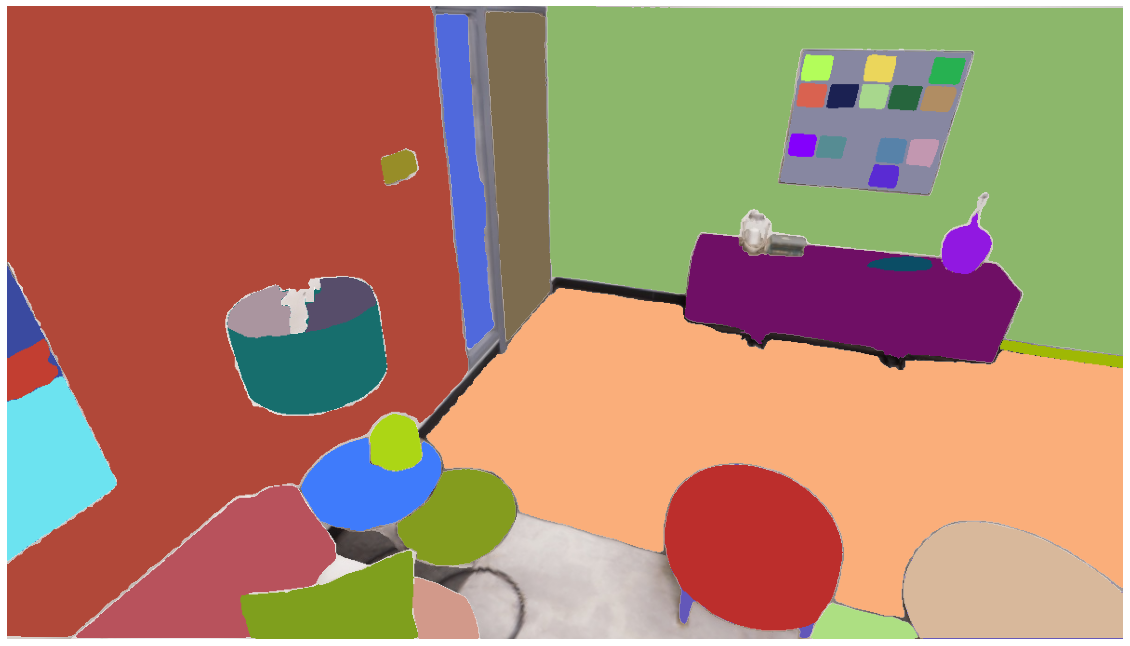

In [18]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis("off")
plt.show()

In [19]:

#ä weighing
'''for i in range(0, 50, every_frame):
    print(f'At iteration {i}')
    print(int(i/every_frame))
    print(seg_paths[int(i/every_frame)])
    if(i==0):
        ids_curr = np.load(seg_paths[int(i/every_frame)])
        segmentations.append(ids_curr)
        frame_numbers.append(i)
        continue
    ids_curr = np.load(seg_paths[int(i/every_frame)])
    map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = ppi)
    ids = id_generation.update_current_frame(ids_curr, map)
    segmentations.append(ids)
    #save output
    frame_numbers.append(i)
    print(f'Frame numbers: {frame_numbers}')
    '''
    


"for i in range(0, 50, every_frame):\n    print(f'At iteration {i}')\n    print(int(i/every_frame))\n    print(seg_paths[int(i/every_frame)])\n    if(i==0):\n        ids_curr = np.load(seg_paths[int(i/every_frame)])\n        segmentations.append(ids_curr)\n        frame_numbers.append(i)\n        continue\n    ids_curr = np.load(seg_paths[int(i/every_frame)])\n    map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = ppi)\n    ids = id_generation.update_current_frame(ids_curr, map)\n    segmentations.append(ids)\n    #save output\n    frame_numbers.append(i)\n    print(f'Frame numbers: {frame_numbers}')\n    "

In [20]:
'''for segment in segmentations:
    plt.imshow(segment,cmap='plasma',interpolation='nearest')
    plt.show()'''

"for segment in segmentations:\n    plt.imshow(segment,cmap='plasma',interpolation='nearest')\n    plt.show()"

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from vis import visualizerForIds

visualizerForId = visualizerForIds()
'''visualizerForId.visualizer(first)
visualizerForId.visualizer(ids_curr)
visualizerForId.visualizer(ids_curr)'''
cc=0
for segment in segmentations:
    visualizerForId.visualizer(segment)
    print(cc)
    cc+=5
'''visualizerForId.visualizer(ids)'''
print(np.max(segmentations[-1]))

segmentations.append(ids)
#save output
frame_numbers.append(i)

i = 10

ids_curr = np.load(seg_paths[int(i/every_frame)])
np.unique(ids_curr)

map, id_counter = id_generation.create_complete_mapping_of_current_frame(ids_curr, i, frame_numbers, T_wc, K, depth_paths, segmentations, id_counter, points_per_instance = 1000)

ids = id_generation.update_current_frame(ids_curr, map)

for segment in segmentations:
    plt.imshow(segment,cmap='plasma',interpolation='nearest')
    plt.show()

plt.imshow(ids,cmap='plasma',interpolation='nearest')
plt.show()
plt.imshow(ids_curr,cmap='plasma',interpolation='nearest')

segmentations[0][400,300],segmentations[1][420,300]